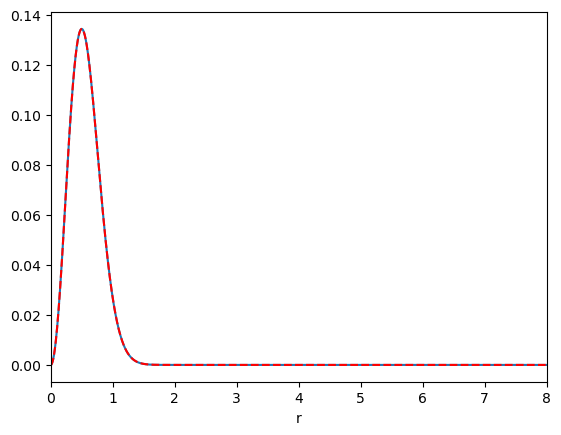

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 30                                                   # Truncation ordem

L0 = 1                                              # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1/2

A0 = 0.05   # 0.73 -> disperses ; 0.73 -> colapse

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()




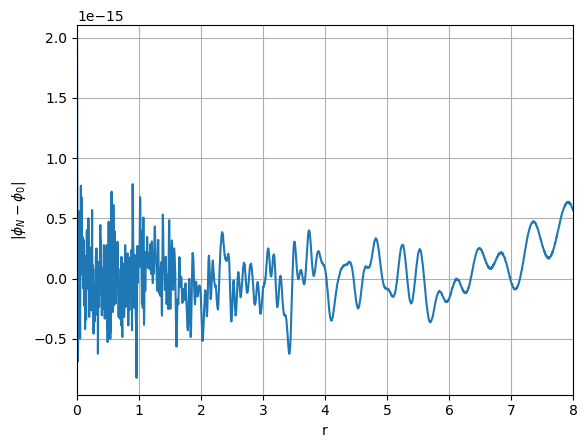

In [5]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid()
plt.show()

In [8]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0, inv_psi)

# Initial values of Krr and K: 

# Base functions:

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

inv_SB1 = np.linalg.inv(SB1)

K0 = A0/20*r **2*(np.exp(-(r)**2/sigma**2) + np.exp(-(r)**2/sigma**2)) 

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi - np.exp(4*Chi)*K**2/4 + 1/2*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2)
  J1 = rChi*rpsi
  JH = 8*J1 + 4*rrpsi + 8/r*rpsi + 4*psi*np.exp(4*Chi)*K/4 - 2*psi*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2) + 1/2*np.exp(4*Chi)*(4*psi*np.exp(-4*Chi)*rPhi**2) 
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


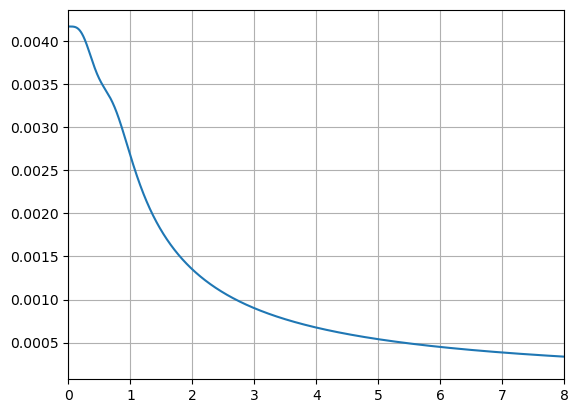

In [10]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.grid()
plt.show()

Field equations

In [11]:
# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [609]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [ ]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 6

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [610]:
# Runge Kutta 4th order

h = 0.00002   # step size
tf = 10

It = int(tf/h)

t = 0

epsilon0 = 0.5
eta0 = 0.3

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0
 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
    
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)   

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)  
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2  
  L2HC.append(L2)    # L2 error of HC  
  
  # Alpha origin
  Alpha_0 = np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
    
  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)    
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
    
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)

  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)  
  rrAlpha = np.dot(al0 + M1/2, rrpsi)     
    
  K = np.dot(fk0 + P1/2, SB1)
  rK = np.dot(fk0 + P1/2, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 

  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)

  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)  
  rrAlpha = np.dot(al0 + M2/2, rrpsi)     
    
  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 

  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)

  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)  
  rrAlpha = np.dot(al0 + M3, rrpsi)     
    
  K = np.dot(fk0 + P3, SB1)
  rK = np.dot(fk0 + P3, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)  
  
  t = t + h
    
#  if t > 9:
#    h=0.0001

  print(f't = {t}')
    
  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
#  print(f'a0_max = {max(a0)}, b0_max = {max(b0)}')
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 




t = 0.0002, L2HC_max = 4.872342155126204e-12
t = 0.0004, L2HC_max = 4.872342155126204e-12
t = 0.0006000000000000001, L2HC_max = 4.872342155126204e-12
t = 0.0008, L2HC_max = 4.872342155126204e-12
t = 0.001, L2HC_max = 4.872342155126204e-12
t = 0.0012000000000000001, L2HC_max = 4.872342155126204e-12
t = 0.0014000000000000002, L2HC_max = 4.872342155126204e-12
t = 0.0016000000000000003, L2HC_max = 4.872342155126204e-12
t = 0.0018000000000000004, L2HC_max = 4.872342155126204e-12
t = 0.0020000000000000005, L2HC_max = 4.872342155126204e-12
t = 0.0022000000000000006, L2HC_max = 4.872342155126204e-12
t = 0.0024000000000000007, L2HC_max = 4.872342155126204e-12
t = 0.0026000000000000007, L2HC_max = 4.872342155126204e-12
t = 0.002800000000000001, L2HC_max = 4.872342155126204e-12
t = 0.003000000000000001, L2HC_max = 4.872342155126204e-12
t = 0.003200000000000001, L2HC_max = 4.872342155126204e-12
t = 0.003400000000000001, L2HC_max = 4.872342155126204e-12
t = 0.003600000000000001, L2HC_max = 4.872342

t = 0.028999999999999936, L2HC_max = 4.872342155126204e-12
t = 0.029199999999999934, L2HC_max = 4.872342155126204e-12
t = 0.029399999999999933, L2HC_max = 4.872342155126204e-12
t = 0.029599999999999932, L2HC_max = 4.872342155126204e-12
t = 0.02979999999999993, L2HC_max = 4.872342155126204e-12
t = 0.02999999999999993, L2HC_max = 4.872342155126204e-12
t = 0.03019999999999993, L2HC_max = 4.872342155126204e-12
t = 0.030399999999999927, L2HC_max = 4.872342155126204e-12
t = 0.030599999999999926, L2HC_max = 4.872342155126204e-12
t = 0.030799999999999925, L2HC_max = 4.872342155126204e-12
t = 0.030999999999999923, L2HC_max = 4.872342155126204e-12
t = 0.031199999999999922, L2HC_max = 4.872342155126204e-12
t = 0.03139999999999992, L2HC_max = 4.872342155126204e-12
t = 0.03159999999999992, L2HC_max = 4.872342155126204e-12
t = 0.03179999999999992, L2HC_max = 4.872342155126204e-12
t = 0.03199999999999992, L2HC_max = 4.872342155126204e-12
t = 0.032199999999999916, L2HC_max = 4.872342155126204e-12
t = 

t = 0.057399999999999764, L2HC_max = 4.872342155126204e-12
t = 0.05759999999999976, L2HC_max = 4.872342155126204e-12
t = 0.05779999999999976, L2HC_max = 4.872342155126204e-12
t = 0.05799999999999976, L2HC_max = 4.872342155126204e-12
t = 0.05819999999999976, L2HC_max = 4.872342155126204e-12
t = 0.05839999999999976, L2HC_max = 4.872342155126204e-12
t = 0.058599999999999756, L2HC_max = 4.872342155126204e-12
t = 0.058799999999999755, L2HC_max = 4.872342155126204e-12
t = 0.058999999999999754, L2HC_max = 4.872342155126204e-12
t = 0.05919999999999975, L2HC_max = 4.872342155126204e-12
t = 0.05939999999999975, L2HC_max = 4.872342155126204e-12
t = 0.05959999999999975, L2HC_max = 4.872342155126204e-12
t = 0.05979999999999975, L2HC_max = 4.872342155126204e-12
t = 0.05999999999999975, L2HC_max = 4.872342155126204e-12
t = 0.06019999999999975, L2HC_max = 4.872342155126204e-12
t = 0.060399999999999746, L2HC_max = 4.872342155126204e-12
t = 0.060599999999999744, L2HC_max = 4.872342155126204e-12
t = 0.06

t = 0.08620000000000042, L2HC_max = 4.872342155126204e-12
t = 0.08640000000000042, L2HC_max = 4.872342155126204e-12
t = 0.08660000000000043, L2HC_max = 4.872342155126204e-12
t = 0.08680000000000043, L2HC_max = 4.872342155126204e-12
t = 0.08700000000000044, L2HC_max = 4.872342155126204e-12
t = 0.08720000000000044, L2HC_max = 4.872342155126204e-12
t = 0.08740000000000045, L2HC_max = 4.872342155126204e-12
t = 0.08760000000000046, L2HC_max = 4.872342155126204e-12
t = 0.08780000000000046, L2HC_max = 4.872342155126204e-12
t = 0.08800000000000047, L2HC_max = 4.872342155126204e-12
t = 0.08820000000000047, L2HC_max = 4.872342155126204e-12
t = 0.08840000000000048, L2HC_max = 4.872342155126204e-12
t = 0.08860000000000048, L2HC_max = 4.872342155126204e-12
t = 0.08880000000000049, L2HC_max = 4.872342155126204e-12
t = 0.0890000000000005, L2HC_max = 4.872342155126204e-12
t = 0.0892000000000005, L2HC_max = 4.872342155126204e-12
t = 0.0894000000000005, L2HC_max = 4.872342155126204e-12
t = 0.08960000000

t = 0.11460000000000123, L2HC_max = 4.872342155126204e-12
t = 0.11480000000000123, L2HC_max = 4.872342155126204e-12
t = 0.11500000000000124, L2HC_max = 4.872342155126204e-12
t = 0.11520000000000125, L2HC_max = 4.872342155126204e-12
t = 0.11540000000000125, L2HC_max = 4.872342155126204e-12
t = 0.11560000000000126, L2HC_max = 4.872342155126204e-12
t = 0.11580000000000126, L2HC_max = 4.872342155126204e-12
t = 0.11600000000000127, L2HC_max = 4.872342155126204e-12
t = 0.11620000000000127, L2HC_max = 4.872342155126204e-12
t = 0.11640000000000128, L2HC_max = 4.872342155126204e-12
t = 0.11660000000000129, L2HC_max = 4.872342155126204e-12
t = 0.11680000000000129, L2HC_max = 4.872342155126204e-12
t = 0.1170000000000013, L2HC_max = 4.872342155126204e-12
t = 0.1172000000000013, L2HC_max = 4.872342155126204e-12
t = 0.11740000000000131, L2HC_max = 4.872342155126204e-12
t = 0.11760000000000131, L2HC_max = 4.872342155126204e-12
t = 0.11780000000000132, L2HC_max = 4.872342155126204e-12
t = 0.1180000000

t = 0.14320000000000205, L2HC_max = 4.872342155126204e-12
t = 0.14340000000000205, L2HC_max = 4.872342155126204e-12
t = 0.14360000000000206, L2HC_max = 4.872342155126204e-12
t = 0.14380000000000207, L2HC_max = 4.872342155126204e-12
t = 0.14400000000000207, L2HC_max = 4.872342155126204e-12
t = 0.14420000000000208, L2HC_max = 4.872342155126204e-12
t = 0.14440000000000208, L2HC_max = 4.872342155126204e-12
t = 0.1446000000000021, L2HC_max = 4.872342155126204e-12
t = 0.1448000000000021, L2HC_max = 4.872342155126204e-12
t = 0.1450000000000021, L2HC_max = 4.872342155126204e-12
t = 0.1452000000000021, L2HC_max = 4.872342155126204e-12
t = 0.1454000000000021, L2HC_max = 4.872342155126204e-12
t = 0.14560000000000212, L2HC_max = 4.872342155126204e-12
t = 0.14580000000000212, L2HC_max = 4.872342155126204e-12
t = 0.14600000000000213, L2HC_max = 4.872342155126204e-12
t = 0.14620000000000213, L2HC_max = 4.872342155126204e-12
t = 0.14640000000000214, L2HC_max = 4.872342155126204e-12
t = 0.1466000000000

t = 0.17220000000000288, L2HC_max = 4.872342155126204e-12
t = 0.17240000000000288, L2HC_max = 4.872342155126204e-12
t = 0.1726000000000029, L2HC_max = 4.872342155126204e-12
t = 0.1728000000000029, L2HC_max = 4.872342155126204e-12
t = 0.1730000000000029, L2HC_max = 4.872342155126204e-12
t = 0.1732000000000029, L2HC_max = 4.872342155126204e-12
t = 0.1734000000000029, L2HC_max = 4.872342155126204e-12
t = 0.17360000000000292, L2HC_max = 4.872342155126204e-12
t = 0.17380000000000292, L2HC_max = 4.872342155126204e-12
t = 0.17400000000000293, L2HC_max = 4.872342155126204e-12
t = 0.17420000000000294, L2HC_max = 4.872342155126204e-12
t = 0.17440000000000294, L2HC_max = 4.872342155126204e-12
t = 0.17460000000000295, L2HC_max = 4.872342155126204e-12
t = 0.17480000000000295, L2HC_max = 4.872342155126204e-12
t = 0.17500000000000296, L2HC_max = 4.872342155126204e-12
t = 0.17520000000000296, L2HC_max = 4.872342155126204e-12
t = 0.17540000000000297, L2HC_max = 4.872342155126204e-12
t = 0.1756000000000

t = 0.20160000000000372, L2HC_max = 4.872342155126204e-12
t = 0.20180000000000373, L2HC_max = 4.872342155126204e-12
t = 0.20200000000000373, L2HC_max = 4.872342155126204e-12
t = 0.20220000000000374, L2HC_max = 4.872342155126204e-12
t = 0.20240000000000374, L2HC_max = 4.872342155126204e-12
t = 0.20260000000000375, L2HC_max = 4.872342155126204e-12
t = 0.20280000000000376, L2HC_max = 4.872342155126204e-12
t = 0.20300000000000376, L2HC_max = 4.872342155126204e-12
t = 0.20320000000000377, L2HC_max = 4.872342155126204e-12
t = 0.20340000000000377, L2HC_max = 4.872342155126204e-12
t = 0.20360000000000378, L2HC_max = 4.872342155126204e-12
t = 0.20380000000000378, L2HC_max = 4.872342155126204e-12
t = 0.2040000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2042000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2044000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2046000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2048000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2050000000000

t = 0.23040000000000455, L2HC_max = 4.872342155126204e-12
t = 0.23060000000000455, L2HC_max = 4.872342155126204e-12
t = 0.23080000000000456, L2HC_max = 4.872342155126204e-12
t = 0.23100000000000456, L2HC_max = 4.872342155126204e-12
t = 0.23120000000000457, L2HC_max = 4.872342155126204e-12
t = 0.23140000000000457, L2HC_max = 4.872342155126204e-12
t = 0.23160000000000458, L2HC_max = 4.872342155126204e-12
t = 0.23180000000000459, L2HC_max = 4.872342155126204e-12
t = 0.2320000000000046, L2HC_max = 4.872342155126204e-12
t = 0.2322000000000046, L2HC_max = 4.872342155126204e-12
t = 0.2324000000000046, L2HC_max = 4.872342155126204e-12
t = 0.2326000000000046, L2HC_max = 4.872342155126204e-12
t = 0.23280000000000461, L2HC_max = 4.872342155126204e-12
t = 0.23300000000000462, L2HC_max = 4.872342155126204e-12
t = 0.23320000000000463, L2HC_max = 4.872342155126204e-12
t = 0.23340000000000463, L2HC_max = 4.872342155126204e-12
t = 0.23360000000000464, L2HC_max = 4.872342155126204e-12
t = 0.233800000000

t = 0.259800000000004, L2HC_max = 4.872342155126204e-12
t = 0.260000000000004, L2HC_max = 4.872342155126204e-12
t = 0.260200000000004, L2HC_max = 4.872342155126204e-12
t = 0.26040000000000396, L2HC_max = 4.872342155126204e-12
t = 0.26060000000000394, L2HC_max = 4.872342155126204e-12
t = 0.2608000000000039, L2HC_max = 4.872342155126204e-12
t = 0.2610000000000039, L2HC_max = 4.872342155126204e-12
t = 0.2612000000000039, L2HC_max = 4.872342155126204e-12
t = 0.26140000000000385, L2HC_max = 4.872342155126204e-12
t = 0.26160000000000383, L2HC_max = 4.872342155126204e-12
t = 0.2618000000000038, L2HC_max = 4.872342155126204e-12
t = 0.2620000000000038, L2HC_max = 4.872342155126204e-12
t = 0.26220000000000376, L2HC_max = 4.872342155126204e-12
t = 0.26240000000000374, L2HC_max = 4.872342155126204e-12
t = 0.2626000000000037, L2HC_max = 4.872342155126204e-12
t = 0.2628000000000037, L2HC_max = 4.872342155126204e-12
t = 0.2630000000000037, L2HC_max = 4.872342155126204e-12
t = 0.26320000000000365, L2H

t = 0.2884000000000009, L2HC_max = 4.872342155126204e-12
t = 0.28860000000000086, L2HC_max = 4.872342155126204e-12
t = 0.28880000000000083, L2HC_max = 4.872342155126204e-12
t = 0.2890000000000008, L2HC_max = 4.872342155126204e-12
t = 0.2892000000000008, L2HC_max = 4.872342155126204e-12
t = 0.28940000000000077, L2HC_max = 4.872342155126204e-12
t = 0.28960000000000075, L2HC_max = 4.872342155126204e-12
t = 0.2898000000000007, L2HC_max = 4.872342155126204e-12
t = 0.2900000000000007, L2HC_max = 4.872342155126204e-12
t = 0.2902000000000007, L2HC_max = 4.872342155126204e-12
t = 0.29040000000000066, L2HC_max = 4.872342155126204e-12
t = 0.29060000000000064, L2HC_max = 4.872342155126204e-12
t = 0.2908000000000006, L2HC_max = 4.872342155126204e-12
t = 0.2910000000000006, L2HC_max = 4.872342155126204e-12
t = 0.29120000000000057, L2HC_max = 4.872342155126204e-12
t = 0.29140000000000055, L2HC_max = 4.872342155126204e-12
t = 0.2916000000000005, L2HC_max = 4.872342155126204e-12
t = 0.2918000000000005,

t = 0.3173999999999977, L2HC_max = 4.872342155126204e-12
t = 0.31759999999999766, L2HC_max = 4.872342155126204e-12
t = 0.31779999999999764, L2HC_max = 4.872342155126204e-12
t = 0.3179999999999976, L2HC_max = 4.872342155126204e-12
t = 0.3181999999999976, L2HC_max = 4.872342155126204e-12
t = 0.3183999999999976, L2HC_max = 4.872342155126204e-12
t = 0.31859999999999755, L2HC_max = 4.872342155126204e-12
t = 0.31879999999999753, L2HC_max = 4.872342155126204e-12
t = 0.3189999999999975, L2HC_max = 4.872342155126204e-12
t = 0.3191999999999975, L2HC_max = 4.872342155126204e-12
t = 0.31939999999999746, L2HC_max = 4.872342155126204e-12
t = 0.31959999999999744, L2HC_max = 4.872342155126204e-12
t = 0.3197999999999974, L2HC_max = 4.872342155126204e-12
t = 0.3199999999999974, L2HC_max = 4.872342155126204e-12
t = 0.3201999999999974, L2HC_max = 4.872342155126204e-12
t = 0.32039999999999735, L2HC_max = 4.872342155126204e-12
t = 0.32059999999999733, L2HC_max = 4.872342155126204e-12
t = 0.3207999999999973,

t = 0.34599999999999453, L2HC_max = 4.872342155126204e-12
t = 0.3461999999999945, L2HC_max = 4.872342155126204e-12
t = 0.3463999999999945, L2HC_max = 4.872342155126204e-12
t = 0.34659999999999447, L2HC_max = 4.872342155126204e-12
t = 0.34679999999999445, L2HC_max = 4.872342155126204e-12
t = 0.3469999999999944, L2HC_max = 4.872342155126204e-12
t = 0.3471999999999944, L2HC_max = 4.872342155126204e-12
t = 0.3473999999999944, L2HC_max = 4.872342155126204e-12
t = 0.34759999999999436, L2HC_max = 4.872342155126204e-12
t = 0.34779999999999434, L2HC_max = 4.872342155126204e-12
t = 0.3479999999999943, L2HC_max = 4.872342155126204e-12
t = 0.3481999999999943, L2HC_max = 4.872342155126204e-12
t = 0.34839999999999427, L2HC_max = 4.872342155126204e-12
t = 0.34859999999999425, L2HC_max = 4.872342155126204e-12
t = 0.3487999999999942, L2HC_max = 4.872342155126204e-12
t = 0.3489999999999942, L2HC_max = 4.872342155126204e-12
t = 0.3491999999999942, L2HC_max = 4.872342155126204e-12
t = 0.34939999999999416,

t = 0.3751999999999913, L2HC_max = 4.872342155126204e-12
t = 0.3753999999999913, L2HC_max = 4.872342155126204e-12
t = 0.3755999999999913, L2HC_max = 4.872342155126204e-12
t = 0.37579999999999125, L2HC_max = 4.872342155126204e-12
t = 0.37599999999999123, L2HC_max = 4.872342155126204e-12
t = 0.3761999999999912, L2HC_max = 4.872342155126204e-12
t = 0.3763999999999912, L2HC_max = 4.872342155126204e-12
t = 0.37659999999999116, L2HC_max = 4.872342155126204e-12
t = 0.37679999999999114, L2HC_max = 4.872342155126204e-12
t = 0.3769999999999911, L2HC_max = 4.872342155126204e-12
t = 0.3771999999999911, L2HC_max = 4.872342155126204e-12
t = 0.3773999999999911, L2HC_max = 4.872342155126204e-12
t = 0.37759999999999105, L2HC_max = 4.872342155126204e-12
t = 0.37779999999999103, L2HC_max = 4.872342155126204e-12
t = 0.377999999999991, L2HC_max = 4.872342155126204e-12
t = 0.378199999999991, L2HC_max = 4.872342155126204e-12
t = 0.37839999999999097, L2HC_max = 4.872342155126204e-12
t = 0.37859999999999094, L

t = 0.40399999999998815, L2HC_max = 4.872342155126204e-12
t = 0.4041999999999881, L2HC_max = 4.872342155126204e-12
t = 0.4043999999999881, L2HC_max = 4.872342155126204e-12
t = 0.4045999999999881, L2HC_max = 4.872342155126204e-12
t = 0.40479999999998806, L2HC_max = 4.872342155126204e-12
t = 0.40499999999998804, L2HC_max = 4.872342155126204e-12
t = 0.405199999999988, L2HC_max = 4.872342155126204e-12
t = 0.405399999999988, L2HC_max = 4.872342155126204e-12
t = 0.40559999999998797, L2HC_max = 4.872342155126204e-12
t = 0.40579999999998795, L2HC_max = 4.872342155126204e-12
t = 0.4059999999999879, L2HC_max = 4.872342155126204e-12
t = 0.4061999999999879, L2HC_max = 4.872342155126204e-12
t = 0.4063999999999879, L2HC_max = 4.872342155126204e-12
t = 0.40659999999998786, L2HC_max = 4.872342155126204e-12
t = 0.40679999999998784, L2HC_max = 4.872342155126204e-12
t = 0.4069999999999878, L2HC_max = 4.872342155126204e-12
t = 0.4071999999999878, L2HC_max = 4.872342155126204e-12
t = 0.40739999999998777, L

t = 0.432799999999985, L2HC_max = 4.872342155126204e-12
t = 0.43299999999998495, L2HC_max = 4.872342155126204e-12
t = 0.43319999999998493, L2HC_max = 4.872342155126204e-12
t = 0.4333999999999849, L2HC_max = 4.872342155126204e-12
t = 0.4335999999999849, L2HC_max = 4.872342155126204e-12
t = 0.43379999999998486, L2HC_max = 4.872342155126204e-12
t = 0.43399999999998484, L2HC_max = 4.872342155126204e-12
t = 0.4341999999999848, L2HC_max = 4.872342155126204e-12
t = 0.4343999999999848, L2HC_max = 4.872342155126204e-12
t = 0.4345999999999848, L2HC_max = 4.872342155126204e-12
t = 0.43479999999998475, L2HC_max = 4.872342155126204e-12
t = 0.43499999999998473, L2HC_max = 4.872342155126204e-12
t = 0.4351999999999847, L2HC_max = 4.872342155126204e-12
t = 0.4353999999999847, L2HC_max = 4.872342155126204e-12
t = 0.43559999999998467, L2HC_max = 4.872342155126204e-12
t = 0.43579999999998464, L2HC_max = 4.872342155126204e-12
t = 0.4359999999999846, L2HC_max = 4.872342155126204e-12
t = 0.4361999999999846, 

t = 0.4617999999999818, L2HC_max = 4.872342155126204e-12
t = 0.46199999999998176, L2HC_max = 4.872342155126204e-12
t = 0.46219999999998174, L2HC_max = 4.872342155126204e-12
t = 0.4623999999999817, L2HC_max = 4.872342155126204e-12
t = 0.4625999999999817, L2HC_max = 4.872342155126204e-12
t = 0.46279999999998167, L2HC_max = 4.872342155126204e-12
t = 0.46299999999998165, L2HC_max = 4.872342155126204e-12
t = 0.4631999999999816, L2HC_max = 4.872342155126204e-12
t = 0.4633999999999816, L2HC_max = 4.872342155126204e-12
t = 0.4635999999999816, L2HC_max = 4.872342155126204e-12
t = 0.46379999999998156, L2HC_max = 4.872342155126204e-12
t = 0.46399999999998154, L2HC_max = 4.872342155126204e-12
t = 0.4641999999999815, L2HC_max = 4.872342155126204e-12
t = 0.4643999999999815, L2HC_max = 4.872342155126204e-12
t = 0.46459999999998147, L2HC_max = 4.872342155126204e-12
t = 0.46479999999998145, L2HC_max = 4.872342155126204e-12
t = 0.46499999999998143, L2HC_max = 4.872342155126204e-12
t = 0.4651999999999814

t = 0.4907999999999786, L2HC_max = 4.872342155126204e-12
t = 0.49099999999997856, L2HC_max = 4.872342155126204e-12
t = 0.49119999999997854, L2HC_max = 4.872342155126204e-12
t = 0.4913999999999785, L2HC_max = 4.872342155126204e-12
t = 0.4915999999999785, L2HC_max = 4.872342155126204e-12
t = 0.4917999999999785, L2HC_max = 4.872342155126204e-12
t = 0.49199999999997845, L2HC_max = 4.872342155126204e-12
t = 0.49219999999997843, L2HC_max = 4.872342155126204e-12
t = 0.4923999999999784, L2HC_max = 4.872342155126204e-12
t = 0.4925999999999784, L2HC_max = 4.872342155126204e-12
t = 0.49279999999997837, L2HC_max = 4.872342155126204e-12
t = 0.49299999999997834, L2HC_max = 4.872342155126204e-12
t = 0.4931999999999783, L2HC_max = 4.872342155126204e-12
t = 0.4933999999999783, L2HC_max = 4.872342155126204e-12
t = 0.4935999999999783, L2HC_max = 4.872342155126204e-12
t = 0.49379999999997826, L2HC_max = 4.872342155126204e-12
t = 0.49399999999997823, L2HC_max = 4.872342155126204e-12
t = 0.4941999999999782,

t = 0.5199999999999754, L2HC_max = 4.872342155126204e-12
t = 0.5201999999999753, L2HC_max = 4.872342155126204e-12
t = 0.5203999999999753, L2HC_max = 4.872342155126204e-12
t = 0.5205999999999753, L2HC_max = 4.872342155126204e-12
t = 0.5207999999999753, L2HC_max = 4.872342155126204e-12
t = 0.5209999999999753, L2HC_max = 4.872342155126204e-12
t = 0.5211999999999752, L2HC_max = 4.872342155126204e-12
t = 0.5213999999999752, L2HC_max = 4.872342155126204e-12
t = 0.5215999999999752, L2HC_max = 4.872342155126204e-12
t = 0.5217999999999752, L2HC_max = 4.872342155126204e-12
t = 0.5219999999999752, L2HC_max = 4.872342155126204e-12
t = 0.5221999999999751, L2HC_max = 4.872342155126204e-12
t = 0.5223999999999751, L2HC_max = 4.872342155126204e-12
t = 0.5225999999999751, L2HC_max = 4.872342155126204e-12
t = 0.5227999999999751, L2HC_max = 4.872342155126204e-12
t = 0.522999999999975, L2HC_max = 4.872342155126204e-12
t = 0.523199999999975, L2HC_max = 4.872342155126204e-12
t = 0.523399999999975, L2HC_max =

t = 0.5493999999999721, L2HC_max = 4.872342155126204e-12
t = 0.5495999999999721, L2HC_max = 4.872342155126204e-12
t = 0.5497999999999721, L2HC_max = 4.872342155126204e-12
t = 0.5499999999999721, L2HC_max = 4.872342155126204e-12
t = 0.550199999999972, L2HC_max = 4.872342155126204e-12
t = 0.550399999999972, L2HC_max = 4.872342155126204e-12
t = 0.550599999999972, L2HC_max = 4.872342155126204e-12
t = 0.550799999999972, L2HC_max = 4.872342155126204e-12
t = 0.550999999999972, L2HC_max = 4.872342155126204e-12
t = 0.5511999999999719, L2HC_max = 4.872342155126204e-12
t = 0.5513999999999719, L2HC_max = 4.872342155126204e-12
t = 0.5515999999999719, L2HC_max = 4.872342155126204e-12
t = 0.5517999999999719, L2HC_max = 4.872342155126204e-12
t = 0.5519999999999718, L2HC_max = 4.872342155126204e-12
t = 0.5521999999999718, L2HC_max = 4.872342155126204e-12
t = 0.5523999999999718, L2HC_max = 4.872342155126204e-12
t = 0.5525999999999718, L2HC_max = 4.872342155126204e-12
t = 0.5527999999999718, L2HC_max = 4

t = 0.5793999999999688, L2HC_max = 4.872342155126204e-12
t = 0.5795999999999688, L2HC_max = 4.872342155126204e-12
t = 0.5797999999999688, L2HC_max = 4.872342155126204e-12
t = 0.5799999999999688, L2HC_max = 4.872342155126204e-12
t = 0.5801999999999687, L2HC_max = 4.872342155126204e-12
t = 0.5803999999999687, L2HC_max = 4.872342155126204e-12
t = 0.5805999999999687, L2HC_max = 4.872342155126204e-12
t = 0.5807999999999687, L2HC_max = 4.872342155126204e-12
t = 0.5809999999999687, L2HC_max = 4.872342155126204e-12
t = 0.5811999999999686, L2HC_max = 4.872342155126204e-12
t = 0.5813999999999686, L2HC_max = 4.872342155126204e-12
t = 0.5815999999999686, L2HC_max = 4.872342155126204e-12
t = 0.5817999999999686, L2HC_max = 4.872342155126204e-12
t = 0.5819999999999685, L2HC_max = 4.872342155126204e-12
t = 0.5821999999999685, L2HC_max = 4.872342155126204e-12
t = 0.5823999999999685, L2HC_max = 4.872342155126204e-12
t = 0.5825999999999685, L2HC_max = 4.872342155126204e-12
t = 0.5827999999999685, L2HC_ma

t = 0.6083999999999656, L2HC_max = 4.872342155126204e-12
t = 0.6085999999999656, L2HC_max = 4.872342155126204e-12
t = 0.6087999999999656, L2HC_max = 4.872342155126204e-12
t = 0.6089999999999656, L2HC_max = 4.872342155126204e-12
t = 0.6091999999999655, L2HC_max = 4.872342155126204e-12
t = 0.6093999999999655, L2HC_max = 4.872342155126204e-12
t = 0.6095999999999655, L2HC_max = 4.872342155126204e-12
t = 0.6097999999999655, L2HC_max = 4.872342155126204e-12
t = 0.6099999999999655, L2HC_max = 4.872342155126204e-12
t = 0.6101999999999654, L2HC_max = 4.872342155126204e-12
t = 0.6103999999999654, L2HC_max = 4.872342155126204e-12
t = 0.6105999999999654, L2HC_max = 4.872342155126204e-12
t = 0.6107999999999654, L2HC_max = 4.872342155126204e-12
t = 0.6109999999999653, L2HC_max = 4.872342155126204e-12
t = 0.6111999999999653, L2HC_max = 4.872342155126204e-12
t = 0.6113999999999653, L2HC_max = 4.872342155126204e-12
t = 0.6115999999999653, L2HC_max = 4.872342155126204e-12
t = 0.6117999999999653, L2HC_ma

t = 0.6373999999999624, L2HC_max = 4.872342155126204e-12
t = 0.6375999999999624, L2HC_max = 4.872342155126204e-12
t = 0.6377999999999624, L2HC_max = 4.872342155126204e-12
t = 0.6379999999999624, L2HC_max = 4.872342155126204e-12
t = 0.6381999999999624, L2HC_max = 4.872342155126204e-12
t = 0.6383999999999623, L2HC_max = 4.872342155126204e-12
t = 0.6385999999999623, L2HC_max = 4.872342155126204e-12
t = 0.6387999999999623, L2HC_max = 4.872342155126204e-12
t = 0.6389999999999623, L2HC_max = 4.872342155126204e-12
t = 0.6391999999999622, L2HC_max = 4.872342155126204e-12
t = 0.6393999999999622, L2HC_max = 4.872342155126204e-12
t = 0.6395999999999622, L2HC_max = 4.872342155126204e-12
t = 0.6397999999999622, L2HC_max = 4.872342155126204e-12
t = 0.6399999999999622, L2HC_max = 4.872342155126204e-12
t = 0.6401999999999621, L2HC_max = 4.872342155126204e-12
t = 0.6403999999999621, L2HC_max = 4.872342155126204e-12
t = 0.6405999999999621, L2HC_max = 4.872342155126204e-12
t = 0.6407999999999621, L2HC_ma

t = 0.6667999999999592, L2HC_max = 4.872342155126204e-12
t = 0.6669999999999592, L2HC_max = 4.872342155126204e-12
t = 0.6671999999999592, L2HC_max = 4.872342155126204e-12
t = 0.6673999999999591, L2HC_max = 4.872342155126204e-12
t = 0.6675999999999591, L2HC_max = 4.872342155126204e-12
t = 0.6677999999999591, L2HC_max = 4.872342155126204e-12
t = 0.6679999999999591, L2HC_max = 4.872342155126204e-12
t = 0.668199999999959, L2HC_max = 4.872342155126204e-12
t = 0.668399999999959, L2HC_max = 4.872342155126204e-12
t = 0.668599999999959, L2HC_max = 4.872342155126204e-12
t = 0.668799999999959, L2HC_max = 4.872342155126204e-12
t = 0.668999999999959, L2HC_max = 4.872342155126204e-12
t = 0.6691999999999589, L2HC_max = 4.872342155126204e-12
t = 0.6693999999999589, L2HC_max = 4.872342155126204e-12
t = 0.6695999999999589, L2HC_max = 4.872342155126204e-12
t = 0.6697999999999589, L2HC_max = 4.872342155126204e-12
t = 0.6699999999999589, L2HC_max = 4.872342155126204e-12
t = 0.6701999999999588, L2HC_max = 4

t = 0.696199999999956, L2HC_max = 4.872342155126204e-12
t = 0.6963999999999559, L2HC_max = 4.872342155126204e-12
t = 0.6965999999999559, L2HC_max = 4.872342155126204e-12
t = 0.6967999999999559, L2HC_max = 4.872342155126204e-12
t = 0.6969999999999559, L2HC_max = 4.872342155126204e-12
t = 0.6971999999999559, L2HC_max = 4.872342155126204e-12
t = 0.6973999999999558, L2HC_max = 4.872342155126204e-12
t = 0.6975999999999558, L2HC_max = 4.872342155126204e-12
t = 0.6977999999999558, L2HC_max = 4.872342155126204e-12
t = 0.6979999999999558, L2HC_max = 4.872342155126204e-12
t = 0.6981999999999557, L2HC_max = 4.872342155126204e-12
t = 0.6983999999999557, L2HC_max = 4.872342155126204e-12
t = 0.6985999999999557, L2HC_max = 4.872342155126204e-12
t = 0.6987999999999557, L2HC_max = 4.872342155126204e-12
t = 0.6989999999999557, L2HC_max = 4.872342155126204e-12
t = 0.6991999999999556, L2HC_max = 4.872342155126204e-12
t = 0.6993999999999556, L2HC_max = 4.872342155126204e-12
t = 0.6995999999999556, L2HC_max

t = 0.7251999999999528, L2HC_max = 4.872342155126204e-12
t = 0.7253999999999527, L2HC_max = 4.872342155126204e-12
t = 0.7255999999999527, L2HC_max = 4.872342155126204e-12
t = 0.7257999999999527, L2HC_max = 4.872342155126204e-12
t = 0.7259999999999527, L2HC_max = 4.872342155126204e-12
t = 0.7261999999999527, L2HC_max = 4.872342155126204e-12
t = 0.7263999999999526, L2HC_max = 4.872342155126204e-12
t = 0.7265999999999526, L2HC_max = 4.872342155126204e-12
t = 0.7267999999999526, L2HC_max = 4.872342155126204e-12
t = 0.7269999999999526, L2HC_max = 4.872342155126204e-12
t = 0.7271999999999526, L2HC_max = 4.872342155126204e-12
t = 0.7273999999999525, L2HC_max = 4.872342155126204e-12
t = 0.7275999999999525, L2HC_max = 4.872342155126204e-12
t = 0.7277999999999525, L2HC_max = 4.872342155126204e-12
t = 0.7279999999999525, L2HC_max = 4.872342155126204e-12
t = 0.7281999999999524, L2HC_max = 4.872342155126204e-12
t = 0.7283999999999524, L2HC_max = 4.872342155126204e-12
t = 0.7285999999999524, L2HC_ma

t = 0.7547999999999495, L2HC_max = 4.872342155126204e-12
t = 0.7549999999999495, L2HC_max = 4.872342155126204e-12
t = 0.7551999999999495, L2HC_max = 4.872342155126204e-12
t = 0.7553999999999494, L2HC_max = 4.872342155126204e-12
t = 0.7555999999999494, L2HC_max = 4.872342155126204e-12
t = 0.7557999999999494, L2HC_max = 4.872342155126204e-12
t = 0.7559999999999494, L2HC_max = 4.872342155126204e-12
t = 0.7561999999999494, L2HC_max = 4.872342155126204e-12
t = 0.7563999999999493, L2HC_max = 4.872342155126204e-12
t = 0.7565999999999493, L2HC_max = 4.872342155126204e-12
t = 0.7567999999999493, L2HC_max = 4.872342155126204e-12
t = 0.7569999999999493, L2HC_max = 4.872342155126204e-12
t = 0.7571999999999492, L2HC_max = 4.872342155126204e-12
t = 0.7573999999999492, L2HC_max = 4.872342155126204e-12
t = 0.7575999999999492, L2HC_max = 4.872342155126204e-12
t = 0.7577999999999492, L2HC_max = 4.872342155126204e-12
t = 0.7579999999999492, L2HC_max = 4.872342155126204e-12
t = 0.7581999999999491, L2HC_ma

t = 0.7835999999999463, L2HC_max = 4.872342155126204e-12
t = 0.7837999999999463, L2HC_max = 4.872342155126204e-12
t = 0.7839999999999463, L2HC_max = 4.872342155126204e-12
t = 0.7841999999999463, L2HC_max = 4.872342155126204e-12
t = 0.7843999999999463, L2HC_max = 4.872342155126204e-12
t = 0.7845999999999462, L2HC_max = 4.872342155126204e-12
t = 0.7847999999999462, L2HC_max = 4.872342155126204e-12
t = 0.7849999999999462, L2HC_max = 4.872342155126204e-12
t = 0.7851999999999462, L2HC_max = 4.872342155126204e-12
t = 0.7853999999999461, L2HC_max = 4.872342155126204e-12
t = 0.7855999999999461, L2HC_max = 4.872342155126204e-12
t = 0.7857999999999461, L2HC_max = 4.872342155126204e-12
t = 0.7859999999999461, L2HC_max = 4.872342155126204e-12
t = 0.786199999999946, L2HC_max = 4.872342155126204e-12
t = 0.786399999999946, L2HC_max = 4.872342155126204e-12
t = 0.786599999999946, L2HC_max = 4.872342155126204e-12
t = 0.786799999999946, L2HC_max = 4.872342155126204e-12
t = 0.786999999999946, L2HC_max = 4

t = 0.8123999999999432, L2HC_max = 4.872342155126204e-12
t = 0.8125999999999431, L2HC_max = 4.872342155126204e-12
t = 0.8127999999999431, L2HC_max = 4.872342155126204e-12
t = 0.8129999999999431, L2HC_max = 4.872342155126204e-12
t = 0.8131999999999431, L2HC_max = 4.872342155126204e-12
t = 0.8133999999999431, L2HC_max = 4.872342155126204e-12
t = 0.813599999999943, L2HC_max = 4.872342155126204e-12
t = 0.813799999999943, L2HC_max = 4.872342155126204e-12
t = 0.813999999999943, L2HC_max = 4.872342155126204e-12
t = 0.814199999999943, L2HC_max = 4.872342155126204e-12
t = 0.814399999999943, L2HC_max = 4.872342155126204e-12
t = 0.8145999999999429, L2HC_max = 4.872342155126204e-12
t = 0.8147999999999429, L2HC_max = 4.872342155126204e-12
t = 0.8149999999999429, L2HC_max = 4.872342155126204e-12
t = 0.8151999999999429, L2HC_max = 4.872342155126204e-12
t = 0.8153999999999428, L2HC_max = 4.872342155126204e-12
t = 0.8155999999999428, L2HC_max = 4.872342155126204e-12
t = 0.8157999999999428, L2HC_max = 4

t = 0.84159999999994, L2HC_max = 4.872342155126204e-12
t = 0.8417999999999399, L2HC_max = 4.872342155126204e-12
t = 0.8419999999999399, L2HC_max = 4.872342155126204e-12
t = 0.8421999999999399, L2HC_max = 4.872342155126204e-12
t = 0.8423999999999399, L2HC_max = 4.872342155126204e-12
t = 0.8425999999999398, L2HC_max = 4.872342155126204e-12
t = 0.8427999999999398, L2HC_max = 4.872342155126204e-12
t = 0.8429999999999398, L2HC_max = 4.872342155126204e-12
t = 0.8431999999999398, L2HC_max = 4.872342155126204e-12
t = 0.8433999999999398, L2HC_max = 4.872342155126204e-12
t = 0.8435999999999397, L2HC_max = 4.872342155126204e-12
t = 0.8437999999999397, L2HC_max = 4.872342155126204e-12
t = 0.8439999999999397, L2HC_max = 4.872342155126204e-12
t = 0.8441999999999397, L2HC_max = 4.872342155126204e-12
t = 0.8443999999999396, L2HC_max = 4.872342155126204e-12
t = 0.8445999999999396, L2HC_max = 4.872342155126204e-12
t = 0.8447999999999396, L2HC_max = 4.872342155126204e-12
t = 0.8449999999999396, L2HC_max 

t = 0.8711999999999367, L2HC_max = 4.872342155126204e-12
t = 0.8713999999999367, L2HC_max = 4.872342155126204e-12
t = 0.8715999999999366, L2HC_max = 4.872342155126204e-12
t = 0.8717999999999366, L2HC_max = 4.872342155126204e-12
t = 0.8719999999999366, L2HC_max = 4.872342155126204e-12
t = 0.8721999999999366, L2HC_max = 4.872342155126204e-12
t = 0.8723999999999366, L2HC_max = 4.872342155126204e-12
t = 0.8725999999999365, L2HC_max = 4.872342155126204e-12
t = 0.8727999999999365, L2HC_max = 4.872342155126204e-12
t = 0.8729999999999365, L2HC_max = 4.872342155126204e-12
t = 0.8731999999999365, L2HC_max = 4.872342155126204e-12
t = 0.8733999999999364, L2HC_max = 4.872342155126204e-12
t = 0.8735999999999364, L2HC_max = 4.872342155126204e-12
t = 0.8737999999999364, L2HC_max = 4.872342155126204e-12
t = 0.8739999999999364, L2HC_max = 4.872342155126204e-12
t = 0.8741999999999364, L2HC_max = 4.872342155126204e-12
t = 0.8743999999999363, L2HC_max = 4.872342155126204e-12
t = 0.8745999999999363, L2HC_ma

t = 0.9005999999999335, L2HC_max = 4.872342155126204e-12
t = 0.9007999999999334, L2HC_max = 4.872342155126204e-12
t = 0.9009999999999334, L2HC_max = 4.872342155126204e-12
t = 0.9011999999999334, L2HC_max = 4.872342155126204e-12
t = 0.9013999999999334, L2HC_max = 4.872342155126204e-12
t = 0.9015999999999333, L2HC_max = 4.872342155126204e-12
t = 0.9017999999999333, L2HC_max = 4.872342155126204e-12
t = 0.9019999999999333, L2HC_max = 4.872342155126204e-12
t = 0.9021999999999333, L2HC_max = 4.872342155126204e-12
t = 0.9023999999999333, L2HC_max = 4.872342155126204e-12
t = 0.9025999999999332, L2HC_max = 4.872342155126204e-12
t = 0.9027999999999332, L2HC_max = 4.872342155126204e-12
t = 0.9029999999999332, L2HC_max = 4.872342155126204e-12
t = 0.9031999999999332, L2HC_max = 4.872342155126204e-12
t = 0.9033999999999331, L2HC_max = 4.872342155126204e-12
t = 0.9035999999999331, L2HC_max = 4.872342155126204e-12
t = 0.9037999999999331, L2HC_max = 4.872342155126204e-12
t = 0.9039999999999331, L2HC_ma

t = 0.9303999999999302, L2HC_max = 4.872342155126204e-12
t = 0.9305999999999301, L2HC_max = 4.872342155126204e-12
t = 0.9307999999999301, L2HC_max = 4.872342155126204e-12
t = 0.9309999999999301, L2HC_max = 4.872342155126204e-12
t = 0.9311999999999301, L2HC_max = 4.872342155126204e-12
t = 0.9313999999999301, L2HC_max = 4.872342155126204e-12
t = 0.93159999999993, L2HC_max = 4.872342155126204e-12
t = 0.93179999999993, L2HC_max = 4.872342155126204e-12
t = 0.93199999999993, L2HC_max = 4.872342155126204e-12
t = 0.93219999999993, L2HC_max = 4.872342155126204e-12
t = 0.93239999999993, L2HC_max = 4.872342155126204e-12
t = 0.9325999999999299, L2HC_max = 4.872342155126204e-12
t = 0.9327999999999299, L2HC_max = 4.872342155126204e-12
t = 0.9329999999999299, L2HC_max = 4.872342155126204e-12
t = 0.9331999999999299, L2HC_max = 4.872342155126204e-12
t = 0.9333999999999298, L2HC_max = 4.872342155126204e-12
t = 0.9335999999999298, L2HC_max = 4.872342155126204e-12
t = 0.9337999999999298, L2HC_max = 4.8723

t = 0.959399999999927, L2HC_max = 4.872342155126204e-12
t = 0.959599999999927, L2HC_max = 4.872342155126204e-12
t = 0.9597999999999269, L2HC_max = 4.872342155126204e-12
t = 0.9599999999999269, L2HC_max = 4.872342155126204e-12
t = 0.9601999999999269, L2HC_max = 4.872342155126204e-12
t = 0.9603999999999269, L2HC_max = 4.872342155126204e-12
t = 0.9605999999999268, L2HC_max = 4.872342155126204e-12
t = 0.9607999999999268, L2HC_max = 4.872342155126204e-12
t = 0.9609999999999268, L2HC_max = 4.872342155126204e-12
t = 0.9611999999999268, L2HC_max = 4.872342155126204e-12
t = 0.9613999999999268, L2HC_max = 4.872342155126204e-12
t = 0.9615999999999267, L2HC_max = 4.872342155126204e-12
t = 0.9617999999999267, L2HC_max = 4.872342155126204e-12
t = 0.9619999999999267, L2HC_max = 4.872342155126204e-12
t = 0.9621999999999267, L2HC_max = 4.872342155126204e-12
t = 0.9623999999999266, L2HC_max = 4.872342155126204e-12
t = 0.9625999999999266, L2HC_max = 4.872342155126204e-12
t = 0.9627999999999266, L2HC_max 

t = 0.9891999999999237, L2HC_max = 4.872342155126204e-12
t = 0.9893999999999237, L2HC_max = 4.872342155126204e-12
t = 0.9895999999999237, L2HC_max = 4.872342155126204e-12
t = 0.9897999999999236, L2HC_max = 4.872342155126204e-12
t = 0.9899999999999236, L2HC_max = 4.872342155126204e-12
t = 0.9901999999999236, L2HC_max = 4.872342155126204e-12
t = 0.9903999999999236, L2HC_max = 4.872342155126204e-12
t = 0.9905999999999235, L2HC_max = 4.872342155126204e-12
t = 0.9907999999999235, L2HC_max = 4.872342155126204e-12
t = 0.9909999999999235, L2HC_max = 4.872342155126204e-12
t = 0.9911999999999235, L2HC_max = 4.872342155126204e-12
t = 0.9913999999999235, L2HC_max = 4.872342155126204e-12
t = 0.9915999999999234, L2HC_max = 4.872342155126204e-12
t = 0.9917999999999234, L2HC_max = 4.872342155126204e-12
t = 0.9919999999999234, L2HC_max = 4.872342155126204e-12
t = 0.9921999999999234, L2HC_max = 4.872342155126204e-12
t = 0.9923999999999233, L2HC_max = 4.872342155126204e-12
t = 0.9925999999999233, L2HC_ma

t = 1.0181999999999205, L2HC_max = 4.872342155126204e-12
t = 1.0183999999999205, L2HC_max = 4.872342155126204e-12
t = 1.0185999999999205, L2HC_max = 4.872342155126204e-12
t = 1.0187999999999204, L2HC_max = 4.872342155126204e-12
t = 1.0189999999999204, L2HC_max = 4.872342155126204e-12
t = 1.0191999999999204, L2HC_max = 4.872342155126204e-12
t = 1.0193999999999204, L2HC_max = 4.872342155126204e-12
t = 1.0195999999999203, L2HC_max = 4.872342155126204e-12
t = 1.0197999999999203, L2HC_max = 4.872342155126204e-12
t = 1.0199999999999203, L2HC_max = 4.872342155126204e-12
t = 1.0201999999999203, L2HC_max = 4.872342155126204e-12
t = 1.0203999999999203, L2HC_max = 4.872342155126204e-12
t = 1.0205999999999202, L2HC_max = 4.872342155126204e-12
t = 1.0207999999999202, L2HC_max = 4.872342155126204e-12
t = 1.0209999999999202, L2HC_max = 4.872342155126204e-12
t = 1.0211999999999202, L2HC_max = 4.872342155126204e-12
t = 1.0213999999999201, L2HC_max = 4.872342155126204e-12
t = 1.0215999999999201, L2HC_ma

t = 1.0477999999999172, L2HC_max = 4.872342155126204e-12
t = 1.0479999999999172, L2HC_max = 4.872342155126204e-12
t = 1.0481999999999172, L2HC_max = 4.872342155126204e-12
t = 1.0483999999999172, L2HC_max = 4.872342155126204e-12
t = 1.0485999999999172, L2HC_max = 4.872342155126204e-12
t = 1.0487999999999171, L2HC_max = 4.872342155126204e-12
t = 1.048999999999917, L2HC_max = 4.872342155126204e-12
t = 1.049199999999917, L2HC_max = 4.872342155126204e-12
t = 1.049399999999917, L2HC_max = 4.872342155126204e-12
t = 1.049599999999917, L2HC_max = 4.872342155126204e-12
t = 1.049799999999917, L2HC_max = 4.872342155126204e-12
t = 1.049999999999917, L2HC_max = 4.872342155126204e-12
t = 1.050199999999917, L2HC_max = 4.872342155126204e-12
t = 1.050399999999917, L2HC_max = 4.872342155126204e-12
t = 1.050599999999917, L2HC_max = 4.872342155126204e-12
t = 1.050799999999917, L2HC_max = 4.872342155126204e-12
t = 1.050999999999917, L2HC_max = 4.872342155126204e-12
t = 1.0511999999999169, L2HC_max = 4.87234

t = 1.076999999999914, L2HC_max = 4.872342155126204e-12
t = 1.077199999999914, L2HC_max = 4.872342155126204e-12
t = 1.077399999999914, L2HC_max = 4.872342155126204e-12
t = 1.077599999999914, L2HC_max = 4.872342155126204e-12
t = 1.077799999999914, L2HC_max = 4.872342155126204e-12
t = 1.077999999999914, L2HC_max = 4.872342155126204e-12
t = 1.078199999999914, L2HC_max = 4.872342155126204e-12
t = 1.0783999999999139, L2HC_max = 4.872342155126204e-12
t = 1.0785999999999138, L2HC_max = 4.872342155126204e-12
t = 1.0787999999999138, L2HC_max = 4.872342155126204e-12
t = 1.0789999999999138, L2HC_max = 4.872342155126204e-12
t = 1.0791999999999138, L2HC_max = 4.872342155126204e-12
t = 1.0793999999999138, L2HC_max = 4.872342155126204e-12
t = 1.0795999999999137, L2HC_max = 4.872342155126204e-12
t = 1.0797999999999137, L2HC_max = 4.872342155126204e-12
t = 1.0799999999999137, L2HC_max = 4.872342155126204e-12
t = 1.0801999999999137, L2HC_max = 4.872342155126204e-12
t = 1.0803999999999137, L2HC_max = 4.8

t = 1.1059999999999108, L2HC_max = 4.872342155126204e-12
t = 1.1061999999999108, L2HC_max = 4.872342155126204e-12
t = 1.1063999999999108, L2HC_max = 4.872342155126204e-12
t = 1.1065999999999108, L2HC_max = 4.872342155126204e-12
t = 1.1067999999999107, L2HC_max = 4.872342155126204e-12
t = 1.1069999999999107, L2HC_max = 4.872342155126204e-12
t = 1.1071999999999107, L2HC_max = 4.872342155126204e-12
t = 1.1073999999999107, L2HC_max = 4.872342155126204e-12
t = 1.1075999999999107, L2HC_max = 4.872342155126204e-12
t = 1.1077999999999106, L2HC_max = 4.872342155126204e-12
t = 1.1079999999999106, L2HC_max = 4.872342155126204e-12
t = 1.1081999999999106, L2HC_max = 4.872342155126204e-12
t = 1.1083999999999106, L2HC_max = 4.872342155126204e-12
t = 1.1085999999999105, L2HC_max = 4.872342155126204e-12
t = 1.1087999999999105, L2HC_max = 4.872342155126204e-12
t = 1.1089999999999105, L2HC_max = 4.872342155126204e-12
t = 1.1091999999999105, L2HC_max = 4.872342155126204e-12
t = 1.1093999999999105, L2HC_ma

t = 1.1353999999999076, L2HC_max = 4.872342155126204e-12
t = 1.1355999999999076, L2HC_max = 4.872342155126204e-12
t = 1.1357999999999076, L2HC_max = 4.872342155126204e-12
t = 1.1359999999999075, L2HC_max = 4.872342155126204e-12
t = 1.1361999999999075, L2HC_max = 4.872342155126204e-12
t = 1.1363999999999075, L2HC_max = 4.872342155126204e-12
t = 1.1365999999999075, L2HC_max = 4.872342155126204e-12
t = 1.1367999999999074, L2HC_max = 4.872342155126204e-12
t = 1.1369999999999074, L2HC_max = 4.872342155126204e-12
t = 1.1371999999999074, L2HC_max = 4.872342155126204e-12
t = 1.1373999999999074, L2HC_max = 4.872342155126204e-12
t = 1.1375999999999074, L2HC_max = 4.872342155126204e-12
t = 1.1377999999999073, L2HC_max = 4.872342155126204e-12
t = 1.1379999999999073, L2HC_max = 4.872342155126204e-12
t = 1.1381999999999073, L2HC_max = 4.872342155126204e-12
t = 1.1383999999999073, L2HC_max = 4.872342155126204e-12
t = 1.1385999999999072, L2HC_max = 4.872342155126204e-12
t = 1.1387999999999072, L2HC_ma

t = 1.1649999999999043, L2HC_max = 4.872342155126204e-12
t = 1.1651999999999043, L2HC_max = 4.872342155126204e-12
t = 1.1653999999999043, L2HC_max = 4.872342155126204e-12
t = 1.1655999999999043, L2HC_max = 4.872342155126204e-12
t = 1.1657999999999042, L2HC_max = 4.872342155126204e-12
t = 1.1659999999999042, L2HC_max = 4.872342155126204e-12
t = 1.1661999999999042, L2HC_max = 4.872342155126204e-12
t = 1.1663999999999042, L2HC_max = 4.872342155126204e-12
t = 1.1665999999999042, L2HC_max = 4.872342155126204e-12
t = 1.1667999999999041, L2HC_max = 4.872342155126204e-12
t = 1.1669999999999041, L2HC_max = 4.872342155126204e-12
t = 1.167199999999904, L2HC_max = 4.872342155126204e-12
t = 1.167399999999904, L2HC_max = 4.872342155126204e-12
t = 1.167599999999904, L2HC_max = 4.872342155126204e-12
t = 1.167799999999904, L2HC_max = 4.872342155126204e-12
t = 1.167999999999904, L2HC_max = 4.872342155126204e-12
t = 1.168199999999904, L2HC_max = 4.872342155126204e-12
t = 1.168399999999904, L2HC_max = 4.8

t = 1.194799999999901, L2HC_max = 4.872342155126204e-12
t = 1.194999999999901, L2HC_max = 4.872342155126204e-12
t = 1.195199999999901, L2HC_max = 4.872342155126204e-12
t = 1.195399999999901, L2HC_max = 4.872342155126204e-12
t = 1.195599999999901, L2HC_max = 4.872342155126204e-12
t = 1.195799999999901, L2HC_max = 4.872342155126204e-12
t = 1.195999999999901, L2HC_max = 4.872342155126204e-12
t = 1.196199999999901, L2HC_max = 4.872342155126204e-12
t = 1.1963999999999009, L2HC_max = 4.872342155126204e-12
t = 1.1965999999999009, L2HC_max = 4.872342155126204e-12
t = 1.1967999999999008, L2HC_max = 4.872342155126204e-12
t = 1.1969999999999008, L2HC_max = 4.872342155126204e-12
t = 1.1971999999999008, L2HC_max = 4.872342155126204e-12
t = 1.1973999999999008, L2HC_max = 4.872342155126204e-12
t = 1.1975999999999007, L2HC_max = 4.872342155126204e-12
t = 1.1977999999999007, L2HC_max = 4.872342155126204e-12
t = 1.1979999999999007, L2HC_max = 4.872342155126204e-12
t = 1.1981999999999007, L2HC_max = 4.87

t = 1.2239999999998978, L2HC_max = 4.872342155126204e-12
t = 1.2241999999998978, L2HC_max = 4.872342155126204e-12
t = 1.2243999999998978, L2HC_max = 4.872342155126204e-12
t = 1.2245999999998978, L2HC_max = 4.872342155126204e-12
t = 1.2247999999998977, L2HC_max = 4.872342155126204e-12
t = 1.2249999999998977, L2HC_max = 4.872342155126204e-12
t = 1.2251999999998977, L2HC_max = 4.872342155126204e-12
t = 1.2253999999998977, L2HC_max = 4.872342155126204e-12
t = 1.2255999999998977, L2HC_max = 4.872342155126204e-12
t = 1.2257999999998976, L2HC_max = 4.872342155126204e-12
t = 1.2259999999998976, L2HC_max = 4.872342155126204e-12
t = 1.2261999999998976, L2HC_max = 4.872342155126204e-12
t = 1.2263999999998976, L2HC_max = 4.872342155126204e-12
t = 1.2265999999998976, L2HC_max = 4.872342155126204e-12
t = 1.2267999999998975, L2HC_max = 4.872342155126204e-12
t = 1.2269999999998975, L2HC_max = 4.872342155126204e-12
t = 1.2271999999998975, L2HC_max = 4.872342155126204e-12
t = 1.2273999999998975, L2HC_ma

t = 1.2531999999998946, L2HC_max = 4.872342155126204e-12
t = 1.2533999999998946, L2HC_max = 4.872342155126204e-12
t = 1.2535999999998946, L2HC_max = 4.872342155126204e-12
t = 1.2537999999998946, L2HC_max = 4.872342155126204e-12
t = 1.2539999999998945, L2HC_max = 4.872342155126204e-12
t = 1.2541999999998945, L2HC_max = 4.872342155126204e-12
t = 1.2543999999998945, L2HC_max = 4.872342155126204e-12
t = 1.2545999999998945, L2HC_max = 4.872342155126204e-12
t = 1.2547999999998944, L2HC_max = 4.872342155126204e-12
t = 1.2549999999998944, L2HC_max = 4.872342155126204e-12
t = 1.2551999999998944, L2HC_max = 4.872342155126204e-12
t = 1.2553999999998944, L2HC_max = 4.872342155126204e-12
t = 1.2555999999998944, L2HC_max = 4.872342155126204e-12
t = 1.2557999999998943, L2HC_max = 4.872342155126204e-12
t = 1.2559999999998943, L2HC_max = 4.872342155126204e-12
t = 1.2561999999998943, L2HC_max = 4.872342155126204e-12
t = 1.2563999999998943, L2HC_max = 4.872342155126204e-12
t = 1.2565999999998942, L2HC_ma

t = 1.2823999999998914, L2HC_max = 4.872342155126204e-12
t = 1.2825999999998914, L2HC_max = 4.872342155126204e-12
t = 1.2827999999998914, L2HC_max = 4.872342155126204e-12
t = 1.2829999999998913, L2HC_max = 4.872342155126204e-12
t = 1.2831999999998913, L2HC_max = 4.872342155126204e-12
t = 1.2833999999998913, L2HC_max = 4.872342155126204e-12
t = 1.2835999999998913, L2HC_max = 4.872342155126204e-12
t = 1.2837999999998913, L2HC_max = 4.872342155126204e-12
t = 1.2839999999998912, L2HC_max = 4.872342155126204e-12
t = 1.2841999999998912, L2HC_max = 4.872342155126204e-12
t = 1.2843999999998912, L2HC_max = 4.872342155126204e-12
t = 1.2845999999998912, L2HC_max = 4.872342155126204e-12
t = 1.2847999999998911, L2HC_max = 4.872342155126204e-12
t = 1.2849999999998911, L2HC_max = 4.872342155126204e-12
t = 1.285199999999891, L2HC_max = 4.872342155126204e-12
t = 1.285399999999891, L2HC_max = 4.872342155126204e-12
t = 1.285599999999891, L2HC_max = 4.872342155126204e-12
t = 1.285799999999891, L2HC_max = 

t = 1.3121999999998881, L2HC_max = 4.872342155126204e-12
t = 1.312399999999888, L2HC_max = 4.872342155126204e-12
t = 1.312599999999888, L2HC_max = 4.872342155126204e-12
t = 1.312799999999888, L2HC_max = 4.872342155126204e-12
t = 1.312999999999888, L2HC_max = 4.872342155126204e-12
t = 1.313199999999888, L2HC_max = 4.872342155126204e-12
t = 1.313399999999888, L2HC_max = 4.872342155126204e-12
t = 1.313599999999888, L2HC_max = 4.872342155126204e-12
t = 1.313799999999888, L2HC_max = 4.872342155126204e-12
t = 1.313999999999888, L2HC_max = 4.872342155126204e-12
t = 1.314199999999888, L2HC_max = 4.872342155126204e-12
t = 1.3143999999998879, L2HC_max = 4.872342155126204e-12
t = 1.3145999999998879, L2HC_max = 4.872342155126204e-12
t = 1.3147999999998878, L2HC_max = 4.872342155126204e-12
t = 1.3149999999998878, L2HC_max = 4.872342155126204e-12
t = 1.3151999999998878, L2HC_max = 4.872342155126204e-12
t = 1.3153999999998878, L2HC_max = 4.872342155126204e-12
t = 1.3155999999998877, L2HC_max = 4.8723

t = 1.3419999999998848, L2HC_max = 4.872342155126204e-12
t = 1.3421999999998848, L2HC_max = 4.872342155126204e-12
t = 1.3423999999998848, L2HC_max = 4.872342155126204e-12
t = 1.3425999999998848, L2HC_max = 4.872342155126204e-12
t = 1.3427999999998848, L2HC_max = 4.872342155126204e-12
t = 1.3429999999998847, L2HC_max = 4.872342155126204e-12
t = 1.3431999999998847, L2HC_max = 4.872342155126204e-12
t = 1.3433999999998847, L2HC_max = 4.872342155126204e-12
t = 1.3435999999998847, L2HC_max = 4.872342155126204e-12
t = 1.3437999999998846, L2HC_max = 4.872342155126204e-12
t = 1.3439999999998846, L2HC_max = 4.872342155126204e-12
t = 1.3441999999998846, L2HC_max = 4.872342155126204e-12
t = 1.3443999999998846, L2HC_max = 4.872342155126204e-12
t = 1.3445999999998846, L2HC_max = 4.872342155126204e-12
t = 1.3447999999998845, L2HC_max = 4.872342155126204e-12
t = 1.3449999999998845, L2HC_max = 4.872342155126204e-12
t = 1.3451999999998845, L2HC_max = 4.872342155126204e-12
t = 1.3453999999998845, L2HC_ma

t = 1.3711999999998816, L2HC_max = 4.872342155126204e-12
t = 1.3713999999998816, L2HC_max = 4.872342155126204e-12
t = 1.3715999999998816, L2HC_max = 4.872342155126204e-12
t = 1.3717999999998816, L2HC_max = 4.872342155126204e-12
t = 1.3719999999998815, L2HC_max = 4.872342155126204e-12
t = 1.3721999999998815, L2HC_max = 4.872342155126204e-12
t = 1.3723999999998815, L2HC_max = 4.872342155126204e-12
t = 1.3725999999998815, L2HC_max = 4.872342155126204e-12
t = 1.3727999999998814, L2HC_max = 4.872342155126204e-12
t = 1.3729999999998814, L2HC_max = 4.872342155126204e-12
t = 1.3731999999998814, L2HC_max = 4.872342155126204e-12
t = 1.3733999999998814, L2HC_max = 4.872342155126204e-12
t = 1.3735999999998814, L2HC_max = 4.872342155126204e-12
t = 1.3737999999998813, L2HC_max = 4.872342155126204e-12
t = 1.3739999999998813, L2HC_max = 4.872342155126204e-12
t = 1.3741999999998813, L2HC_max = 4.872342155126204e-12
t = 1.3743999999998813, L2HC_max = 4.872342155126204e-12
t = 1.3745999999998813, L2HC_ma

t = 1.4003999999998784, L2HC_max = 4.872342155126204e-12
t = 1.4005999999998784, L2HC_max = 4.872342155126204e-12
t = 1.4007999999998784, L2HC_max = 4.872342155126204e-12
t = 1.4009999999998783, L2HC_max = 4.872342155126204e-12
t = 1.4011999999998783, L2HC_max = 4.872342155126204e-12
t = 1.4013999999998783, L2HC_max = 4.872342155126204e-12
t = 1.4015999999998783, L2HC_max = 4.872342155126204e-12
t = 1.4017999999998783, L2HC_max = 4.872342155126204e-12
t = 1.4019999999998782, L2HC_max = 4.872342155126204e-12
t = 1.4021999999998782, L2HC_max = 4.872342155126204e-12
t = 1.4023999999998782, L2HC_max = 4.872342155126204e-12
t = 1.4025999999998782, L2HC_max = 4.872342155126204e-12
t = 1.4027999999998781, L2HC_max = 4.872342155126204e-12
t = 1.4029999999998781, L2HC_max = 4.872342155126204e-12
t = 1.403199999999878, L2HC_max = 4.872342155126204e-12
t = 1.403399999999878, L2HC_max = 4.872342155126204e-12
t = 1.403599999999878, L2HC_max = 4.872342155126204e-12
t = 1.403799999999878, L2HC_max = 

t = 1.4301999999998751, L2HC_max = 4.872342155126204e-12
t = 1.430399999999875, L2HC_max = 4.872342155126204e-12
t = 1.430599999999875, L2HC_max = 4.872342155126204e-12
t = 1.430799999999875, L2HC_max = 4.872342155126204e-12
t = 1.430999999999875, L2HC_max = 4.872342155126204e-12
t = 1.431199999999875, L2HC_max = 4.872342155126204e-12
t = 1.431399999999875, L2HC_max = 4.872342155126204e-12
t = 1.431599999999875, L2HC_max = 4.872342155126204e-12
t = 1.431799999999875, L2HC_max = 4.872342155126204e-12
t = 1.431999999999875, L2HC_max = 4.872342155126204e-12
t = 1.432199999999875, L2HC_max = 4.872342155126204e-12
t = 1.4323999999998749, L2HC_max = 4.872342155126204e-12
t = 1.4325999999998749, L2HC_max = 4.872342155126204e-12
t = 1.4327999999998748, L2HC_max = 4.872342155126204e-12
t = 1.4329999999998748, L2HC_max = 4.872342155126204e-12
t = 1.4331999999998748, L2HC_max = 4.872342155126204e-12
t = 1.4333999999998748, L2HC_max = 4.872342155126204e-12
t = 1.4335999999998748, L2HC_max = 4.8723

t = 1.4597999999998719, L2HC_max = 4.872342155126204e-12
t = 1.4599999999998718, L2HC_max = 4.872342155126204e-12
t = 1.4601999999998718, L2HC_max = 4.872342155126204e-12
t = 1.4603999999998718, L2HC_max = 4.872342155126204e-12
t = 1.4605999999998718, L2HC_max = 4.872342155126204e-12
t = 1.4607999999998718, L2HC_max = 4.872342155126204e-12
t = 1.4609999999998717, L2HC_max = 4.872342155126204e-12
t = 1.4611999999998717, L2HC_max = 4.872342155126204e-12
t = 1.4613999999998717, L2HC_max = 4.872342155126204e-12
t = 1.4615999999998717, L2HC_max = 4.872342155126204e-12
t = 1.4617999999998716, L2HC_max = 4.872342155126204e-12
t = 1.4619999999998716, L2HC_max = 4.872342155126204e-12
t = 1.4621999999998716, L2HC_max = 4.872342155126204e-12
t = 1.4623999999998716, L2HC_max = 4.872342155126204e-12
t = 1.4625999999998716, L2HC_max = 4.872342155126204e-12
t = 1.4627999999998715, L2HC_max = 4.872342155126204e-12
t = 1.4629999999998715, L2HC_max = 4.872342155126204e-12
t = 1.4631999999998715, L2HC_ma

t = 1.4887999999998687, L2HC_max = 4.872342155126204e-12
t = 1.4889999999998687, L2HC_max = 4.872342155126204e-12
t = 1.4891999999998686, L2HC_max = 4.872342155126204e-12
t = 1.4893999999998686, L2HC_max = 4.872342155126204e-12
t = 1.4895999999998686, L2HC_max = 4.872342155126204e-12
t = 1.4897999999998686, L2HC_max = 4.872342155126204e-12
t = 1.4899999999998685, L2HC_max = 4.872342155126204e-12
t = 1.4901999999998685, L2HC_max = 4.872342155126204e-12
t = 1.4903999999998685, L2HC_max = 4.872342155126204e-12
t = 1.4905999999998685, L2HC_max = 4.872342155126204e-12
t = 1.4907999999998685, L2HC_max = 4.872342155126204e-12
t = 1.4909999999998684, L2HC_max = 4.872342155126204e-12
t = 1.4911999999998684, L2HC_max = 4.872342155126204e-12
t = 1.4913999999998684, L2HC_max = 4.872342155126204e-12
t = 1.4915999999998684, L2HC_max = 4.872342155126204e-12
t = 1.4917999999998683, L2HC_max = 4.872342155126204e-12
t = 1.4919999999998683, L2HC_max = 4.872342155126204e-12
t = 1.4921999999998683, L2HC_ma

t = 1.5179999999998655, L2HC_max = 4.872342155126204e-12
t = 1.5181999999998654, L2HC_max = 4.872342155126204e-12
t = 1.5183999999998654, L2HC_max = 4.872342155126204e-12
t = 1.5185999999998654, L2HC_max = 4.872342155126204e-12
t = 1.5187999999998654, L2HC_max = 4.872342155126204e-12
t = 1.5189999999998653, L2HC_max = 4.872342155126204e-12
t = 1.5191999999998653, L2HC_max = 4.872342155126204e-12
t = 1.5193999999998653, L2HC_max = 4.872342155126204e-12
t = 1.5195999999998653, L2HC_max = 4.872342155126204e-12
t = 1.5197999999998653, L2HC_max = 4.872342155126204e-12
t = 1.5199999999998652, L2HC_max = 4.872342155126204e-12
t = 1.5201999999998652, L2HC_max = 4.872342155126204e-12
t = 1.5203999999998652, L2HC_max = 4.872342155126204e-12
t = 1.5205999999998652, L2HC_max = 4.872342155126204e-12
t = 1.5207999999998651, L2HC_max = 4.872342155126204e-12
t = 1.5209999999998651, L2HC_max = 4.872342155126204e-12
t = 1.521199999999865, L2HC_max = 4.872342155126204e-12
t = 1.521399999999865, L2HC_max 

t = 1.5475999999998622, L2HC_max = 4.872342155126204e-12
t = 1.5477999999998622, L2HC_max = 4.872342155126204e-12
t = 1.5479999999998622, L2HC_max = 4.872342155126204e-12
t = 1.5481999999998621, L2HC_max = 4.872342155126204e-12
t = 1.548399999999862, L2HC_max = 4.872342155126204e-12
t = 1.548599999999862, L2HC_max = 4.872342155126204e-12
t = 1.548799999999862, L2HC_max = 4.872342155126204e-12
t = 1.548999999999862, L2HC_max = 4.872342155126204e-12
t = 1.549199999999862, L2HC_max = 4.872342155126204e-12
t = 1.549399999999862, L2HC_max = 4.872342155126204e-12
t = 1.549599999999862, L2HC_max = 4.872342155126204e-12
t = 1.549799999999862, L2HC_max = 4.872342155126204e-12
t = 1.549999999999862, L2HC_max = 4.872342155126204e-12
t = 1.550199999999862, L2HC_max = 4.872342155126204e-12
t = 1.5503999999998619, L2HC_max = 4.872342155126204e-12
t = 1.5505999999998619, L2HC_max = 4.872342155126204e-12
t = 1.5507999999998618, L2HC_max = 4.872342155126204e-12
t = 1.5509999999998618, L2HC_max = 4.8723

t = 1.576999999999859, L2HC_max = 4.872342155126204e-12
t = 1.577199999999859, L2HC_max = 4.872342155126204e-12
t = 1.577399999999859, L2HC_max = 4.872342155126204e-12
t = 1.577599999999859, L2HC_max = 4.872342155126204e-12
t = 1.5777999999998589, L2HC_max = 4.872342155126204e-12
t = 1.5779999999998588, L2HC_max = 4.872342155126204e-12
t = 1.5781999999998588, L2HC_max = 4.872342155126204e-12
t = 1.5783999999998588, L2HC_max = 4.872342155126204e-12
t = 1.5785999999998588, L2HC_max = 4.872342155126204e-12
t = 1.5787999999998588, L2HC_max = 4.872342155126204e-12
t = 1.5789999999998587, L2HC_max = 4.872342155126204e-12
t = 1.5791999999998587, L2HC_max = 4.872342155126204e-12
t = 1.5793999999998587, L2HC_max = 4.872342155126204e-12
t = 1.5795999999998587, L2HC_max = 4.872342155126204e-12
t = 1.5797999999998587, L2HC_max = 4.872342155126204e-12
t = 1.5799999999998586, L2HC_max = 4.872342155126204e-12
t = 1.5801999999998586, L2HC_max = 4.872342155126204e-12
t = 1.5803999999998586, L2HC_max = 

t = 1.6059999999998558, L2HC_max = 4.872342155126204e-12
t = 1.6061999999998557, L2HC_max = 4.872342155126204e-12
t = 1.6063999999998557, L2HC_max = 4.872342155126204e-12
t = 1.6065999999998557, L2HC_max = 4.872342155126204e-12
t = 1.6067999999998557, L2HC_max = 4.872342155126204e-12
t = 1.6069999999998557, L2HC_max = 4.872342155126204e-12
t = 1.6071999999998556, L2HC_max = 4.872342155126204e-12
t = 1.6073999999998556, L2HC_max = 4.872342155126204e-12
t = 1.6075999999998556, L2HC_max = 4.872342155126204e-12
t = 1.6077999999998556, L2HC_max = 4.872342155126204e-12
t = 1.6079999999998555, L2HC_max = 4.872342155126204e-12
t = 1.6081999999998555, L2HC_max = 4.872342155126204e-12
t = 1.6083999999998555, L2HC_max = 4.872342155126204e-12
t = 1.6085999999998555, L2HC_max = 4.872342155126204e-12
t = 1.6087999999998555, L2HC_max = 4.872342155126204e-12
t = 1.6089999999998554, L2HC_max = 4.872342155126204e-12
t = 1.6091999999998554, L2HC_max = 4.872342155126204e-12
t = 1.6093999999998554, L2HC_ma

t = 1.6349999999998526, L2HC_max = 4.872342155126204e-12
t = 1.6351999999998525, L2HC_max = 4.872342155126204e-12
t = 1.6353999999998525, L2HC_max = 4.872342155126204e-12
t = 1.6355999999998525, L2HC_max = 4.872342155126204e-12
t = 1.6357999999998525, L2HC_max = 4.872342155126204e-12
t = 1.6359999999998525, L2HC_max = 4.872342155126204e-12
t = 1.6361999999998524, L2HC_max = 4.872342155126204e-12
t = 1.6363999999998524, L2HC_max = 4.872342155126204e-12
t = 1.6365999999998524, L2HC_max = 4.872342155126204e-12
t = 1.6367999999998524, L2HC_max = 4.872342155126204e-12
t = 1.6369999999998524, L2HC_max = 4.872342155126204e-12
t = 1.6371999999998523, L2HC_max = 4.872342155126204e-12
t = 1.6373999999998523, L2HC_max = 4.872342155126204e-12
t = 1.6375999999998523, L2HC_max = 4.872342155126204e-12
t = 1.6377999999998523, L2HC_max = 4.872342155126204e-12
t = 1.6379999999998522, L2HC_max = 4.872342155126204e-12
t = 1.6381999999998522, L2HC_max = 4.872342155126204e-12
t = 1.6383999999998522, L2HC_ma

t = 1.6641999999998494, L2HC_max = 4.872342155126204e-12
t = 1.6643999999998493, L2HC_max = 4.872342155126204e-12
t = 1.6645999999998493, L2HC_max = 4.872342155126204e-12
t = 1.6647999999998493, L2HC_max = 4.872342155126204e-12
t = 1.6649999999998493, L2HC_max = 4.872342155126204e-12
t = 1.6651999999998492, L2HC_max = 4.872342155126204e-12
t = 1.6653999999998492, L2HC_max = 4.872342155126204e-12
t = 1.6655999999998492, L2HC_max = 4.872342155126204e-12
t = 1.6657999999998492, L2HC_max = 4.872342155126204e-12
t = 1.6659999999998492, L2HC_max = 4.872342155126204e-12
t = 1.6661999999998491, L2HC_max = 4.872342155126204e-12
t = 1.6663999999998491, L2HC_max = 4.872342155126204e-12
t = 1.666599999999849, L2HC_max = 4.872342155126204e-12
t = 1.666799999999849, L2HC_max = 4.872342155126204e-12
t = 1.666999999999849, L2HC_max = 4.872342155126204e-12
t = 1.667199999999849, L2HC_max = 4.872342155126204e-12
t = 1.667399999999849, L2HC_max = 4.872342155126204e-12
t = 1.667599999999849, L2HC_max = 4.

t = 1.6935999999998461, L2HC_max = 4.872342155126204e-12
t = 1.693799999999846, L2HC_max = 4.872342155126204e-12
t = 1.693999999999846, L2HC_max = 4.872342155126204e-12
t = 1.694199999999846, L2HC_max = 4.872342155126204e-12
t = 1.694399999999846, L2HC_max = 4.872342155126204e-12
t = 1.694599999999846, L2HC_max = 4.872342155126204e-12
t = 1.694799999999846, L2HC_max = 4.872342155126204e-12
t = 1.694999999999846, L2HC_max = 4.872342155126204e-12
t = 1.695199999999846, L2HC_max = 4.872342155126204e-12
t = 1.695399999999846, L2HC_max = 4.872342155126204e-12
t = 1.695599999999846, L2HC_max = 4.872342155126204e-12
t = 1.6957999999998459, L2HC_max = 4.872342155126204e-12
t = 1.6959999999998459, L2HC_max = 4.872342155126204e-12
t = 1.6961999999998458, L2HC_max = 4.872342155126204e-12
t = 1.6963999999998458, L2HC_max = 4.872342155126204e-12
t = 1.6965999999998458, L2HC_max = 4.872342155126204e-12
t = 1.6967999999998458, L2HC_max = 4.872342155126204e-12
t = 1.6969999999998457, L2HC_max = 4.8723

t = 1.7229999999998429, L2HC_max = 4.872342155126204e-12
t = 1.7231999999998429, L2HC_max = 4.872342155126204e-12
t = 1.7233999999998428, L2HC_max = 4.872342155126204e-12
t = 1.7235999999998428, L2HC_max = 4.872342155126204e-12
t = 1.7237999999998428, L2HC_max = 4.872342155126204e-12
t = 1.7239999999998428, L2HC_max = 4.872342155126204e-12
t = 1.7241999999998427, L2HC_max = 4.872342155126204e-12
t = 1.7243999999998427, L2HC_max = 4.872342155126204e-12
t = 1.7245999999998427, L2HC_max = 4.872342155126204e-12
t = 1.7247999999998427, L2HC_max = 4.872342155126204e-12
t = 1.7249999999998427, L2HC_max = 4.872342155126204e-12
t = 1.7251999999998426, L2HC_max = 4.872342155126204e-12
t = 1.7253999999998426, L2HC_max = 4.872342155126204e-12
t = 1.7255999999998426, L2HC_max = 4.872342155126204e-12
t = 1.7257999999998426, L2HC_max = 4.872342155126204e-12
t = 1.7259999999998425, L2HC_max = 4.872342155126204e-12
t = 1.7261999999998425, L2HC_max = 4.872342155126204e-12
t = 1.7263999999998425, L2HC_ma

t = 1.7521999999998397, L2HC_max = 4.872342155126204e-12
t = 1.7523999999998396, L2HC_max = 4.872342155126204e-12
t = 1.7525999999998396, L2HC_max = 4.872342155126204e-12
t = 1.7527999999998396, L2HC_max = 4.872342155126204e-12
t = 1.7529999999998396, L2HC_max = 4.872342155126204e-12
t = 1.7531999999998396, L2HC_max = 4.872342155126204e-12
t = 1.7533999999998395, L2HC_max = 4.872342155126204e-12
t = 1.7535999999998395, L2HC_max = 4.872342155126204e-12
t = 1.7537999999998395, L2HC_max = 4.872342155126204e-12
t = 1.7539999999998395, L2HC_max = 4.872342155126204e-12
t = 1.7541999999998394, L2HC_max = 4.872342155126204e-12
t = 1.7543999999998394, L2HC_max = 4.872342155126204e-12
t = 1.7545999999998394, L2HC_max = 4.872342155126204e-12
t = 1.7547999999998394, L2HC_max = 4.872342155126204e-12
t = 1.7549999999998394, L2HC_max = 4.872342155126204e-12
t = 1.7551999999998393, L2HC_max = 4.872342155126204e-12
t = 1.7553999999998393, L2HC_max = 4.872342155126204e-12
t = 1.7555999999998393, L2HC_ma

t = 1.7811999999998365, L2HC_max = 4.872342155126204e-12
t = 1.7813999999998364, L2HC_max = 4.872342155126204e-12
t = 1.7815999999998364, L2HC_max = 4.872342155126204e-12
t = 1.7817999999998364, L2HC_max = 4.872342155126204e-12
t = 1.7819999999998364, L2HC_max = 4.872342155126204e-12
t = 1.7821999999998364, L2HC_max = 4.872342155126204e-12
t = 1.7823999999998363, L2HC_max = 4.872342155126204e-12
t = 1.7825999999998363, L2HC_max = 4.872342155126204e-12
t = 1.7827999999998363, L2HC_max = 4.872342155126204e-12
t = 1.7829999999998363, L2HC_max = 4.872342155126204e-12
t = 1.7831999999998362, L2HC_max = 4.872342155126204e-12
t = 1.7833999999998362, L2HC_max = 4.872342155126204e-12
t = 1.7835999999998362, L2HC_max = 4.872342155126204e-12
t = 1.7837999999998362, L2HC_max = 4.872342155126204e-12
t = 1.7839999999998362, L2HC_max = 4.872342155126204e-12
t = 1.7841999999998361, L2HC_max = 4.872342155126204e-12
t = 1.7843999999998361, L2HC_max = 4.872342155126204e-12
t = 1.784599999999836, L2HC_max

t = 1.8107999999998332, L2HC_max = 4.872342155126204e-12
t = 1.8109999999998332, L2HC_max = 4.872342155126204e-12
t = 1.8111999999998332, L2HC_max = 4.872342155126204e-12
t = 1.8113999999998331, L2HC_max = 4.872342155126204e-12
t = 1.8115999999998331, L2HC_max = 4.872342155126204e-12
t = 1.811799999999833, L2HC_max = 4.872342155126204e-12
t = 1.811999999999833, L2HC_max = 4.872342155126204e-12
t = 1.812199999999833, L2HC_max = 4.872342155126204e-12
t = 1.812399999999833, L2HC_max = 4.872342155126204e-12
t = 1.812599999999833, L2HC_max = 4.872342155126204e-12
t = 1.812799999999833, L2HC_max = 4.872342155126204e-12
t = 1.812999999999833, L2HC_max = 4.872342155126204e-12
t = 1.813199999999833, L2HC_max = 4.872342155126204e-12
t = 1.813399999999833, L2HC_max = 4.872342155126204e-12
t = 1.813599999999833, L2HC_max = 4.872342155126204e-12
t = 1.8137999999998329, L2HC_max = 4.872342155126204e-12
t = 1.8139999999998329, L2HC_max = 4.872342155126204e-12
t = 1.8141999999998328, L2HC_max = 4.8723

t = 1.83999999999983, L2HC_max = 4.872342155126204e-12
t = 1.84019999999983, L2HC_max = 4.872342155126204e-12
t = 1.84039999999983, L2HC_max = 4.872342155126204e-12
t = 1.84059999999983, L2HC_max = 4.872342155126204e-12
t = 1.84079999999983, L2HC_max = 4.872342155126204e-12
t = 1.8409999999998299, L2HC_max = 4.872342155126204e-12
t = 1.8411999999998299, L2HC_max = 4.872342155126204e-12
t = 1.8413999999998298, L2HC_max = 4.872342155126204e-12
t = 1.8415999999998298, L2HC_max = 4.872342155126204e-12
t = 1.8417999999998298, L2HC_max = 4.872342155126204e-12
t = 1.8419999999998298, L2HC_max = 4.872342155126204e-12
t = 1.8421999999998298, L2HC_max = 4.872342155126204e-12
t = 1.8423999999998297, L2HC_max = 4.872342155126204e-12
t = 1.8425999999998297, L2HC_max = 4.872342155126204e-12
t = 1.8427999999998297, L2HC_max = 4.872342155126204e-12
t = 1.8429999999998297, L2HC_max = 4.872342155126204e-12
t = 1.8431999999998296, L2HC_max = 4.872342155126204e-12
t = 1.8433999999998296, L2HC_max = 4.8723

t = 1.8693999999998268, L2HC_max = 4.872342155126204e-12
t = 1.8695999999998267, L2HC_max = 4.872342155126204e-12
t = 1.8697999999998267, L2HC_max = 4.872342155126204e-12
t = 1.8699999999998267, L2HC_max = 4.872342155126204e-12
t = 1.8701999999998267, L2HC_max = 4.872342155126204e-12
t = 1.8703999999998266, L2HC_max = 4.872342155126204e-12
t = 1.8705999999998266, L2HC_max = 4.872342155126204e-12
t = 1.8707999999998266, L2HC_max = 4.872342155126204e-12
t = 1.8709999999998266, L2HC_max = 4.872342155126204e-12
t = 1.8711999999998266, L2HC_max = 4.872342155126204e-12
t = 1.8713999999998265, L2HC_max = 4.872342155126204e-12
t = 1.8715999999998265, L2HC_max = 4.872342155126204e-12
t = 1.8717999999998265, L2HC_max = 4.872342155126204e-12
t = 1.8719999999998265, L2HC_max = 4.872342155126204e-12
t = 1.8721999999998264, L2HC_max = 4.872342155126204e-12
t = 1.8723999999998264, L2HC_max = 4.872342155126204e-12
t = 1.8725999999998264, L2HC_max = 4.872342155126204e-12
t = 1.8727999999998264, L2HC_ma

t = 1.8983999999998236, L2HC_max = 4.872342155126204e-12
t = 1.8985999999998235, L2HC_max = 4.872342155126204e-12
t = 1.8987999999998235, L2HC_max = 4.872342155126204e-12
t = 1.8989999999998235, L2HC_max = 4.872342155126204e-12
t = 1.8991999999998235, L2HC_max = 4.872342155126204e-12
t = 1.8993999999998235, L2HC_max = 4.872342155126204e-12
t = 1.8995999999998234, L2HC_max = 4.872342155126204e-12
t = 1.8997999999998234, L2HC_max = 4.872342155126204e-12
t = 1.8999999999998234, L2HC_max = 4.872342155126204e-12
t = 1.9001999999998234, L2HC_max = 4.872342155126204e-12
t = 1.9003999999998233, L2HC_max = 4.872342155126204e-12
t = 1.9005999999998233, L2HC_max = 4.872342155126204e-12
t = 1.9007999999998233, L2HC_max = 4.872342155126204e-12
t = 1.9009999999998233, L2HC_max = 4.872342155126204e-12
t = 1.9011999999998233, L2HC_max = 4.872342155126204e-12
t = 1.9013999999998232, L2HC_max = 4.872342155126204e-12
t = 1.9015999999998232, L2HC_max = 4.872342155126204e-12
t = 1.9017999999998232, L2HC_ma

t = 1.9281999999998203, L2HC_max = 4.872342155126204e-12
t = 1.9283999999998203, L2HC_max = 4.872342155126204e-12
t = 1.9285999999998202, L2HC_max = 4.872342155126204e-12
t = 1.9287999999998202, L2HC_max = 4.872342155126204e-12
t = 1.9289999999998202, L2HC_max = 4.872342155126204e-12
t = 1.9291999999998202, L2HC_max = 4.872342155126204e-12
t = 1.9293999999998201, L2HC_max = 4.872342155126204e-12
t = 1.9295999999998201, L2HC_max = 4.872342155126204e-12
t = 1.92979999999982, L2HC_max = 4.872342155126204e-12
t = 1.92999999999982, L2HC_max = 4.872342155126204e-12
t = 1.93019999999982, L2HC_max = 4.872342155126204e-12
t = 1.93039999999982, L2HC_max = 4.872342155126204e-12
t = 1.93059999999982, L2HC_max = 4.872342155126204e-12
t = 1.93079999999982, L2HC_max = 4.872342155126204e-12
t = 1.93099999999982, L2HC_max = 4.872342155126204e-12
t = 1.93119999999982, L2HC_max = 4.872342155126204e-12
t = 1.93139999999982, L2HC_max = 4.872342155126204e-12
t = 1.93159999999982, L2HC_max = 4.87234215512620

t = 1.957399999999817, L2HC_max = 4.872342155126204e-12
t = 1.957599999999817, L2HC_max = 4.872342155126204e-12
t = 1.957799999999817, L2HC_max = 4.872342155126204e-12
t = 1.957999999999817, L2HC_max = 4.872342155126204e-12
t = 1.958199999999817, L2HC_max = 4.872342155126204e-12
t = 1.958399999999817, L2HC_max = 4.872342155126204e-12
t = 1.958599999999817, L2HC_max = 4.872342155126204e-12
t = 1.958799999999817, L2HC_max = 4.872342155126204e-12
t = 1.9589999999998169, L2HC_max = 4.872342155126204e-12
t = 1.9591999999998169, L2HC_max = 4.872342155126204e-12
t = 1.9593999999998168, L2HC_max = 4.872342155126204e-12
t = 1.9595999999998168, L2HC_max = 4.872342155126204e-12
t = 1.9597999999998168, L2HC_max = 4.872342155126204e-12
t = 1.9599999999998168, L2HC_max = 4.872342155126204e-12
t = 1.9601999999998168, L2HC_max = 4.872342155126204e-12
t = 1.9603999999998167, L2HC_max = 4.872342155126204e-12
t = 1.9605999999998167, L2HC_max = 4.872342155126204e-12
t = 1.9607999999998167, L2HC_max = 4.87

t = 1.9867999999998138, L2HC_max = 4.872342155126204e-12
t = 1.9869999999998138, L2HC_max = 4.872342155126204e-12
t = 1.9871999999998138, L2HC_max = 4.872342155126204e-12
t = 1.9873999999998138, L2HC_max = 4.872342155126204e-12
t = 1.9875999999998137, L2HC_max = 4.872342155126204e-12
t = 1.9877999999998137, L2HC_max = 4.872342155126204e-12
t = 1.9879999999998137, L2HC_max = 4.872342155126204e-12
t = 1.9881999999998137, L2HC_max = 4.872342155126204e-12
t = 1.9883999999998136, L2HC_max = 4.872342155126204e-12
t = 1.9885999999998136, L2HC_max = 4.872342155126204e-12
t = 1.9887999999998136, L2HC_max = 4.872342155126204e-12
t = 1.9889999999998136, L2HC_max = 4.872342155126204e-12
t = 1.9891999999998136, L2HC_max = 4.872342155126204e-12
t = 1.9893999999998135, L2HC_max = 4.872342155126204e-12
t = 1.9895999999998135, L2HC_max = 4.872342155126204e-12
t = 1.9897999999998135, L2HC_max = 4.872342155126204e-12
t = 1.9899999999998135, L2HC_max = 4.872342155126204e-12
t = 1.9901999999998135, L2HC_ma

t = 2.015799999999811, L2HC_max = 4.876602727528862e-12
t = 2.015999999999811, L2HC_max = 4.876689940505874e-12
t = 2.016199999999811, L2HC_max = 4.876783960774302e-12
t = 2.016399999999811, L2HC_max = 4.8768706436373445e-12
t = 2.0165999999998108, L2HC_max = 4.876961066302745e-12
t = 2.0167999999998107, L2HC_max = 4.877052604090907e-12
t = 2.0169999999998107, L2HC_max = 4.877140904427604e-12
t = 2.0171999999998107, L2HC_max = 4.877232426693528e-12
t = 2.0173999999998107, L2HC_max = 4.877322134274949e-12
t = 2.0175999999998107, L2HC_max = 4.877408112413905e-12
t = 2.0177999999998106, L2HC_max = 4.877500886724429e-12
t = 2.0179999999998106, L2HC_max = 4.877587634314379e-12
t = 2.0181999999998106, L2HC_max = 4.877682100550476e-12
t = 2.0183999999998106, L2HC_max = 4.8777712767742544e-12
t = 2.0185999999998105, L2HC_max = 4.87786554900123e-12
t = 2.0187999999998105, L2HC_max = 4.8779534520017825e-12
t = 2.0189999999998105, L2HC_max = 4.878039555560477e-12
t = 2.0191999999998105, L2HC_max 

t = 2.0453999999998076, L2HC_max = 4.8902168663706874e-12
t = 2.0455999999998076, L2HC_max = 4.890313767724327e-12
t = 2.0457999999998076, L2HC_max = 4.890407098812349e-12
t = 2.0459999999998075, L2HC_max = 4.890501488598146e-12
t = 2.0461999999998075, L2HC_max = 4.890592498953719e-12
t = 2.0463999999998075, L2HC_max = 4.8906915253094945e-12
t = 2.0465999999998075, L2HC_max = 4.8907819943957886e-12
t = 2.0467999999998074, L2HC_max = 4.8908800971137426e-12
t = 2.0469999999998074, L2HC_max = 4.890972934604956e-12
t = 2.0471999999998074, L2HC_max = 4.891070214002095e-12
t = 2.0473999999998074, L2HC_max = 4.8911607025957605e-12
t = 2.0475999999998074, L2HC_max = 4.891254508012692e-12
t = 2.0477999999998073, L2HC_max = 4.891353918634448e-12
t = 2.0479999999998073, L2HC_max = 4.891448590457449e-12
t = 2.0481999999998073, L2HC_max = 4.891541673773067e-12
t = 2.0483999999998073, L2HC_max = 4.891638588613468e-12
t = 2.0485999999998072, L2HC_max = 4.891729874885458e-12
t = 2.048799999999807, L2H

t = 2.0749999999998043, L2HC_max = 4.904444555313239e-12
t = 2.0751999999998043, L2HC_max = 4.904539814591379e-12
t = 2.0753999999998043, L2HC_max = 4.904635121266865e-12
t = 2.0755999999998043, L2HC_max = 4.904730215792126e-12
t = 2.0757999999998042, L2HC_max = 4.904828366066557e-12
t = 2.0759999999998042, L2HC_max = 4.9049297292152385e-12
t = 2.076199999999804, L2HC_max = 4.905034320376676e-12
t = 2.076399999999804, L2HC_max = 4.905128446399461e-12
t = 2.076599999999804, L2HC_max = 4.905230741867284e-12
t = 2.076799999999804, L2HC_max = 4.905326600256964e-12
t = 2.076999999999804, L2HC_max = 4.905422519701635e-12
t = 2.077199999999804, L2HC_max = 4.905523222106969e-12
t = 2.077399999999804, L2HC_max = 4.905619989166851e-12
t = 2.077599999999804, L2HC_max = 4.905720267774656e-12
t = 2.077799999999804, L2HC_max = 4.905814288996278e-12
t = 2.077999999999804, L2HC_max = 4.905918826300989e-12
t = 2.078199999999804, L2HC_max = 4.906014816142387e-12
t = 2.078399999999804, L2HC_max = 4.90611

t = 2.104399999999801, L2HC_max = 4.9192748407372265e-12
t = 2.104599999999801, L2HC_max = 4.919376093621238e-12
t = 2.104799999999801, L2HC_max = 4.91947813557945e-12
t = 2.104999999999801, L2HC_max = 4.919584057047886e-12
t = 2.105199999999801, L2HC_max = 4.919685981433487e-12
t = 2.105399999999801, L2HC_max = 4.919791165541682e-12
t = 2.105599999999801, L2HC_max = 4.919895737238174e-12
t = 2.105799999999801, L2HC_max = 4.9199952451758654e-12
t = 2.105999999999801, L2HC_max = 4.9200975042612845e-12
t = 2.106199999999801, L2HC_max = 4.9202043151366015e-12
t = 2.106399999999801, L2HC_max = 4.920306862362809e-12
t = 2.106599999999801, L2HC_max = 4.920409869117719e-12
t = 2.106799999999801, L2HC_max = 4.920512556618324e-12
t = 2.106999999999801, L2HC_max = 4.9206170672882654e-12
t = 2.107199999999801, L2HC_max = 4.920721945310238e-12
t = 2.1073999999998008, L2HC_max = 4.920824807242841e-12
t = 2.1075999999998007, L2HC_max = 4.920929066893302e-12
t = 2.1077999999998007, L2HC_max = 4.92103

t = 2.134199999999798, L2HC_max = 4.934962487701899e-12
t = 2.134399999999798, L2HC_max = 4.935068893888176e-12
t = 2.1345999999997978, L2HC_max = 4.935178181317388e-12
t = 2.1347999999997977, L2HC_max = 4.9352869616991445e-12
t = 2.1349999999997977, L2HC_max = 4.9353935455229395e-12
t = 2.1351999999997977, L2HC_max = 4.935500212250695e-12
t = 2.1353999999997977, L2HC_max = 4.935606102562814e-12
t = 2.1355999999997977, L2HC_max = 4.9357130417532685e-12
t = 2.1357999999997976, L2HC_max = 4.935811958742644e-12
t = 2.1359999999997976, L2HC_max = 4.935925273637561e-12
t = 2.1361999999997976, L2HC_max = 4.936034904250987e-12
t = 2.1363999999997976, L2HC_max = 4.936138366690554e-12
t = 2.1365999999997976, L2HC_max = 4.936243933471773e-12
t = 2.1367999999997975, L2HC_max = 4.936354773709801e-12
t = 2.1369999999997975, L2HC_max = 4.936462697859068e-12
t = 2.1371999999997975, L2HC_max = 4.936568417792753e-12
t = 2.1373999999997975, L2HC_max = 4.936675700297928e-12
t = 2.1375999999997974, L2HC_m

t = 2.1631999999997946, L2HC_max = 4.95061074114411e-12
t = 2.1633999999997946, L2HC_max = 4.9507202195649075e-12
t = 2.1635999999997946, L2HC_max = 4.950826404082182e-12
t = 2.1637999999997946, L2HC_max = 4.950932864312078e-12
t = 2.1639999999997945, L2HC_max = 4.951048390005702e-12
t = 2.1641999999997945, L2HC_max = 4.951153849192836e-12
t = 2.1643999999997945, L2HC_max = 4.9512643629353795e-12
t = 2.1645999999997945, L2HC_max = 4.951371704028537e-12
t = 2.1647999999997944, L2HC_max = 4.951475891124802e-12
t = 2.1649999999997944, L2HC_max = 4.951586542474544e-12
t = 2.1651999999997944, L2HC_max = 4.951695171368244e-12
t = 2.1653999999997944, L2HC_max = 4.95180327608186e-12
t = 2.1655999999997944, L2HC_max = 4.9519132394111785e-12
t = 2.1657999999997943, L2HC_max = 4.952018088697173e-12
t = 2.1659999999997943, L2HC_max = 4.9521257778903304e-12
t = 2.1661999999997943, L2HC_max = 4.952236634048573e-12
t = 2.1663999999997943, L2HC_max = 4.952348452872147e-12
t = 2.1665999999997942, L2HC_

t = 2.1925999999997914, L2HC_max = 4.96655017144599e-12
t = 2.1927999999997914, L2HC_max = 4.966655781946402e-12
t = 2.1929999999997913, L2HC_max = 4.966760586191979e-12
t = 2.1931999999997913, L2HC_max = 4.966871559896953e-12
t = 2.1933999999997913, L2HC_max = 4.966976947974e-12
t = 2.1935999999997913, L2HC_max = 4.967090386268563e-12
t = 2.1937999999997913, L2HC_max = 4.967193163032863e-12
t = 2.1939999999997912, L2HC_max = 4.9673021572989e-12
t = 2.194199999999791, L2HC_max = 4.9674101383778816e-12
t = 2.194399999999791, L2HC_max = 4.9675181402374435e-12
t = 2.194599999999791, L2HC_max = 4.9676229502862015e-12
t = 2.194799999999791, L2HC_max = 4.9677327671291946e-12
t = 2.194999999999791, L2HC_max = 4.967842312748898e-12
t = 2.195199999999791, L2HC_max = 4.967950676054672e-12
t = 2.195399999999791, L2HC_max = 4.96805833799751e-12
t = 2.195599999999791, L2HC_max = 4.9681676850832716e-12
t = 2.195799999999791, L2HC_max = 4.968273078627954e-12
t = 2.195999999999791, L2HC_max = 4.968382

t = 2.221999999999788, L2HC_max = 4.982359149364989e-12
t = 2.222199999999788, L2HC_max = 4.982464889466949e-12
t = 2.222399999999788, L2HC_max = 4.9825698680233654e-12
t = 2.222599999999788, L2HC_max = 4.982681108055394e-12
t = 2.222799999999788, L2HC_max = 4.982788227944753e-12
t = 2.222999999999788, L2HC_max = 4.982896783654802e-12
t = 2.223199999999788, L2HC_max = 4.983007757216258e-12
t = 2.223399999999788, L2HC_max = 4.983109518697984e-12
t = 2.223599999999788, L2HC_max = 4.9832244652985136e-12
t = 2.223799999999788, L2HC_max = 4.983331731486821e-12
t = 2.223999999999788, L2HC_max = 4.983434021993203e-12
t = 2.224199999999788, L2HC_max = 4.983538818056714e-12
t = 2.224399999999788, L2HC_max = 4.983649371718197e-12
t = 2.224599999999788, L2HC_max = 4.983758809357806e-12
t = 2.224799999999788, L2HC_max = 4.983865150731929e-12
t = 2.224999999999788, L2HC_max = 4.9839710309327155e-12
t = 2.225199999999788, L2HC_max = 4.9840765683697535e-12
t = 2.2253999999997878, L2HC_max = 4.9841855

t = 2.251199999999785, L2HC_max = 4.997961015428735e-12
t = 2.251399999999785, L2HC_max = 4.998068510481499e-12
t = 2.251599999999785, L2HC_max = 4.998173093328478e-12
t = 2.251799999999785, L2HC_max = 4.998275702231559e-12
t = 2.251999999999785, L2HC_max = 4.998386239007236e-12
t = 2.252199999999785, L2HC_max = 4.998493008792193e-12
t = 2.252399999999785, L2HC_max = 4.998597129622728e-12
t = 2.2525999999997848, L2HC_max = 4.998706728530683e-12
t = 2.2527999999997848, L2HC_max = 4.998811194243303e-12
t = 2.2529999999997847, L2HC_max = 4.99891819213738e-12
t = 2.2531999999997847, L2HC_max = 4.999027680917521e-12
t = 2.2533999999997847, L2HC_max = 4.999125002600701e-12
t = 2.2535999999997847, L2HC_max = 4.999232576360453e-12
t = 2.2537999999997846, L2HC_max = 4.999336330942684e-12
t = 2.2539999999997846, L2HC_max = 4.999445448825073e-12
t = 2.2541999999997846, L2HC_max = 4.999550830195669e-12
t = 2.2543999999997846, L2HC_max = 4.9996579888109324e-12
t = 2.2545999999997846, L2HC_max = 4.9

t = 2.2801999999997817, L2HC_max = 5.0131769726759086e-12
t = 2.2803999999997817, L2HC_max = 5.013278439135707e-12
t = 2.2805999999997817, L2HC_max = 5.013381607934482e-12
t = 2.2807999999997817, L2HC_max = 5.013487640784014e-12
t = 2.2809999999997816, L2HC_max = 5.013591403636958e-12
t = 2.2811999999997816, L2HC_max = 5.0136937034982594e-12
t = 2.2813999999997816, L2HC_max = 5.013796976775639e-12
t = 2.2815999999997816, L2HC_max = 5.013897451263626e-12
t = 2.2817999999997816, L2HC_max = 5.014001320487609e-12
t = 2.2819999999997815, L2HC_max = 5.014104006538027e-12
t = 2.2821999999997815, L2HC_max = 5.014208844235549e-12
t = 2.2823999999997815, L2HC_max = 5.014303165442695e-12
t = 2.2825999999997815, L2HC_max = 5.014410535874146e-12
t = 2.2827999999997814, L2HC_max = 5.014512417178432e-12
t = 2.2829999999997814, L2HC_max = 5.014614125891234e-12
t = 2.2831999999997814, L2HC_max = 5.014719454040374e-12
t = 2.2833999999997814, L2HC_max = 5.014822631669561e-12
t = 2.2835999999997814, L2HC_

t = 2.3091999999997785, L2HC_max = 5.02772428802641e-12
t = 2.3093999999997785, L2HC_max = 5.027822209983908e-12
t = 2.3095999999997785, L2HC_max = 5.0279128787374425e-12
t = 2.3097999999997785, L2HC_max = 5.028013991659304e-12
t = 2.3099999999997785, L2HC_max = 5.0281158354779645e-12
t = 2.3101999999997784, L2HC_max = 5.028204014768387e-12
t = 2.3103999999997784, L2HC_max = 5.028306623240808e-12
t = 2.3105999999997784, L2HC_max = 5.028400549247055e-12
t = 2.3107999999997784, L2HC_max = 5.028501491909702e-12
t = 2.3109999999997783, L2HC_max = 5.028595712037776e-12
t = 2.3111999999997783, L2HC_max = 5.0286943182725685e-12
t = 2.3113999999997783, L2HC_max = 5.028790639080729e-12
t = 2.3115999999997783, L2HC_max = 5.028885516756478e-12
t = 2.3117999999997783, L2HC_max = 5.0289808285301014e-12
t = 2.3119999999997782, L2HC_max = 5.029080482902862e-12
t = 2.312199999999778, L2HC_max = 5.029173292667e-12
t = 2.312399999999778, L2HC_max = 5.0292738780498855e-12
t = 2.312599999999778, L2HC_max 

t = 2.3381999999997753, L2HC_max = 5.041244698464853e-12
t = 2.3383999999997753, L2HC_max = 5.041332394755542e-12
t = 2.3385999999997753, L2HC_max = 5.041420325627656e-12
t = 2.3387999999997753, L2HC_max = 5.041512559941924e-12
t = 2.3389999999997753, L2HC_max = 5.041595972971558e-12
t = 2.3391999999997752, L2HC_max = 5.0416882975625806e-12
t = 2.339399999999775, L2HC_max = 5.041774041222342e-12
t = 2.339599999999775, L2HC_max = 5.0418662925440105e-12
t = 2.339799999999775, L2HC_max = 5.041954557841733e-12
t = 2.339999999999775, L2HC_max = 5.042040698640184e-12
t = 2.340199999999775, L2HC_max = 5.0421297301432155e-12
t = 2.340399999999775, L2HC_max = 5.042215330873007e-12
t = 2.340599999999775, L2HC_max = 5.042300392933787e-12
t = 2.340799999999775, L2HC_max = 5.042389674398823e-12
t = 2.340999999999775, L2HC_max = 5.042489108363924e-12
t = 2.341199999999775, L2HC_max = 5.042570232954658e-12
t = 2.341399999999775, L2HC_max = 5.042662140400782e-12
t = 2.341599999999775, L2HC_max = 5.042

t = 2.367599999999772, L2HC_max = 5.053802028886241e-12
t = 2.367799999999772, L2HC_max = 5.053880975486392e-12
t = 2.367999999999772, L2HC_max = 5.053968401360922e-12
t = 2.368199999999772, L2HC_max = 5.0540427680774035e-12
t = 2.368399999999772, L2HC_max = 5.054127538882171e-12
t = 2.368599999999772, L2HC_max = 5.0542084013023935e-12
t = 2.368799999999772, L2HC_max = 5.054291369219333e-12
t = 2.368999999999772, L2HC_max = 5.0543756233276585e-12
t = 2.369199999999772, L2HC_max = 5.054454802037735e-12
t = 2.369399999999772, L2HC_max = 5.054533434540856e-12
t = 2.369599999999772, L2HC_max = 5.0546145480081404e-12
t = 2.369799999999772, L2HC_max = 5.054695587819093e-12
t = 2.369999999999772, L2HC_max = 5.05477784576668e-12
t = 2.370199999999772, L2HC_max = 5.054857463253335e-12
t = 2.370399999999772, L2HC_max = 5.054939575924072e-12
t = 2.370599999999772, L2HC_max = 5.055025698459095e-12
t = 2.3707999999997718, L2HC_max = 5.0551034668330185e-12
t = 2.3709999999997717, L2HC_max = 5.055187

t = 2.397599999999769, L2HC_max = 5.06553237965491e-12
t = 2.397799999999769, L2HC_max = 5.0656064930064055e-12
t = 2.3979999999997688, L2HC_max = 5.065677622079933e-12
t = 2.3981999999997687, L2HC_max = 5.065751884912402e-12
t = 2.3983999999997687, L2HC_max = 5.0658303683197954e-12
t = 2.3985999999997687, L2HC_max = 5.0659004199903716e-12
t = 2.3987999999997687, L2HC_max = 5.065973754197164e-12
t = 2.3989999999997687, L2HC_max = 5.066048841496824e-12
t = 2.3991999999997686, L2HC_max = 5.066125595826528e-12
t = 2.3993999999997686, L2HC_max = 5.0662000561217484e-12
t = 2.3995999999997686, L2HC_max = 5.06627366811222e-12
t = 2.3997999999997686, L2HC_max = 5.0663478113464196e-12
t = 2.3999999999997685, L2HC_max = 5.066429633575664e-12
t = 2.4001999999997685, L2HC_max = 5.066490433737227e-12
t = 2.4003999999997685, L2HC_max = 5.066573999634689e-12
t = 2.4005999999997685, L2HC_max = 5.066645114679242e-12
t = 2.4007999999997685, L2HC_max = 5.0667163794303975e-12
t = 2.4009999999997684, L2HC_

t = 2.4265999999997656, L2HC_max = 5.0756919194213934e-12
t = 2.4267999999997656, L2HC_max = 5.075749443553076e-12
t = 2.4269999999997656, L2HC_max = 5.0758180173987285e-12
t = 2.4271999999997655, L2HC_max = 5.075891667679479e-12
t = 2.4273999999997655, L2HC_max = 5.075956415438409e-12
t = 2.4275999999997655, L2HC_max = 5.0760188915270656e-12
t = 2.4277999999997655, L2HC_max = 5.076080436563543e-12
t = 2.4279999999997655, L2HC_max = 5.076140927176149e-12
t = 2.4281999999997654, L2HC_max = 5.076213883798018e-12
t = 2.4283999999997654, L2HC_max = 5.0762839945229655e-12
t = 2.4285999999997654, L2HC_max = 5.076343838456459e-12
t = 2.4287999999997654, L2HC_max = 5.076409485144791e-12
t = 2.4289999999997653, L2HC_max = 5.0764720716913075e-12
t = 2.4291999999997653, L2HC_max = 5.076539798347564e-12
t = 2.4293999999997653, L2HC_max = 5.0766075025549354e-12
t = 2.4295999999997653, L2HC_max = 5.0766673520991345e-12
t = 2.4297999999997653, L2HC_max = 5.076733815531686e-12
t = 2.4299999999997652, 

t = 2.4557999999997624, L2HC_max = 5.0843786687002694e-12
t = 2.4559999999997624, L2HC_max = 5.0844287112709135e-12
t = 2.4561999999997624, L2HC_max = 5.0844834858415874e-12
t = 2.4563999999997623, L2HC_max = 5.084530026512294e-12
t = 2.4565999999997623, L2HC_max = 5.084581856353207e-12
t = 2.4567999999997623, L2HC_max = 5.0846439376649146e-12
t = 2.4569999999997623, L2HC_max = 5.084694526418105e-12
t = 2.4571999999997622, L2HC_max = 5.084743952893156e-12
t = 2.457399999999762, L2HC_max = 5.084803190273474e-12
t = 2.457599999999762, L2HC_max = 5.08485918666678e-12
t = 2.457799999999762, L2HC_max = 5.0849166893873356e-12
t = 2.457999999999762, L2HC_max = 5.08495784086496e-12
t = 2.458199999999762, L2HC_max = 5.085017486642048e-12
t = 2.458399999999762, L2HC_max = 5.085065456494401e-12
t = 2.458599999999762, L2HC_max = 5.085117555399394e-12
t = 2.458799999999762, L2HC_max = 5.085166348555314e-12
t = 2.458999999999762, L2HC_max = 5.08522225566074e-12
t = 2.459199999999762, L2HC_max = 5.08

t = 2.484799999999759, L2HC_max = 5.091172038524206e-12
t = 2.484999999999759, L2HC_max = 5.091215468693518e-12
t = 2.485199999999759, L2HC_max = 5.091256170040793e-12
t = 2.485399999999759, L2HC_max = 5.091299103567167e-12
t = 2.485599999999759, L2HC_max = 5.091333853214828e-12
t = 2.485799999999759, L2HC_max = 5.09137752962589e-12
t = 2.485999999999759, L2HC_max = 5.0914170963232065e-12
t = 2.486199999999759, L2HC_max = 5.0914536471339785e-12
t = 2.486399999999759, L2HC_max = 5.091498006615428e-12
t = 2.486599999999759, L2HC_max = 5.091541264867875e-12
t = 2.486799999999759, L2HC_max = 5.091578647484729e-12
t = 2.486999999999759, L2HC_max = 5.0916224812246455e-12
t = 2.487199999999759, L2HC_max = 5.091662918937387e-12
t = 2.487399999999759, L2HC_max = 5.091706090688445e-12
t = 2.487599999999759, L2HC_max = 5.091744069430206e-12
t = 2.487799999999759, L2HC_max = 5.09178724121018e-12
t = 2.487999999999759, L2HC_max = 5.091827828626297e-12
t = 2.488199999999759, L2HC_max = 5.09187141034

t = 2.513999999999756, L2HC_max = 5.096328571133616e-12
t = 2.514199999999756, L2HC_max = 5.0963657712086585e-12
t = 2.514399999999756, L2HC_max = 5.096400127175162e-12
t = 2.514599999999756, L2HC_max = 5.096431314097543e-12
t = 2.514799999999756, L2HC_max = 5.0964625073377986e-12
t = 2.514999999999756, L2HC_max = 5.0964830711180804e-12
t = 2.515199999999756, L2HC_max = 5.096513395454194e-12
t = 2.515399999999756, L2HC_max = 5.096545982884966e-12
t = 2.515599999999756, L2HC_max = 5.0965756851155525e-12
t = 2.515799999999756, L2HC_max = 5.0966120012652725e-12
t = 2.5159999999997558, L2HC_max = 5.096631845903649e-12
t = 2.5161999999997557, L2HC_max = 5.096664425316318e-12
t = 2.5163999999997557, L2HC_max = 5.096692402019322e-12
t = 2.5165999999997557, L2HC_max = 5.096722506507064e-12
t = 2.5167999999997557, L2HC_max = 5.096758335869952e-12
t = 2.5169999999997557, L2HC_max = 5.096789631063412e-12
t = 2.5171999999997556, L2HC_max = 5.096814549762073e-12
t = 2.5173999999997556, L2HC_max = 5

t = 2.542999999999753, L2HC_max = 5.100127769956102e-12
t = 2.5431999999997528, L2HC_max = 5.1001372892631615e-12
t = 2.5433999999997527, L2HC_max = 5.100161802089228e-12
t = 2.5435999999997527, L2HC_max = 5.100180298872996e-12
t = 2.5437999999997527, L2HC_max = 5.100215941230263e-12
t = 2.5439999999997527, L2HC_max = 5.100239939921716e-12
t = 2.5441999999997527, L2HC_max = 5.100261860791165e-12
t = 2.5443999999997526, L2HC_max = 5.1002783997163276e-12
t = 2.5445999999997526, L2HC_max = 5.1003006357751765e-12
t = 2.5447999999997526, L2HC_max = 5.100325486442159e-12
t = 2.5449999999997526, L2HC_max = 5.100339004624311e-12
t = 2.5451999999997525, L2HC_max = 5.1003641898899504e-12
t = 2.5453999999997525, L2HC_max = 5.100379285398085e-12
t = 2.5455999999997525, L2HC_max = 5.100403897706536e-12
t = 2.5457999999997525, L2HC_max = 5.100426187110033e-12
t = 2.5459999999997525, L2HC_max = 5.100442980998275e-12
t = 2.5461999999997524, L2HC_max = 5.1004692513317195e-12
t = 2.5463999999997524, L2H

t = 2.5723999999997496, L2HC_max = 5.102588284316147e-12
t = 2.5725999999997495, L2HC_max = 5.102589367303549e-12
t = 2.5727999999997495, L2HC_max = 5.102614984174217e-12
t = 2.5729999999997495, L2HC_max = 5.10262014262855e-12
t = 2.5731999999997495, L2HC_max = 5.10263369098946e-12
t = 2.5733999999997494, L2HC_max = 5.10264210855749e-12
t = 2.5735999999997494, L2HC_max = 5.102656614766325e-12
t = 2.5737999999997494, L2HC_max = 5.102663916704307e-12
t = 2.5739999999997494, L2HC_max = 5.102679328447342e-12
t = 2.5741999999997494, L2HC_max = 5.102685719630298e-12
t = 2.5743999999997493, L2HC_max = 5.102692772092758e-12
t = 2.5745999999997493, L2HC_max = 5.102707432590202e-12
t = 2.5747999999997493, L2HC_max = 5.1027192050561575e-12
t = 2.5749999999997493, L2HC_max = 5.1027327250918085e-12
t = 2.5751999999997492, L2HC_max = 5.102738261527823e-12
t = 2.5753999999997492, L2HC_max = 5.102741261607144e-12
t = 2.575599999999749, L2HC_max = 5.102760240108388e-12
t = 2.575799999999749, L2HC_max =

t = 2.6021999999997463, L2HC_max = 5.1034478188686614e-12
t = 2.6023999999997462, L2HC_max = 5.103450106699325e-12
t = 2.6025999999997462, L2HC_max = 5.103453120302713e-12
t = 2.602799999999746, L2HC_max = 5.103453120302713e-12
t = 2.602999999999746, L2HC_max = 5.103453120302713e-12
t = 2.603199999999746, L2HC_max = 5.103453120302713e-12
t = 2.603399999999746, L2HC_max = 5.103453120302713e-12
t = 2.603599999999746, L2HC_max = 5.103453120302713e-12
t = 2.603799999999746, L2HC_max = 5.103453120302713e-12
t = 2.603999999999746, L2HC_max = 5.103453120302713e-12
t = 2.604199999999746, L2HC_max = 5.103453120302713e-12
t = 2.604399999999746, L2HC_max = 5.103453120302713e-12
t = 2.604599999999746, L2HC_max = 5.103453120302713e-12
t = 2.604799999999746, L2HC_max = 5.103453120302713e-12
t = 2.604999999999746, L2HC_max = 5.103453120302713e-12
t = 2.605199999999746, L2HC_max = 5.103453120302713e-12
t = 2.605399999999746, L2HC_max = 5.103453120302713e-12
t = 2.605599999999746, L2HC_max = 5.10345312

t = 2.631599999999743, L2HC_max = 5.103453120302713e-12
t = 2.631799999999743, L2HC_max = 5.103453120302713e-12
t = 2.631999999999743, L2HC_max = 5.103453120302713e-12
t = 2.632199999999743, L2HC_max = 5.103453120302713e-12
t = 2.632399999999743, L2HC_max = 5.103453120302713e-12
t = 2.632599999999743, L2HC_max = 5.103453120302713e-12
t = 2.632799999999743, L2HC_max = 5.103453120302713e-12
t = 2.632999999999743, L2HC_max = 5.103453120302713e-12
t = 2.633199999999743, L2HC_max = 5.103453120302713e-12
t = 2.633399999999743, L2HC_max = 5.103453120302713e-12
t = 2.633599999999743, L2HC_max = 5.103453120302713e-12
t = 2.633799999999743, L2HC_max = 5.103453120302713e-12
t = 2.6339999999997428, L2HC_max = 5.103453120302713e-12
t = 2.6341999999997427, L2HC_max = 5.103453120302713e-12
t = 2.6343999999997427, L2HC_max = 5.103453120302713e-12
t = 2.6345999999997427, L2HC_max = 5.103453120302713e-12
t = 2.6347999999997427, L2HC_max = 5.103453120302713e-12
t = 2.6349999999997427, L2HC_max = 5.103453

t = 2.6615999999997397, L2HC_max = 5.103453120302713e-12
t = 2.6617999999997397, L2HC_max = 5.103453120302713e-12
t = 2.6619999999997397, L2HC_max = 5.103453120302713e-12
t = 2.6621999999997397, L2HC_max = 5.103453120302713e-12
t = 2.6623999999997396, L2HC_max = 5.103453120302713e-12
t = 2.6625999999997396, L2HC_max = 5.103453120302713e-12
t = 2.6627999999997396, L2HC_max = 5.103453120302713e-12
t = 2.6629999999997396, L2HC_max = 5.103453120302713e-12
t = 2.6631999999997396, L2HC_max = 5.103453120302713e-12
t = 2.6633999999997395, L2HC_max = 5.103453120302713e-12
t = 2.6635999999997395, L2HC_max = 5.103453120302713e-12
t = 2.6637999999997395, L2HC_max = 5.103453120302713e-12
t = 2.6639999999997395, L2HC_max = 5.103453120302713e-12
t = 2.6641999999997394, L2HC_max = 5.103453120302713e-12
t = 2.6643999999997394, L2HC_max = 5.103453120302713e-12
t = 2.6645999999997394, L2HC_max = 5.103453120302713e-12
t = 2.6647999999997394, L2HC_max = 5.103453120302713e-12
t = 2.6649999999997394, L2HC_ma

t = 2.6909999999997365, L2HC_max = 5.103453120302713e-12
t = 2.6911999999997365, L2HC_max = 5.103453120302713e-12
t = 2.6913999999997364, L2HC_max = 5.103453120302713e-12
t = 2.6915999999997364, L2HC_max = 5.103453120302713e-12
t = 2.6917999999997364, L2HC_max = 5.103453120302713e-12
t = 2.6919999999997364, L2HC_max = 5.103453120302713e-12
t = 2.6921999999997364, L2HC_max = 5.103453120302713e-12
t = 2.6923999999997363, L2HC_max = 5.103453120302713e-12
t = 2.6925999999997363, L2HC_max = 5.103453120302713e-12
t = 2.6927999999997363, L2HC_max = 5.103453120302713e-12
t = 2.6929999999997363, L2HC_max = 5.103453120302713e-12
t = 2.6931999999997362, L2HC_max = 5.103453120302713e-12
t = 2.6933999999997362, L2HC_max = 5.103453120302713e-12
t = 2.693599999999736, L2HC_max = 5.103453120302713e-12
t = 2.693799999999736, L2HC_max = 5.103453120302713e-12
t = 2.693999999999736, L2HC_max = 5.103453120302713e-12
t = 2.694199999999736, L2HC_max = 5.103453120302713e-12
t = 2.694399999999736, L2HC_max = 5

t = 2.7199999999997333, L2HC_max = 5.103453120302713e-12
t = 2.7201999999997333, L2HC_max = 5.103453120302713e-12
t = 2.7203999999997333, L2HC_max = 5.103453120302713e-12
t = 2.7205999999997332, L2HC_max = 5.103453120302713e-12
t = 2.720799999999733, L2HC_max = 5.103453120302713e-12
t = 2.720999999999733, L2HC_max = 5.103453120302713e-12
t = 2.721199999999733, L2HC_max = 5.103453120302713e-12
t = 2.721399999999733, L2HC_max = 5.103453120302713e-12
t = 2.721599999999733, L2HC_max = 5.103453120302713e-12
t = 2.721799999999733, L2HC_max = 5.103453120302713e-12
t = 2.721999999999733, L2HC_max = 5.103453120302713e-12
t = 2.722199999999733, L2HC_max = 5.103453120302713e-12
t = 2.722399999999733, L2HC_max = 5.103453120302713e-12
t = 2.722599999999733, L2HC_max = 5.103453120302713e-12
t = 2.722799999999733, L2HC_max = 5.103453120302713e-12
t = 2.722999999999733, L2HC_max = 5.103453120302713e-12
t = 2.723199999999733, L2HC_max = 5.103453120302713e-12
t = 2.723399999999733, L2HC_max = 5.10345312

t = 2.74919999999973, L2HC_max = 5.103453120302713e-12
t = 2.74939999999973, L2HC_max = 5.103453120302713e-12
t = 2.74959999999973, L2HC_max = 5.103453120302713e-12
t = 2.74979999999973, L2HC_max = 5.103453120302713e-12
t = 2.74999999999973, L2HC_max = 5.103453120302713e-12
t = 2.75019999999973, L2HC_max = 5.103453120302713e-12
t = 2.75039999999973, L2HC_max = 5.103453120302713e-12
t = 2.75059999999973, L2HC_max = 5.103453120302713e-12
t = 2.75079999999973, L2HC_max = 5.103453120302713e-12
t = 2.75099999999973, L2HC_max = 5.103453120302713e-12
t = 2.75119999999973, L2HC_max = 5.103453120302713e-12
t = 2.75139999999973, L2HC_max = 5.103453120302713e-12
t = 2.75159999999973, L2HC_max = 5.103453120302713e-12
t = 2.75179999999973, L2HC_max = 5.103453120302713e-12
t = 2.7519999999997298, L2HC_max = 5.103453120302713e-12
t = 2.7521999999997298, L2HC_max = 5.103453120302713e-12
t = 2.7523999999997297, L2HC_max = 5.103453120302713e-12
t = 2.7525999999997297, L2HC_max = 5.103453120302713e-12
t 

t = 2.778999999999727, L2HC_max = 5.103453120302713e-12
t = 2.7791999999997268, L2HC_max = 5.103453120302713e-12
t = 2.7793999999997268, L2HC_max = 5.103453120302713e-12
t = 2.7795999999997267, L2HC_max = 5.103453120302713e-12
t = 2.7797999999997267, L2HC_max = 5.103453120302713e-12
t = 2.7799999999997267, L2HC_max = 5.103453120302713e-12
t = 2.7801999999997267, L2HC_max = 5.103453120302713e-12
t = 2.7803999999997266, L2HC_max = 5.103453120302713e-12
t = 2.7805999999997266, L2HC_max = 5.103453120302713e-12
t = 2.7807999999997266, L2HC_max = 5.103453120302713e-12
t = 2.7809999999997266, L2HC_max = 5.103453120302713e-12
t = 2.7811999999997266, L2HC_max = 5.103453120302713e-12
t = 2.7813999999997265, L2HC_max = 5.103453120302713e-12
t = 2.7815999999997265, L2HC_max = 5.103453120302713e-12
t = 2.7817999999997265, L2HC_max = 5.103453120302713e-12
t = 2.7819999999997265, L2HC_max = 5.103453120302713e-12
t = 2.7821999999997264, L2HC_max = 5.103453120302713e-12
t = 2.7823999999997264, L2HC_max

t = 2.8083999999997236, L2HC_max = 5.103453120302713e-12
t = 2.8085999999997235, L2HC_max = 5.103453120302713e-12
t = 2.8087999999997235, L2HC_max = 5.103453120302713e-12
t = 2.8089999999997235, L2HC_max = 5.103453120302713e-12
t = 2.8091999999997235, L2HC_max = 5.103453120302713e-12
t = 2.8093999999997235, L2HC_max = 5.103453120302713e-12
t = 2.8095999999997234, L2HC_max = 5.103453120302713e-12
t = 2.8097999999997234, L2HC_max = 5.103453120302713e-12
t = 2.8099999999997234, L2HC_max = 5.103453120302713e-12
t = 2.8101999999997234, L2HC_max = 5.103453120302713e-12
t = 2.8103999999997233, L2HC_max = 5.103453120302713e-12
t = 2.8105999999997233, L2HC_max = 5.103453120302713e-12
t = 2.8107999999997233, L2HC_max = 5.103453120302713e-12
t = 2.8109999999997233, L2HC_max = 5.103453120302713e-12
t = 2.8111999999997233, L2HC_max = 5.103453120302713e-12
t = 2.8113999999997232, L2HC_max = 5.103453120302713e-12
t = 2.811599999999723, L2HC_max = 5.103453120302713e-12
t = 2.811799999999723, L2HC_max 

t = 2.8377999999997203, L2HC_max = 5.103453120302713e-12
t = 2.8379999999997203, L2HC_max = 5.103453120302713e-12
t = 2.8381999999997203, L2HC_max = 5.103453120302713e-12
t = 2.8383999999997203, L2HC_max = 5.103453120302713e-12
t = 2.8385999999997202, L2HC_max = 5.103453120302713e-12
t = 2.83879999999972, L2HC_max = 5.103453120302713e-12
t = 2.83899999999972, L2HC_max = 5.103453120302713e-12
t = 2.83919999999972, L2HC_max = 5.103453120302713e-12
t = 2.83939999999972, L2HC_max = 5.103453120302713e-12
t = 2.83959999999972, L2HC_max = 5.103453120302713e-12
t = 2.83979999999972, L2HC_max = 5.103453120302713e-12
t = 2.83999999999972, L2HC_max = 5.103453120302713e-12
t = 2.84019999999972, L2HC_max = 5.103453120302713e-12
t = 2.84039999999972, L2HC_max = 5.103453120302713e-12
t = 2.84059999999972, L2HC_max = 5.103453120302713e-12
t = 2.84079999999972, L2HC_max = 5.103453120302713e-12
t = 2.84099999999972, L2HC_max = 5.103453120302713e-12
t = 2.84119999999972, L2HC_max = 5.103453120302713e-12


t = 2.867799999999717, L2HC_max = 5.103453120302713e-12
t = 2.867999999999717, L2HC_max = 5.103453120302713e-12
t = 2.868199999999717, L2HC_max = 5.103453120302713e-12
t = 2.868399999999717, L2HC_max = 5.103453120302713e-12
t = 2.868599999999717, L2HC_max = 5.103453120302713e-12
t = 2.868799999999717, L2HC_max = 5.103453120302713e-12
t = 2.868999999999717, L2HC_max = 5.103453120302713e-12
t = 2.869199999999717, L2HC_max = 5.103453120302713e-12
t = 2.869399999999717, L2HC_max = 5.103453120302713e-12
t = 2.869599999999717, L2HC_max = 5.103453120302713e-12
t = 2.869799999999717, L2HC_max = 5.103453120302713e-12
t = 2.8699999999997168, L2HC_max = 5.103453120302713e-12
t = 2.8701999999997168, L2HC_max = 5.103453120302713e-12
t = 2.8703999999997167, L2HC_max = 5.103453120302713e-12
t = 2.8705999999997167, L2HC_max = 5.103453120302713e-12
t = 2.8707999999997167, L2HC_max = 5.103453120302713e-12
t = 2.8709999999997167, L2HC_max = 5.103453120302713e-12
t = 2.8711999999997166, L2HC_max = 5.10345

t = 2.896799999999714, L2HC_max = 5.103453120302713e-12
t = 2.896999999999714, L2HC_max = 5.103453120302713e-12
t = 2.897199999999714, L2HC_max = 5.103453120302713e-12
t = 2.8973999999997138, L2HC_max = 5.103453120302713e-12
t = 2.8975999999997137, L2HC_max = 5.103453120302713e-12
t = 2.8977999999997137, L2HC_max = 5.103453120302713e-12
t = 2.8979999999997137, L2HC_max = 5.103453120302713e-12
t = 2.8981999999997137, L2HC_max = 5.103453120302713e-12
t = 2.8983999999997136, L2HC_max = 5.103453120302713e-12
t = 2.8985999999997136, L2HC_max = 5.103453120302713e-12
t = 2.8987999999997136, L2HC_max = 5.103453120302713e-12
t = 2.8989999999997136, L2HC_max = 5.103453120302713e-12
t = 2.8991999999997136, L2HC_max = 5.103453120302713e-12
t = 2.8993999999997135, L2HC_max = 5.103453120302713e-12
t = 2.8995999999997135, L2HC_max = 5.103453120302713e-12
t = 2.8997999999997135, L2HC_max = 5.103453120302713e-12
t = 2.8999999999997135, L2HC_max = 5.103453120302713e-12
t = 2.9001999999997135, L2HC_max =

t = 2.9263999999997106, L2HC_max = 5.103453120302713e-12
t = 2.9265999999997105, L2HC_max = 5.103453120302713e-12
t = 2.9267999999997105, L2HC_max = 5.103453120302713e-12
t = 2.9269999999997105, L2HC_max = 5.103453120302713e-12
t = 2.9271999999997105, L2HC_max = 5.103453120302713e-12
t = 2.9273999999997105, L2HC_max = 5.103453120302713e-12
t = 2.9275999999997104, L2HC_max = 5.103453120302713e-12
t = 2.9277999999997104, L2HC_max = 5.103453120302713e-12
t = 2.9279999999997104, L2HC_max = 5.103453120302713e-12
t = 2.9281999999997104, L2HC_max = 5.103453120302713e-12
t = 2.9283999999997103, L2HC_max = 5.103453120302713e-12
t = 2.9285999999997103, L2HC_max = 5.103453120302713e-12
t = 2.9287999999997103, L2HC_max = 5.103453120302713e-12
t = 2.9289999999997103, L2HC_max = 5.103453120302713e-12
t = 2.9291999999997103, L2HC_max = 5.103453120302713e-12
t = 2.9293999999997102, L2HC_max = 5.103453120302713e-12
t = 2.92959999999971, L2HC_max = 5.103453120302713e-12
t = 2.92979999999971, L2HC_max = 

t = 2.9561999999997073, L2HC_max = 5.103453120302713e-12
t = 2.9563999999997073, L2HC_max = 5.103453120302713e-12
t = 2.9565999999997072, L2HC_max = 5.103453120302713e-12
t = 2.956799999999707, L2HC_max = 5.103453120302713e-12
t = 2.956999999999707, L2HC_max = 5.103453120302713e-12
t = 2.957199999999707, L2HC_max = 5.103453120302713e-12
t = 2.957399999999707, L2HC_max = 5.103453120302713e-12
t = 2.957599999999707, L2HC_max = 5.103453120302713e-12
t = 2.957799999999707, L2HC_max = 5.103453120302713e-12
t = 2.957999999999707, L2HC_max = 5.103453120302713e-12
t = 2.958199999999707, L2HC_max = 5.103453120302713e-12
t = 2.958399999999707, L2HC_max = 5.103453120302713e-12
t = 2.958599999999707, L2HC_max = 5.103453120302713e-12
t = 2.958799999999707, L2HC_max = 5.103453120302713e-12
t = 2.958999999999707, L2HC_max = 5.103453120302713e-12
t = 2.959199999999707, L2HC_max = 5.103453120302713e-12
t = 2.959399999999707, L2HC_max = 5.103453120302713e-12
t = 2.959599999999707, L2HC_max = 5.103453120

t = 2.985199999999704, L2HC_max = 5.103453120302713e-12
t = 2.985399999999704, L2HC_max = 5.103453120302713e-12
t = 2.985599999999704, L2HC_max = 5.103453120302713e-12
t = 2.985799999999704, L2HC_max = 5.103453120302713e-12
t = 2.985999999999704, L2HC_max = 5.103453120302713e-12
t = 2.986199999999704, L2HC_max = 5.103453120302713e-12
t = 2.986399999999704, L2HC_max = 5.103453120302713e-12
t = 2.986599999999704, L2HC_max = 5.103453120302713e-12
t = 2.986799999999704, L2HC_max = 5.103453120302713e-12
t = 2.986999999999704, L2HC_max = 5.103453120302713e-12
t = 2.987199999999704, L2HC_max = 5.103453120302713e-12
t = 2.987399999999704, L2HC_max = 5.103453120302713e-12
t = 2.987599999999704, L2HC_max = 5.103453120302713e-12
t = 2.987799999999704, L2HC_max = 5.103453120302713e-12
t = 2.987999999999704, L2HC_max = 5.103453120302713e-12
t = 2.9881999999997038, L2HC_max = 5.103453120302713e-12
t = 2.9883999999997037, L2HC_max = 5.103453120302713e-12
t = 2.9885999999997037, L2HC_max = 5.103453120

t = 3.014199999999701, L2HC_max = 5.103453120302713e-12
t = 3.014399999999701, L2HC_max = 5.103453120302713e-12
t = 3.014599999999701, L2HC_max = 5.103453120302713e-12
t = 3.014799999999701, L2HC_max = 5.103453120302713e-12
t = 3.014999999999701, L2HC_max = 5.103453120302713e-12
t = 3.015199999999701, L2HC_max = 5.103453120302713e-12
t = 3.0153999999997008, L2HC_max = 5.103453120302713e-12
t = 3.0155999999997007, L2HC_max = 5.103453120302713e-12
t = 3.0157999999997007, L2HC_max = 5.103453120302713e-12
t = 3.0159999999997007, L2HC_max = 5.103453120302713e-12
t = 3.0161999999997007, L2HC_max = 5.103453120302713e-12
t = 3.0163999999997007, L2HC_max = 5.103453120302713e-12
t = 3.0165999999997006, L2HC_max = 5.103453120302713e-12
t = 3.0167999999997006, L2HC_max = 5.103453120302713e-12
t = 3.0169999999997006, L2HC_max = 5.103453120302713e-12
t = 3.0171999999997006, L2HC_max = 5.103453120302713e-12
t = 3.0173999999997005, L2HC_max = 5.103453120302713e-12
t = 3.0175999999997005, L2HC_max = 5.

t = 3.0439999999996976, L2HC_max = 5.103453120302713e-12
t = 3.0441999999996976, L2HC_max = 5.103453120302713e-12
t = 3.0443999999996976, L2HC_max = 5.103453120302713e-12
t = 3.0445999999996975, L2HC_max = 5.103453120302713e-12
t = 3.0447999999996975, L2HC_max = 5.103453120302713e-12
t = 3.0449999999996975, L2HC_max = 5.103453120302713e-12
t = 3.0451999999996975, L2HC_max = 5.103453120302713e-12
t = 3.0453999999996975, L2HC_max = 5.103453120302713e-12
t = 3.0455999999996974, L2HC_max = 5.103453120302713e-12
t = 3.0457999999996974, L2HC_max = 5.103453120302713e-12
t = 3.0459999999996974, L2HC_max = 5.103453120302713e-12
t = 3.0461999999996974, L2HC_max = 5.103453120302713e-12
t = 3.0463999999996974, L2HC_max = 5.103453120302713e-12
t = 3.0465999999996973, L2HC_max = 5.103453120302713e-12
t = 3.0467999999996973, L2HC_max = 5.103453120302713e-12
t = 3.0469999999996973, L2HC_max = 5.103453120302713e-12
t = 3.0471999999996973, L2HC_max = 5.103453120302713e-12
t = 3.0473999999996972, L2HC_ma

t = 3.0735999999996944, L2HC_max = 5.103453120302713e-12
t = 3.0737999999996943, L2HC_max = 5.103453120302713e-12
t = 3.0739999999996943, L2HC_max = 5.103453120302713e-12
t = 3.0741999999996943, L2HC_max = 5.103453120302713e-12
t = 3.0743999999996943, L2HC_max = 5.103453120302713e-12
t = 3.0745999999996942, L2HC_max = 5.103453120302713e-12
t = 3.0747999999996942, L2HC_max = 5.103453120302713e-12
t = 3.074999999999694, L2HC_max = 5.103453120302713e-12
t = 3.075199999999694, L2HC_max = 5.103453120302713e-12
t = 3.075399999999694, L2HC_max = 5.103453120302713e-12
t = 3.075599999999694, L2HC_max = 5.103453120302713e-12
t = 3.075799999999694, L2HC_max = 5.103453120302713e-12
t = 3.075999999999694, L2HC_max = 5.103453120302713e-12
t = 3.076199999999694, L2HC_max = 5.103453120302713e-12
t = 3.076399999999694, L2HC_max = 5.103453120302713e-12
t = 3.076599999999694, L2HC_max = 5.103453120302713e-12
t = 3.076799999999694, L2HC_max = 5.103453120302713e-12
t = 3.076999999999694, L2HC_max = 5.10345

t = 3.102599999999691, L2HC_max = 5.103453120302713e-12
t = 3.102799999999691, L2HC_max = 5.103453120302713e-12
t = 3.102999999999691, L2HC_max = 5.103453120302713e-12
t = 3.103199999999691, L2HC_max = 5.103453120302713e-12
t = 3.103399999999691, L2HC_max = 5.103453120302713e-12
t = 3.103599999999691, L2HC_max = 5.103453120302713e-12
t = 3.103799999999691, L2HC_max = 5.103453120302713e-12
t = 3.103999999999691, L2HC_max = 5.103453120302713e-12
t = 3.104199999999691, L2HC_max = 5.103453120302713e-12
t = 3.104399999999691, L2HC_max = 5.103453120302713e-12
t = 3.104599999999691, L2HC_max = 5.103453120302713e-12
t = 3.104799999999691, L2HC_max = 5.103453120302713e-12
t = 3.104999999999691, L2HC_max = 5.103453120302713e-12
t = 3.105199999999691, L2HC_max = 5.103453120302713e-12
t = 3.105399999999691, L2HC_max = 5.103453120302713e-12
t = 3.105599999999691, L2HC_max = 5.103453120302713e-12
t = 3.105799999999691, L2HC_max = 5.103453120302713e-12
t = 3.105999999999691, L2HC_max = 5.103453120302

t = 3.132199999999688, L2HC_max = 5.103453120302713e-12
t = 3.132399999999688, L2HC_max = 5.103453120302713e-12
t = 3.132599999999688, L2HC_max = 5.103453120302713e-12
t = 3.132799999999688, L2HC_max = 5.103453120302713e-12
t = 3.132999999999688, L2HC_max = 5.103453120302713e-12
t = 3.133199999999688, L2HC_max = 5.103453120302713e-12
t = 3.1333999999996878, L2HC_max = 5.103453120302713e-12
t = 3.1335999999996877, L2HC_max = 5.103453120302713e-12
t = 3.1337999999996877, L2HC_max = 5.103453120302713e-12
t = 3.1339999999996877, L2HC_max = 5.103453120302713e-12
t = 3.1341999999996877, L2HC_max = 5.103453120302713e-12
t = 3.1343999999996877, L2HC_max = 5.103453120302713e-12
t = 3.1345999999996876, L2HC_max = 5.103453120302713e-12
t = 3.1347999999996876, L2HC_max = 5.103453120302713e-12
t = 3.1349999999996876, L2HC_max = 5.103453120302713e-12
t = 3.1351999999996876, L2HC_max = 5.103453120302713e-12
t = 3.1353999999996875, L2HC_max = 5.103453120302713e-12
t = 3.1355999999996875, L2HC_max = 5.

t = 3.1615999999996847, L2HC_max = 5.103453120302713e-12
t = 3.1617999999996846, L2HC_max = 5.103453120302713e-12
t = 3.1619999999996846, L2HC_max = 5.103453120302713e-12
t = 3.1621999999996846, L2HC_max = 5.103453120302713e-12
t = 3.1623999999996846, L2HC_max = 5.103453120302713e-12
t = 3.1625999999996846, L2HC_max = 5.103453120302713e-12
t = 3.1627999999996845, L2HC_max = 5.103453120302713e-12
t = 3.1629999999996845, L2HC_max = 5.103453120302713e-12
t = 3.1631999999996845, L2HC_max = 5.103453120302713e-12
t = 3.1633999999996845, L2HC_max = 5.103453120302713e-12
t = 3.1635999999996844, L2HC_max = 5.103453120302713e-12
t = 3.1637999999996844, L2HC_max = 5.103453120302713e-12
t = 3.1639999999996844, L2HC_max = 5.103453120302713e-12
t = 3.1641999999996844, L2HC_max = 5.103453120302713e-12
t = 3.1643999999996844, L2HC_max = 5.103453120302713e-12
t = 3.1645999999996843, L2HC_max = 5.103453120302713e-12
t = 3.1647999999996843, L2HC_max = 5.103453120302713e-12
t = 3.1649999999996843, L2HC_ma

t = 3.1911999999996814, L2HC_max = 5.103453120302713e-12
t = 3.1913999999996814, L2HC_max = 5.103453120302713e-12
t = 3.1915999999996814, L2HC_max = 5.103453120302713e-12
t = 3.1917999999996813, L2HC_max = 5.103453120302713e-12
t = 3.1919999999996813, L2HC_max = 5.103453120302713e-12
t = 3.1921999999996813, L2HC_max = 5.103453120302713e-12
t = 3.1923999999996813, L2HC_max = 5.103453120302713e-12
t = 3.1925999999996812, L2HC_max = 5.103453120302713e-12
t = 3.1927999999996812, L2HC_max = 5.103453120302713e-12
t = 3.192999999999681, L2HC_max = 5.103453120302713e-12
t = 3.193199999999681, L2HC_max = 5.103453120302713e-12
t = 3.193399999999681, L2HC_max = 5.103453120302713e-12
t = 3.193599999999681, L2HC_max = 5.103453120302713e-12
t = 3.193799999999681, L2HC_max = 5.103453120302713e-12
t = 3.193999999999681, L2HC_max = 5.103453120302713e-12
t = 3.194199999999681, L2HC_max = 5.103453120302713e-12
t = 3.194399999999681, L2HC_max = 5.103453120302713e-12
t = 3.194599999999681, L2HC_max = 5.103

t = 3.220399999999678, L2HC_max = 5.103453120302713e-12
t = 3.220599999999678, L2HC_max = 5.103453120302713e-12
t = 3.220799999999678, L2HC_max = 5.103453120302713e-12
t = 3.220999999999678, L2HC_max = 5.103453120302713e-12
t = 3.221199999999678, L2HC_max = 5.103453120302713e-12
t = 3.221399999999678, L2HC_max = 5.103453120302713e-12
t = 3.221599999999678, L2HC_max = 5.103453120302713e-12
t = 3.221799999999678, L2HC_max = 5.103453120302713e-12
t = 3.221999999999678, L2HC_max = 5.103453120302713e-12
t = 3.222199999999678, L2HC_max = 5.103453120302713e-12
t = 3.222399999999678, L2HC_max = 5.103453120302713e-12
t = 3.222599999999678, L2HC_max = 5.103453120302713e-12
t = 3.222799999999678, L2HC_max = 5.103453120302713e-12
t = 3.222999999999678, L2HC_max = 5.103453120302713e-12
t = 3.223199999999678, L2HC_max = 5.103453120302713e-12
t = 3.223399999999678, L2HC_max = 5.103453120302713e-12
t = 3.223599999999678, L2HC_max = 5.103453120302713e-12
t = 3.223799999999678, L2HC_max = 5.103453120302

t = 3.249599999999675, L2HC_max = 5.103453120302713e-12
t = 3.249799999999675, L2HC_max = 5.103453120302713e-12
t = 3.249999999999675, L2HC_max = 5.103453120302713e-12
t = 3.250199999999675, L2HC_max = 5.103453120302713e-12
t = 3.250399999999675, L2HC_max = 5.103453120302713e-12
t = 3.250599999999675, L2HC_max = 5.103453120302713e-12
t = 3.250799999999675, L2HC_max = 5.103453120302713e-12
t = 3.250999999999675, L2HC_max = 5.103453120302713e-12
t = 3.251199999999675, L2HC_max = 5.103453120302713e-12
t = 3.2513999999996748, L2HC_max = 5.103453120302713e-12
t = 3.2515999999996748, L2HC_max = 5.103453120302713e-12
t = 3.2517999999996747, L2HC_max = 5.103453120302713e-12
t = 3.2519999999996747, L2HC_max = 5.103453120302713e-12
t = 3.2521999999996747, L2HC_max = 5.103453120302713e-12
t = 3.2523999999996747, L2HC_max = 5.103453120302713e-12
t = 3.2525999999996746, L2HC_max = 5.103453120302713e-12
t = 3.2527999999996746, L2HC_max = 5.103453120302713e-12
t = 3.2529999999996746, L2HC_max = 5.103

t = 3.2787999999996718, L2HC_max = 5.103453120302713e-12
t = 3.2789999999996717, L2HC_max = 5.103453120302713e-12
t = 3.2791999999996717, L2HC_max = 5.103453120302713e-12
t = 3.2793999999996717, L2HC_max = 5.103453120302713e-12
t = 3.2795999999996717, L2HC_max = 5.103453120302713e-12
t = 3.2797999999996716, L2HC_max = 5.103453120302713e-12
t = 3.2799999999996716, L2HC_max = 5.103453120302713e-12
t = 3.2801999999996716, L2HC_max = 5.103453120302713e-12
t = 3.2803999999996716, L2HC_max = 5.103453120302713e-12
t = 3.2805999999996716, L2HC_max = 5.103453120302713e-12
t = 3.2807999999996715, L2HC_max = 5.103453120302713e-12
t = 3.2809999999996715, L2HC_max = 5.103453120302713e-12
t = 3.2811999999996715, L2HC_max = 5.103453120302713e-12
t = 3.2813999999996715, L2HC_max = 5.103453120302713e-12
t = 3.2815999999996714, L2HC_max = 5.103453120302713e-12
t = 3.2817999999996714, L2HC_max = 5.103453120302713e-12
t = 3.2819999999996714, L2HC_max = 5.103453120302713e-12
t = 3.2821999999996714, L2HC_ma

t = 3.3083999999996685, L2HC_max = 5.103453120302713e-12
t = 3.3085999999996685, L2HC_max = 5.103453120302713e-12
t = 3.3087999999996685, L2HC_max = 5.103453120302713e-12
t = 3.3089999999996684, L2HC_max = 5.103453120302713e-12
t = 3.3091999999996684, L2HC_max = 5.103453120302713e-12
t = 3.3093999999996684, L2HC_max = 5.103453120302713e-12
t = 3.3095999999996684, L2HC_max = 5.103453120302713e-12
t = 3.3097999999996683, L2HC_max = 5.103453120302713e-12
t = 3.3099999999996683, L2HC_max = 5.103453120302713e-12
t = 3.3101999999996683, L2HC_max = 5.103453120302713e-12
t = 3.3103999999996683, L2HC_max = 5.103453120302713e-12
t = 3.3105999999996683, L2HC_max = 5.103453120302713e-12
t = 3.3107999999996682, L2HC_max = 5.103453120302713e-12
t = 3.310999999999668, L2HC_max = 5.103453120302713e-12
t = 3.311199999999668, L2HC_max = 5.103453120302713e-12
t = 3.311399999999668, L2HC_max = 5.103453120302713e-12
t = 3.311599999999668, L2HC_max = 5.103453120302713e-12
t = 3.311799999999668, L2HC_max = 5

t = 3.3373999999996653, L2HC_max = 5.103453120302713e-12
t = 3.3375999999996653, L2HC_max = 5.103453120302713e-12
t = 3.3377999999996653, L2HC_max = 5.103453120302713e-12
t = 3.3379999999996652, L2HC_max = 5.103453120302713e-12
t = 3.338199999999665, L2HC_max = 5.103453120302713e-12
t = 3.338399999999665, L2HC_max = 5.103453120302713e-12
t = 3.338599999999665, L2HC_max = 5.103453120302713e-12
t = 3.338799999999665, L2HC_max = 5.103453120302713e-12
t = 3.338999999999665, L2HC_max = 5.103453120302713e-12
t = 3.339199999999665, L2HC_max = 5.103453120302713e-12
t = 3.339399999999665, L2HC_max = 5.103453120302713e-12
t = 3.339599999999665, L2HC_max = 5.103453120302713e-12
t = 3.339799999999665, L2HC_max = 5.103453120302713e-12
t = 3.339999999999665, L2HC_max = 5.103453120302713e-12
t = 3.340199999999665, L2HC_max = 5.103453120302713e-12
t = 3.340399999999665, L2HC_max = 5.103453120302713e-12
t = 3.340599999999665, L2HC_max = 5.103453120302713e-12
t = 3.340799999999665, L2HC_max = 5.10345312

t = 3.366999999999662, L2HC_max = 5.103453120302713e-12
t = 3.367199999999662, L2HC_max = 5.103453120302713e-12
t = 3.367399999999662, L2HC_max = 5.103453120302713e-12
t = 3.367599999999662, L2HC_max = 5.103453120302713e-12
t = 3.367799999999662, L2HC_max = 5.103453120302713e-12
t = 3.367999999999662, L2HC_max = 5.103453120302713e-12
t = 3.368199999999662, L2HC_max = 5.103453120302713e-12
t = 3.368399999999662, L2HC_max = 5.103453120302713e-12
t = 3.368599999999662, L2HC_max = 5.103453120302713e-12
t = 3.368799999999662, L2HC_max = 5.103453120302713e-12
t = 3.368999999999662, L2HC_max = 5.103453120302713e-12
t = 3.369199999999662, L2HC_max = 5.103453120302713e-12
t = 3.3693999999996618, L2HC_max = 5.103453120302713e-12
t = 3.3695999999996618, L2HC_max = 5.103453120302713e-12
t = 3.3697999999996617, L2HC_max = 5.103453120302713e-12
t = 3.3699999999996617, L2HC_max = 5.103453120302713e-12
t = 3.3701999999996617, L2HC_max = 5.103453120302713e-12
t = 3.3703999999996617, L2HC_max = 5.103453

t = 3.396599999999659, L2HC_max = 5.103453120302713e-12
t = 3.3967999999996588, L2HC_max = 5.103453120302713e-12
t = 3.3969999999996587, L2HC_max = 5.103453120302713e-12
t = 3.3971999999996587, L2HC_max = 5.103453120302713e-12
t = 3.3973999999996587, L2HC_max = 5.103453120302713e-12
t = 3.3975999999996587, L2HC_max = 5.103453120302713e-12
t = 3.3977999999996586, L2HC_max = 5.103453120302713e-12
t = 3.3979999999996586, L2HC_max = 5.103453120302713e-12
t = 3.3981999999996586, L2HC_max = 5.103453120302713e-12
t = 3.3983999999996586, L2HC_max = 5.103453120302713e-12
t = 3.3985999999996586, L2HC_max = 5.103453120302713e-12
t = 3.3987999999996585, L2HC_max = 5.103453120302713e-12
t = 3.3989999999996585, L2HC_max = 5.103453120302713e-12
t = 3.3991999999996585, L2HC_max = 5.103453120302713e-12
t = 3.3993999999996585, L2HC_max = 5.103453120302713e-12
t = 3.3995999999996585, L2HC_max = 5.103453120302713e-12
t = 3.3997999999996584, L2HC_max = 5.103453120302713e-12
t = 3.3999999999996584, L2HC_max

t = 3.4257999999996556, L2HC_max = 5.103453120302713e-12
t = 3.4259999999996555, L2HC_max = 5.103453120302713e-12
t = 3.4261999999996555, L2HC_max = 5.103453120302713e-12
t = 3.4263999999996555, L2HC_max = 5.103453120302713e-12
t = 3.4265999999996555, L2HC_max = 5.103453120302713e-12
t = 3.4267999999996555, L2HC_max = 5.103453120302713e-12
t = 3.4269999999996554, L2HC_max = 5.103453120302713e-12
t = 3.4271999999996554, L2HC_max = 5.103453120302713e-12
t = 3.4273999999996554, L2HC_max = 5.103453120302713e-12
t = 3.4275999999996554, L2HC_max = 5.103453120302713e-12
t = 3.4277999999996553, L2HC_max = 5.103453120302713e-12
t = 3.4279999999996553, L2HC_max = 5.103453120302713e-12
t = 3.4281999999996553, L2HC_max = 5.103453120302713e-12
t = 3.4283999999996553, L2HC_max = 5.103453120302713e-12
t = 3.4285999999996553, L2HC_max = 5.103453120302713e-12
t = 3.4287999999996552, L2HC_max = 5.103453120302713e-12
t = 3.428999999999655, L2HC_max = 5.103453120302713e-12
t = 3.429199999999655, L2HC_max 

t = 3.4547999999996524, L2HC_max = 5.103453120302713e-12
t = 3.4549999999996523, L2HC_max = 5.103453120302713e-12
t = 3.4551999999996523, L2HC_max = 5.103453120302713e-12
t = 3.4553999999996523, L2HC_max = 5.103453120302713e-12
t = 3.4555999999996523, L2HC_max = 5.103453120302713e-12
t = 3.4557999999996523, L2HC_max = 5.103453120302713e-12
t = 3.4559999999996522, L2HC_max = 5.103453120302713e-12
t = 3.456199999999652, L2HC_max = 5.103453120302713e-12
t = 3.456399999999652, L2HC_max = 5.103453120302713e-12
t = 3.456599999999652, L2HC_max = 5.103453120302713e-12
t = 3.456799999999652, L2HC_max = 5.103453120302713e-12
t = 3.456999999999652, L2HC_max = 5.103453120302713e-12
t = 3.457199999999652, L2HC_max = 5.103453120302713e-12
t = 3.457399999999652, L2HC_max = 5.103453120302713e-12
t = 3.457599999999652, L2HC_max = 5.103453120302713e-12
t = 3.457799999999652, L2HC_max = 5.103453120302713e-12
t = 3.457999999999652, L2HC_max = 5.103453120302713e-12
t = 3.458199999999652, L2HC_max = 5.10345

t = 3.484599999999649, L2HC_max = 5.103453120302713e-12
t = 3.484799999999649, L2HC_max = 5.103453120302713e-12
t = 3.484999999999649, L2HC_max = 5.103453120302713e-12
t = 3.485199999999649, L2HC_max = 5.103453120302713e-12
t = 3.485399999999649, L2HC_max = 5.103453120302713e-12
t = 3.485599999999649, L2HC_max = 5.103453120302713e-12
t = 3.485799999999649, L2HC_max = 5.103453120302713e-12
t = 3.485999999999649, L2HC_max = 5.103453120302713e-12
t = 3.486199999999649, L2HC_max = 5.103453120302713e-12
t = 3.486399999999649, L2HC_max = 5.103453120302713e-12
t = 3.486599999999649, L2HC_max = 5.103453120302713e-12
t = 3.486799999999649, L2HC_max = 5.103453120302713e-12
t = 3.486999999999649, L2HC_max = 5.103453120302713e-12
t = 3.487199999999649, L2HC_max = 5.103453120302713e-12
t = 3.487399999999649, L2HC_max = 5.103453120302713e-12
t = 3.4875999999996488, L2HC_max = 5.103453120302713e-12
t = 3.4877999999996487, L2HC_max = 5.103453120302713e-12
t = 3.4879999999996487, L2HC_max = 5.103453120

t = 3.513599999999646, L2HC_max = 5.103453120302713e-12
t = 3.513799999999646, L2HC_max = 5.103453120302713e-12
t = 3.513999999999646, L2HC_max = 5.103453120302713e-12
t = 3.514199999999646, L2HC_max = 5.103453120302713e-12
t = 3.514399999999646, L2HC_max = 5.103453120302713e-12
t = 3.514599999999646, L2HC_max = 5.103453120302713e-12
t = 3.5147999999996458, L2HC_max = 5.103453120302713e-12
t = 3.5149999999996457, L2HC_max = 5.103453120302713e-12
t = 3.5151999999996457, L2HC_max = 5.103453120302713e-12
t = 3.5153999999996457, L2HC_max = 5.103453120302713e-12
t = 3.5155999999996457, L2HC_max = 5.103453120302713e-12
t = 3.5157999999996457, L2HC_max = 5.103453120302713e-12
t = 3.5159999999996456, L2HC_max = 5.103453120302713e-12
t = 3.5161999999996456, L2HC_max = 5.103453120302713e-12
t = 3.5163999999996456, L2HC_max = 5.103453120302713e-12
t = 3.5165999999996456, L2HC_max = 5.103453120302713e-12
t = 3.5167999999996455, L2HC_max = 5.103453120302713e-12
t = 3.5169999999996455, L2HC_max = 5.

t = 3.5429999999996427, L2HC_max = 5.103453120302713e-12
t = 3.5431999999996426, L2HC_max = 5.103453120302713e-12
t = 3.5433999999996426, L2HC_max = 5.103453120302713e-12
t = 3.5435999999996426, L2HC_max = 5.103453120302713e-12
t = 3.5437999999996426, L2HC_max = 5.103453120302713e-12
t = 3.5439999999996425, L2HC_max = 5.103453120302713e-12
t = 3.5441999999996425, L2HC_max = 5.103453120302713e-12
t = 3.5443999999996425, L2HC_max = 5.103453120302713e-12
t = 3.5445999999996425, L2HC_max = 5.103453120302713e-12
t = 3.5447999999996425, L2HC_max = 5.103453120302713e-12
t = 3.5449999999996424, L2HC_max = 5.103453120302713e-12
t = 3.5451999999996424, L2HC_max = 5.103453120302713e-12
t = 3.5453999999996424, L2HC_max = 5.103453120302713e-12
t = 3.5455999999996424, L2HC_max = 5.103453120302713e-12
t = 3.5457999999996423, L2HC_max = 5.103453120302713e-12
t = 3.5459999999996423, L2HC_max = 5.103453120302713e-12
t = 3.5461999999996423, L2HC_max = 5.103453120302713e-12
t = 3.5463999999996423, L2HC_ma

t = 3.5721999999996394, L2HC_max = 5.103453120302713e-12
t = 3.5723999999996394, L2HC_max = 5.103453120302713e-12
t = 3.5725999999996394, L2HC_max = 5.103453120302713e-12
t = 3.5727999999996394, L2HC_max = 5.103453120302713e-12
t = 3.5729999999996394, L2HC_max = 5.103453120302713e-12
t = 3.5731999999996393, L2HC_max = 5.103453120302713e-12
t = 3.5733999999996393, L2HC_max = 5.103453120302713e-12
t = 3.5735999999996393, L2HC_max = 5.103453120302713e-12
t = 3.5737999999996393, L2HC_max = 5.103453120302713e-12
t = 3.5739999999996392, L2HC_max = 5.103453120302713e-12
t = 3.574199999999639, L2HC_max = 5.103453120302713e-12
t = 3.574399999999639, L2HC_max = 5.103453120302713e-12
t = 3.574599999999639, L2HC_max = 5.103453120302713e-12
t = 3.574799999999639, L2HC_max = 5.103453120302713e-12
t = 3.574999999999639, L2HC_max = 5.103453120302713e-12
t = 3.575199999999639, L2HC_max = 5.103453120302713e-12
t = 3.575399999999639, L2HC_max = 5.103453120302713e-12
t = 3.575599999999639, L2HC_max = 5.10

t = 3.601599999999636, L2HC_max = 5.103453120302713e-12
t = 3.601799999999636, L2HC_max = 5.103453120302713e-12
t = 3.601999999999636, L2HC_max = 5.103453120302713e-12
t = 3.602199999999636, L2HC_max = 5.103453120302713e-12
t = 3.602399999999636, L2HC_max = 5.103453120302713e-12
t = 3.602599999999636, L2HC_max = 5.103453120302713e-12
t = 3.602799999999636, L2HC_max = 5.103453120302713e-12
t = 3.602999999999636, L2HC_max = 5.103453120302713e-12
t = 3.603199999999636, L2HC_max = 5.103453120302713e-12
t = 3.603399999999636, L2HC_max = 5.103453120302713e-12
t = 3.603599999999636, L2HC_max = 5.103453120302713e-12
t = 3.603799999999636, L2HC_max = 5.103453120302713e-12
t = 3.603999999999636, L2HC_max = 5.103453120302713e-12
t = 3.604199999999636, L2HC_max = 5.103453120302713e-12
t = 3.604399999999636, L2HC_max = 5.103453120302713e-12
t = 3.604599999999636, L2HC_max = 5.103453120302713e-12
t = 3.604799999999636, L2HC_max = 5.103453120302713e-12
t = 3.604999999999636, L2HC_max = 5.103453120302

t = 3.630599999999633, L2HC_max = 5.103453120302713e-12
t = 3.630799999999633, L2HC_max = 5.103453120302713e-12
t = 3.630999999999633, L2HC_max = 5.103453120302713e-12
t = 3.631199999999633, L2HC_max = 5.103453120302713e-12
t = 3.631399999999633, L2HC_max = 5.103453120302713e-12
t = 3.631599999999633, L2HC_max = 5.103453120302713e-12
t = 3.631799999999633, L2HC_max = 5.103453120302713e-12
t = 3.631999999999633, L2HC_max = 5.103453120302713e-12
t = 3.632199999999633, L2HC_max = 5.103453120302713e-12
t = 3.632399999999633, L2HC_max = 5.103453120302713e-12
t = 3.632599999999633, L2HC_max = 5.103453120302713e-12
t = 3.6327999999996328, L2HC_max = 5.103453120302713e-12
t = 3.6329999999996327, L2HC_max = 5.103453120302713e-12
t = 3.6331999999996327, L2HC_max = 5.103453120302713e-12
t = 3.6333999999996327, L2HC_max = 5.103453120302713e-12
t = 3.6335999999996327, L2HC_max = 5.103453120302713e-12
t = 3.6337999999996327, L2HC_max = 5.103453120302713e-12
t = 3.6339999999996326, L2HC_max = 5.10345

t = 3.6599999999996298, L2HC_max = 5.103453120302713e-12
t = 3.6601999999996297, L2HC_max = 5.103453120302713e-12
t = 3.6603999999996297, L2HC_max = 5.103453120302713e-12
t = 3.6605999999996297, L2HC_max = 5.103453120302713e-12
t = 3.6607999999996297, L2HC_max = 5.103453120302713e-12
t = 3.6609999999996297, L2HC_max = 5.103453120302713e-12
t = 3.6611999999996296, L2HC_max = 5.103453120302713e-12
t = 3.6613999999996296, L2HC_max = 5.103453120302713e-12
t = 3.6615999999996296, L2HC_max = 5.103453120302713e-12
t = 3.6617999999996296, L2HC_max = 5.103453120302713e-12
t = 3.6619999999996296, L2HC_max = 5.103453120302713e-12
t = 3.6621999999996295, L2HC_max = 5.103453120302713e-12
t = 3.6623999999996295, L2HC_max = 5.103453120302713e-12
t = 3.6625999999996295, L2HC_max = 5.103453120302713e-12
t = 3.6627999999996295, L2HC_max = 5.103453120302713e-12
t = 3.6629999999996294, L2HC_max = 5.103453120302713e-12
t = 3.6631999999996294, L2HC_max = 5.103453120302713e-12
t = 3.6633999999996294, L2HC_ma

t = 3.6891999999996266, L2HC_max = 5.103453120302713e-12
t = 3.6893999999996265, L2HC_max = 5.103453120302713e-12
t = 3.6895999999996265, L2HC_max = 5.103453120302713e-12
t = 3.6897999999996265, L2HC_max = 5.103453120302713e-12
t = 3.6899999999996265, L2HC_max = 5.103453120302713e-12
t = 3.6901999999996264, L2HC_max = 5.103453120302713e-12
t = 3.6903999999996264, L2HC_max = 5.103453120302713e-12
t = 3.6905999999996264, L2HC_max = 5.103453120302713e-12
t = 3.6907999999996264, L2HC_max = 5.103453120302713e-12
t = 3.6909999999996264, L2HC_max = 5.103453120302713e-12
t = 3.6911999999996263, L2HC_max = 5.103453120302713e-12
t = 3.6913999999996263, L2HC_max = 5.103453120302713e-12
t = 3.6915999999996263, L2HC_max = 5.103453120302713e-12
t = 3.6917999999996263, L2HC_max = 5.103453120302713e-12
t = 3.6919999999996262, L2HC_max = 5.103453120302713e-12
t = 3.6921999999996262, L2HC_max = 5.103453120302713e-12
t = 3.692399999999626, L2HC_max = 5.103453120302713e-12
t = 3.692599999999626, L2HC_max 

t = 3.7189999999996233, L2HC_max = 5.103453120302713e-12
t = 3.7191999999996233, L2HC_max = 5.103453120302713e-12
t = 3.7193999999996232, L2HC_max = 5.103453120302713e-12
t = 3.719599999999623, L2HC_max = 5.103453120302713e-12
t = 3.719799999999623, L2HC_max = 5.103453120302713e-12
t = 3.719999999999623, L2HC_max = 5.103453120302713e-12
t = 3.720199999999623, L2HC_max = 5.103453120302713e-12
t = 3.720399999999623, L2HC_max = 5.103453120302713e-12
t = 3.720599999999623, L2HC_max = 5.103453120302713e-12
t = 3.720799999999623, L2HC_max = 5.103453120302713e-12
t = 3.720999999999623, L2HC_max = 5.103453120302713e-12
t = 3.721199999999623, L2HC_max = 5.103453120302713e-12
t = 3.721399999999623, L2HC_max = 5.103453120302713e-12
t = 3.721599999999623, L2HC_max = 5.103453120302713e-12
t = 3.721799999999623, L2HC_max = 5.103453120302713e-12
t = 3.721999999999623, L2HC_max = 5.103453120302713e-12
t = 3.722199999999623, L2HC_max = 5.103453120302713e-12
t = 3.722399999999623, L2HC_max = 5.103453120

t = 3.74879999999962, L2HC_max = 5.103453120302713e-12
t = 3.74899999999962, L2HC_max = 5.103453120302713e-12
t = 3.74919999999962, L2HC_max = 5.103453120302713e-12
t = 3.74939999999962, L2HC_max = 5.103453120302713e-12
t = 3.74959999999962, L2HC_max = 5.103453120302713e-12
t = 3.74979999999962, L2HC_max = 5.103453120302713e-12
t = 3.74999999999962, L2HC_max = 5.103453120302713e-12
t = 3.75019999999962, L2HC_max = 5.103453120302713e-12
t = 3.75039999999962, L2HC_max = 5.103453120302713e-12
t = 3.75059999999962, L2HC_max = 5.103453120302713e-12
t = 3.7507999999996198, L2HC_max = 5.103453120302713e-12
t = 3.7509999999996197, L2HC_max = 5.103453120302713e-12
t = 3.7511999999996197, L2HC_max = 5.103453120302713e-12
t = 3.7513999999996197, L2HC_max = 5.103453120302713e-12
t = 3.7515999999996197, L2HC_max = 5.103453120302713e-12
t = 3.7517999999996197, L2HC_max = 5.103453120302713e-12
t = 3.7519999999996196, L2HC_max = 5.103453120302713e-12
t = 3.7521999999996196, L2HC_max = 5.10345312030271

t = 3.7785999999996167, L2HC_max = 5.103453120302713e-12
t = 3.7787999999996167, L2HC_max = 5.103453120302713e-12
t = 3.7789999999996167, L2HC_max = 5.103453120302713e-12
t = 3.7791999999996166, L2HC_max = 5.103453120302713e-12
t = 3.7793999999996166, L2HC_max = 5.103453120302713e-12
t = 3.7795999999996166, L2HC_max = 5.103453120302713e-12
t = 3.7797999999996166, L2HC_max = 5.103453120302713e-12
t = 3.7799999999996166, L2HC_max = 5.103453120302713e-12
t = 3.7801999999996165, L2HC_max = 5.103453120302713e-12
t = 3.7803999999996165, L2HC_max = 5.103453120302713e-12
t = 3.7805999999996165, L2HC_max = 5.103453120302713e-12
t = 3.7807999999996165, L2HC_max = 5.103453120302713e-12
t = 3.7809999999996164, L2HC_max = 5.103453120302713e-12
t = 3.7811999999996164, L2HC_max = 5.103453120302713e-12
t = 3.7813999999996164, L2HC_max = 5.103453120302713e-12
t = 3.7815999999996164, L2HC_max = 5.103453120302713e-12
t = 3.7817999999996164, L2HC_max = 5.103453120302713e-12
t = 3.7819999999996163, L2HC_ma

t = 3.8077999999996135, L2HC_max = 5.103453120302713e-12
t = 3.8079999999996135, L2HC_max = 5.103453120302713e-12
t = 3.8081999999996134, L2HC_max = 5.103453120302713e-12
t = 3.8083999999996134, L2HC_max = 5.103453120302713e-12
t = 3.8085999999996134, L2HC_max = 5.103453120302713e-12
t = 3.8087999999996134, L2HC_max = 5.103453120302713e-12
t = 3.8089999999996134, L2HC_max = 5.103453120302713e-12
t = 3.8091999999996133, L2HC_max = 5.103453120302713e-12
t = 3.8093999999996133, L2HC_max = 5.103453120302713e-12
t = 3.8095999999996133, L2HC_max = 5.103453120302713e-12
t = 3.8097999999996133, L2HC_max = 5.103453120302713e-12
t = 3.8099999999996133, L2HC_max = 5.103453120302713e-12
t = 3.8101999999996132, L2HC_max = 5.103453120302713e-12
t = 3.810399999999613, L2HC_max = 5.103453120302713e-12
t = 3.810599999999613, L2HC_max = 5.103453120302713e-12
t = 3.810799999999613, L2HC_max = 5.103453120302713e-12
t = 3.810999999999613, L2HC_max = 5.103453120302713e-12
t = 3.811199999999613, L2HC_max = 5

t = 3.8373999999996102, L2HC_max = 5.103453120302713e-12
t = 3.83759999999961, L2HC_max = 5.103453120302713e-12
t = 3.83779999999961, L2HC_max = 5.103453120302713e-12
t = 3.83799999999961, L2HC_max = 5.103453120302713e-12
t = 3.83819999999961, L2HC_max = 5.103453120302713e-12
t = 3.83839999999961, L2HC_max = 5.103453120302713e-12
t = 3.83859999999961, L2HC_max = 5.103453120302713e-12
t = 3.83879999999961, L2HC_max = 5.103453120302713e-12
t = 3.83899999999961, L2HC_max = 5.103453120302713e-12
t = 3.83919999999961, L2HC_max = 5.103453120302713e-12
t = 3.83939999999961, L2HC_max = 5.103453120302713e-12
t = 3.83959999999961, L2HC_max = 5.103453120302713e-12
t = 3.83979999999961, L2HC_max = 5.103453120302713e-12
t = 3.83999999999961, L2HC_max = 5.103453120302713e-12
t = 3.84019999999961, L2HC_max = 5.103453120302713e-12
t = 3.84039999999961, L2HC_max = 5.103453120302713e-12
t = 3.84059999999961, L2HC_max = 5.103453120302713e-12
t = 3.84079999999961, L2HC_max = 5.103453120302713e-12
t = 3.84

t = 3.866599999999607, L2HC_max = 5.103453120302713e-12
t = 3.866799999999607, L2HC_max = 5.103453120302713e-12
t = 3.866999999999607, L2HC_max = 5.103453120302713e-12
t = 3.867199999999607, L2HC_max = 5.103453120302713e-12
t = 3.867399999999607, L2HC_max = 5.103453120302713e-12
t = 3.867599999999607, L2HC_max = 5.103453120302713e-12
t = 3.867799999999607, L2HC_max = 5.103453120302713e-12
t = 3.867999999999607, L2HC_max = 5.103453120302713e-12
t = 3.868199999999607, L2HC_max = 5.103453120302713e-12
t = 3.868399999999607, L2HC_max = 5.103453120302713e-12
t = 3.868599999999607, L2HC_max = 5.103453120302713e-12
t = 3.8687999999996068, L2HC_max = 5.103453120302713e-12
t = 3.8689999999996068, L2HC_max = 5.103453120302713e-12
t = 3.8691999999996067, L2HC_max = 5.103453120302713e-12
t = 3.8693999999996067, L2HC_max = 5.103453120302713e-12
t = 3.8695999999996067, L2HC_max = 5.103453120302713e-12
t = 3.8697999999996067, L2HC_max = 5.103453120302713e-12
t = 3.8699999999996066, L2HC_max = 5.10345

t = 3.895999999999604, L2HC_max = 5.103453120302713e-12
t = 3.8961999999996038, L2HC_max = 5.103453120302713e-12
t = 3.8963999999996037, L2HC_max = 5.103453120302713e-12
t = 3.8965999999996037, L2HC_max = 5.103453120302713e-12
t = 3.8967999999996037, L2HC_max = 5.103453120302713e-12
t = 3.8969999999996037, L2HC_max = 5.103453120302713e-12
t = 3.8971999999996036, L2HC_max = 5.103453120302713e-12
t = 3.8973999999996036, L2HC_max = 5.103453120302713e-12
t = 3.8975999999996036, L2HC_max = 5.103453120302713e-12
t = 3.8977999999996036, L2HC_max = 5.103453120302713e-12
t = 3.8979999999996036, L2HC_max = 5.103453120302713e-12
t = 3.8981999999996035, L2HC_max = 5.103453120302713e-12
t = 3.8983999999996035, L2HC_max = 5.103453120302713e-12
t = 3.8985999999996035, L2HC_max = 5.103453120302713e-12
t = 3.8987999999996035, L2HC_max = 5.103453120302713e-12
t = 3.8989999999996034, L2HC_max = 5.103453120302713e-12
t = 3.8991999999996034, L2HC_max = 5.103453120302713e-12
t = 3.8993999999996034, L2HC_max

t = 3.9251999999996006, L2HC_max = 5.103453120302713e-12
t = 3.9253999999996005, L2HC_max = 5.103453120302713e-12
t = 3.9255999999996005, L2HC_max = 5.103453120302713e-12
t = 3.9257999999996005, L2HC_max = 5.103453120302713e-12
t = 3.9259999999996005, L2HC_max = 5.103453120302713e-12
t = 3.9261999999996005, L2HC_max = 5.103453120302713e-12
t = 3.9263999999996004, L2HC_max = 5.103453120302713e-12
t = 3.9265999999996004, L2HC_max = 5.103453120302713e-12
t = 3.9267999999996004, L2HC_max = 5.103453120302713e-12
t = 3.9269999999996004, L2HC_max = 5.103453120302713e-12
t = 3.9271999999996003, L2HC_max = 5.103453120302713e-12
t = 3.9273999999996003, L2HC_max = 5.103453120302713e-12
t = 3.9275999999996003, L2HC_max = 5.103453120302713e-12
t = 3.9277999999996003, L2HC_max = 5.103453120302713e-12
t = 3.9279999999996003, L2HC_max = 5.103453120302713e-12
t = 3.9281999999996002, L2HC_max = 5.103453120302713e-12
t = 3.9283999999996, L2HC_max = 5.103453120302713e-12
t = 3.9285999999996, L2HC_max = 5.

t = 3.9545999999995973, L2HC_max = 5.103453120302713e-12
t = 3.9547999999995973, L2HC_max = 5.103453120302713e-12
t = 3.9549999999995973, L2HC_max = 5.103453120302713e-12
t = 3.9551999999995973, L2HC_max = 5.103453120302713e-12
t = 3.9553999999995972, L2HC_max = 5.103453120302713e-12
t = 3.955599999999597, L2HC_max = 5.103453120302713e-12
t = 3.955799999999597, L2HC_max = 5.103453120302713e-12
t = 3.955999999999597, L2HC_max = 5.103453120302713e-12
t = 3.956199999999597, L2HC_max = 5.103453120302713e-12
t = 3.956399999999597, L2HC_max = 5.103453120302713e-12
t = 3.956599999999597, L2HC_max = 5.103453120302713e-12
t = 3.956799999999597, L2HC_max = 5.103453120302713e-12
t = 3.956999999999597, L2HC_max = 5.103453120302713e-12
t = 3.957199999999597, L2HC_max = 5.103453120302713e-12
t = 3.957399999999597, L2HC_max = 5.103453120302713e-12
t = 3.957599999999597, L2HC_max = 5.103453120302713e-12
t = 3.957799999999597, L2HC_max = 5.103453120302713e-12
t = 3.957999999999597, L2HC_max = 5.1034531

t = 3.983599999999594, L2HC_max = 5.103453120302713e-12
t = 3.983799999999594, L2HC_max = 5.103453120302713e-12
t = 3.983999999999594, L2HC_max = 5.103453120302713e-12
t = 3.984199999999594, L2HC_max = 5.103453120302713e-12
t = 3.984399999999594, L2HC_max = 5.103453120302713e-12
t = 3.984599999999594, L2HC_max = 5.103453120302713e-12
t = 3.984799999999594, L2HC_max = 5.103453120302713e-12
t = 3.984999999999594, L2HC_max = 5.103453120302713e-12
t = 3.985199999999594, L2HC_max = 5.103453120302713e-12
t = 3.985399999999594, L2HC_max = 5.103453120302713e-12
t = 3.985599999999594, L2HC_max = 5.103453120302713e-12
t = 3.985799999999594, L2HC_max = 5.103453120302713e-12
t = 3.985999999999594, L2HC_max = 5.103453120302713e-12
t = 3.986199999999594, L2HC_max = 5.103453120302713e-12
t = 3.986399999999594, L2HC_max = 5.103453120302713e-12
t = 3.986599999999594, L2HC_max = 5.103453120302713e-12
t = 3.986799999999594, L2HC_max = 5.103453120302713e-12
t = 3.9869999999995938, L2HC_max = 5.10345312030

t = 4.013399999999621, L2HC_max = 5.103453120302713e-12
t = 4.013599999999621, L2HC_max = 5.103453120302713e-12
t = 4.0137999999996214, L2HC_max = 5.103453120302713e-12
t = 4.013999999999622, L2HC_max = 5.103453120302713e-12
t = 4.014199999999622, L2HC_max = 5.103453120302713e-12
t = 4.014399999999623, L2HC_max = 5.103453120302713e-12
t = 4.014599999999623, L2HC_max = 5.103453120302713e-12
t = 4.014799999999624, L2HC_max = 5.103453120302713e-12
t = 4.014999999999624, L2HC_max = 5.103453120302713e-12
t = 4.015199999999624, L2HC_max = 5.103453120302713e-12
t = 4.015399999999625, L2HC_max = 5.103453120302713e-12
t = 4.015599999999625, L2HC_max = 5.103453120302713e-12
t = 4.015799999999626, L2HC_max = 5.103453120302713e-12
t = 4.015999999999626, L2HC_max = 5.103453120302713e-12
t = 4.0161999999996265, L2HC_max = 5.103453120302713e-12
t = 4.016399999999627, L2HC_max = 5.103453120302713e-12
t = 4.016599999999627, L2HC_max = 5.103453120302713e-12
t = 4.016799999999628, L2HC_max = 5.1034531203

t = 4.043399999999684, L2HC_max = 5.103453120302713e-12
t = 4.043599999999684, L2HC_max = 5.103453120302713e-12
t = 4.043799999999685, L2HC_max = 5.103453120302713e-12
t = 4.043999999999685, L2HC_max = 5.103453120302713e-12
t = 4.044199999999686, L2HC_max = 5.103453120302713e-12
t = 4.044399999999686, L2HC_max = 5.103453120302713e-12
t = 4.0445999999996864, L2HC_max = 5.103453120302713e-12
t = 4.044799999999687, L2HC_max = 5.103453120302713e-12
t = 4.044999999999687, L2HC_max = 5.103453120302713e-12
t = 4.045199999999688, L2HC_max = 5.103453120302713e-12
t = 4.045399999999688, L2HC_max = 5.103453120302713e-12
t = 4.045599999999689, L2HC_max = 5.103453120302713e-12
t = 4.045799999999689, L2HC_max = 5.103453120302713e-12
t = 4.045999999999689, L2HC_max = 5.103453120302713e-12
t = 4.04619999999969, L2HC_max = 5.103453120302713e-12
t = 4.04639999999969, L2HC_max = 5.103453120302713e-12
t = 4.046599999999691, L2HC_max = 5.103453120302713e-12
t = 4.046799999999691, L2HC_max = 5.1034531203027

t = 4.073399999999747, L2HC_max = 5.103453120302713e-12
t = 4.073599999999748, L2HC_max = 5.103453120302713e-12
t = 4.073799999999748, L2HC_max = 5.103453120302713e-12
t = 4.0739999999997485, L2HC_max = 5.103453120302713e-12
t = 4.074199999999749, L2HC_max = 5.103453120302713e-12
t = 4.074399999999749, L2HC_max = 5.103453120302713e-12
t = 4.07459999999975, L2HC_max = 5.103453120302713e-12
t = 4.07479999999975, L2HC_max = 5.103453120302713e-12
t = 4.074999999999751, L2HC_max = 5.103453120302713e-12
t = 4.075199999999751, L2HC_max = 5.103453120302713e-12
t = 4.075399999999751, L2HC_max = 5.103453120302713e-12
t = 4.075599999999752, L2HC_max = 5.103453120302713e-12
t = 4.075799999999752, L2HC_max = 5.103453120302713e-12
t = 4.075999999999753, L2HC_max = 5.103453120302713e-12
t = 4.076199999999753, L2HC_max = 5.103453120302713e-12
t = 4.0763999999997536, L2HC_max = 5.103453120302713e-12
t = 4.076599999999754, L2HC_max = 5.103453120302713e-12
t = 4.076799999999754, L2HC_max = 5.103453120302

t = 4.10299999999981, L2HC_max = 5.103453120302713e-12
t = 4.10319999999981, L2HC_max = 5.103453120302713e-12
t = 4.1033999999998105, L2HC_max = 5.103453120302713e-12
t = 4.103599999999811, L2HC_max = 5.103453120302713e-12
t = 4.103799999999811, L2HC_max = 5.103453120302713e-12
t = 4.103999999999812, L2HC_max = 5.103453120302713e-12
t = 4.104199999999812, L2HC_max = 5.103453120302713e-12
t = 4.104399999999813, L2HC_max = 5.103453120302713e-12
t = 4.104599999999813, L2HC_max = 5.103453120302713e-12
t = 4.1047999999998135, L2HC_max = 5.103453120302713e-12
t = 4.104999999999814, L2HC_max = 5.103453120302713e-12
t = 4.105199999999814, L2HC_max = 5.103453120302713e-12
t = 4.105399999999815, L2HC_max = 5.103453120302713e-12
t = 4.105599999999815, L2HC_max = 5.103453120302713e-12
t = 4.105799999999816, L2HC_max = 5.103453120302713e-12
t = 4.105999999999816, L2HC_max = 5.103453120302713e-12
t = 4.106199999999816, L2HC_max = 5.103453120302713e-12
t = 4.106399999999817, L2HC_max = 5.103453120302

t = 4.132599999999872, L2HC_max = 5.103453120302713e-12
t = 4.132799999999873, L2HC_max = 5.103453120302713e-12
t = 4.132999999999873, L2HC_max = 5.103453120302713e-12
t = 4.133199999999873, L2HC_max = 5.103453120302713e-12
t = 4.133399999999874, L2HC_max = 5.103453120302713e-12
t = 4.133599999999874, L2HC_max = 5.103453120302713e-12
t = 4.133799999999875, L2HC_max = 5.103453120302713e-12
t = 4.133999999999875, L2HC_max = 5.103453120302713e-12
t = 4.1341999999998755, L2HC_max = 5.103453120302713e-12
t = 4.134399999999876, L2HC_max = 5.103453120302713e-12
t = 4.134599999999876, L2HC_max = 5.103453120302713e-12
t = 4.134799999999877, L2HC_max = 5.103453120302713e-12
t = 4.134999999999877, L2HC_max = 5.103453120302713e-12
t = 4.135199999999878, L2HC_max = 5.103453120302713e-12
t = 4.135399999999878, L2HC_max = 5.103453120302713e-12
t = 4.1355999999998785, L2HC_max = 5.103453120302713e-12
t = 4.135799999999879, L2HC_max = 5.103453120302713e-12
t = 4.135999999999879, L2HC_max = 5.1034531203

t = 4.161999999999934, L2HC_max = 5.103453120302713e-12
t = 4.162199999999935, L2HC_max = 5.103453120302713e-12
t = 4.162399999999935, L2HC_max = 5.103453120302713e-12
t = 4.1625999999999355, L2HC_max = 5.103453120302713e-12
t = 4.162799999999936, L2HC_max = 5.103453120302713e-12
t = 4.162999999999936, L2HC_max = 5.103453120302713e-12
t = 4.163199999999937, L2HC_max = 5.103453120302713e-12
t = 4.163399999999937, L2HC_max = 5.103453120302713e-12
t = 4.163599999999938, L2HC_max = 5.103453120302713e-12
t = 4.163799999999938, L2HC_max = 5.103453120302713e-12
t = 4.163999999999938, L2HC_max = 5.103453120302713e-12
t = 4.164199999999939, L2HC_max = 5.103453120302713e-12
t = 4.164399999999939, L2HC_max = 5.103453120302713e-12
t = 4.16459999999994, L2HC_max = 5.103453120302713e-12
t = 4.16479999999994, L2HC_max = 5.103453120302713e-12
t = 4.1649999999999405, L2HC_max = 5.103453120302713e-12
t = 4.165199999999941, L2HC_max = 5.103453120302713e-12
t = 4.165399999999941, L2HC_max = 5.103453120302

t = 4.191599999999997, L2HC_max = 5.103453120302713e-12
t = 4.191799999999997, L2HC_max = 5.103453120302713e-12
t = 4.1919999999999975, L2HC_max = 5.103453120302713e-12
t = 4.192199999999998, L2HC_max = 5.103453120302713e-12
t = 4.192399999999998, L2HC_max = 5.103453120302713e-12
t = 4.192599999999999, L2HC_max = 5.103453120302713e-12
t = 4.192799999999999, L2HC_max = 5.103453120302713e-12
t = 4.193, L2HC_max = 5.103453120302713e-12
t = 4.1932, L2HC_max = 5.103453120302713e-12
t = 4.1934000000000005, L2HC_max = 5.103453120302713e-12
t = 4.193600000000001, L2HC_max = 5.103453120302713e-12
t = 4.193800000000001, L2HC_max = 5.103453120302713e-12
t = 4.194000000000002, L2HC_max = 5.103453120302713e-12
t = 4.194200000000002, L2HC_max = 5.103453120302713e-12
t = 4.194400000000003, L2HC_max = 5.103453120302713e-12
t = 4.194600000000003, L2HC_max = 5.103453120302713e-12
t = 4.194800000000003, L2HC_max = 5.103453120302713e-12
t = 4.195000000000004, L2HC_max = 5.103453120302713e-12
t = 4.1952000

t = 4.22160000000006, L2HC_max = 5.103453120302713e-12
t = 4.22180000000006, L2HC_max = 5.103453120302713e-12
t = 4.222000000000061, L2HC_max = 5.103453120302713e-12
t = 4.222200000000061, L2HC_max = 5.103453120302713e-12
t = 4.222400000000062, L2HC_max = 5.103453120302713e-12
t = 4.222600000000062, L2HC_max = 5.103453120302713e-12
t = 4.2228000000000625, L2HC_max = 5.103453120302713e-12
t = 4.223000000000063, L2HC_max = 5.103453120302713e-12
t = 4.223200000000063, L2HC_max = 5.103453120302713e-12
t = 4.223400000000064, L2HC_max = 5.103453120302713e-12
t = 4.223600000000064, L2HC_max = 5.103453120302713e-12
t = 4.223800000000065, L2HC_max = 5.103453120302713e-12
t = 4.224000000000065, L2HC_max = 5.103453120302713e-12
t = 4.2242000000000655, L2HC_max = 5.103453120302713e-12
t = 4.224400000000066, L2HC_max = 5.103453120302713e-12
t = 4.224600000000066, L2HC_max = 5.103453120302713e-12
t = 4.224800000000067, L2HC_max = 5.103453120302713e-12
t = 4.225000000000067, L2HC_max = 5.103453120302

t = 4.251200000000122, L2HC_max = 5.103453120302713e-12
t = 4.251400000000123, L2HC_max = 5.103453120302713e-12
t = 4.251600000000123, L2HC_max = 5.103453120302713e-12
t = 4.251800000000124, L2HC_max = 5.103453120302713e-12
t = 4.252000000000124, L2HC_max = 5.103453120302713e-12
t = 4.2522000000001245, L2HC_max = 5.103453120302713e-12
t = 4.252400000000125, L2HC_max = 5.103453120302713e-12
t = 4.252600000000125, L2HC_max = 5.103453120302713e-12
t = 4.252800000000126, L2HC_max = 5.103453120302713e-12
t = 4.253000000000126, L2HC_max = 5.103453120302713e-12
t = 4.253200000000127, L2HC_max = 5.103453120302713e-12
t = 4.253400000000127, L2HC_max = 5.103453120302713e-12
t = 4.2536000000001275, L2HC_max = 5.103453120302713e-12
t = 4.253800000000128, L2HC_max = 5.103453120302713e-12
t = 4.254000000000128, L2HC_max = 5.103453120302713e-12
t = 4.254200000000129, L2HC_max = 5.103453120302713e-12
t = 4.254400000000129, L2HC_max = 5.103453120302713e-12
t = 4.25460000000013, L2HC_max = 5.10345312030

t = 4.281000000000185, L2HC_max = 5.103453120302713e-12
t = 4.281200000000186, L2HC_max = 5.103453120302713e-12
t = 4.281400000000186, L2HC_max = 5.103453120302713e-12
t = 4.281600000000187, L2HC_max = 5.103453120302713e-12
t = 4.281800000000187, L2HC_max = 5.103453120302713e-12
t = 4.282000000000187, L2HC_max = 5.103453120302713e-12
t = 4.282200000000188, L2HC_max = 5.103453120302713e-12
t = 4.282400000000188, L2HC_max = 5.103453120302713e-12
t = 4.282600000000189, L2HC_max = 5.103453120302713e-12
t = 4.282800000000189, L2HC_max = 5.103453120302713e-12
t = 4.2830000000001895, L2HC_max = 5.103453120302713e-12
t = 4.28320000000019, L2HC_max = 5.103453120302713e-12
t = 4.28340000000019, L2HC_max = 5.103453120302713e-12
t = 4.283600000000191, L2HC_max = 5.103453120302713e-12
t = 4.283800000000191, L2HC_max = 5.103453120302713e-12
t = 4.284000000000192, L2HC_max = 5.103453120302713e-12
t = 4.284200000000192, L2HC_max = 5.103453120302713e-12
t = 4.2844000000001925, L2HC_max = 5.103453120302

t = 4.310600000000248, L2HC_max = 5.103453120302713e-12
t = 4.310800000000248, L2HC_max = 5.103453120302713e-12
t = 4.311000000000249, L2HC_max = 5.103453120302713e-12
t = 4.311200000000249, L2HC_max = 5.103453120302713e-12
t = 4.3114000000002495, L2HC_max = 5.103453120302713e-12
t = 4.31160000000025, L2HC_max = 5.103453120302713e-12
t = 4.31180000000025, L2HC_max = 5.103453120302713e-12
t = 4.312000000000251, L2HC_max = 5.103453120302713e-12
t = 4.312200000000251, L2HC_max = 5.103453120302713e-12
t = 4.312400000000252, L2HC_max = 5.103453120302713e-12
t = 4.312600000000252, L2HC_max = 5.103453120302713e-12
t = 4.312800000000252, L2HC_max = 5.103453120302713e-12
t = 4.313000000000253, L2HC_max = 5.103453120302713e-12
t = 4.313200000000253, L2HC_max = 5.103453120302713e-12
t = 4.313400000000254, L2HC_max = 5.103453120302713e-12
t = 4.313600000000254, L2HC_max = 5.103453120302713e-12
t = 4.3138000000002545, L2HC_max = 5.103453120302713e-12
t = 4.314000000000255, L2HC_max = 5.103453120302

t = 4.340400000000311, L2HC_max = 5.103453120302713e-12
t = 4.340600000000311, L2HC_max = 5.103453120302713e-12
t = 4.3408000000003115, L2HC_max = 5.103453120302713e-12
t = 4.341000000000312, L2HC_max = 5.103453120302713e-12
t = 4.341200000000312, L2HC_max = 5.103453120302713e-12
t = 4.341400000000313, L2HC_max = 5.103453120302713e-12
t = 4.341600000000313, L2HC_max = 5.103453120302713e-12
t = 4.341800000000314, L2HC_max = 5.103453120302713e-12
t = 4.342000000000314, L2HC_max = 5.103453120302713e-12
t = 4.3422000000003145, L2HC_max = 5.103453120302713e-12
t = 4.342400000000315, L2HC_max = 5.103453120302713e-12
t = 4.342600000000315, L2HC_max = 5.103453120302713e-12
t = 4.342800000000316, L2HC_max = 5.103453120302713e-12
t = 4.343000000000316, L2HC_max = 5.103453120302713e-12
t = 4.343200000000317, L2HC_max = 5.103453120302713e-12
t = 4.343400000000317, L2HC_max = 5.103453120302713e-12
t = 4.343600000000317, L2HC_max = 5.103453120302713e-12
t = 4.343800000000318, L2HC_max = 5.1034531203

t = 4.370000000000373, L2HC_max = 5.103453120302713e-12
t = 4.370200000000374, L2HC_max = 5.103453120302713e-12
t = 4.370400000000374, L2HC_max = 5.103453120302713e-12
t = 4.370600000000374, L2HC_max = 5.103453120302713e-12
t = 4.370800000000375, L2HC_max = 5.103453120302713e-12
t = 4.371000000000375, L2HC_max = 5.103453120302713e-12
t = 4.371200000000376, L2HC_max = 5.103453120302713e-12
t = 4.371400000000376, L2HC_max = 5.103453120302713e-12
t = 4.3716000000003765, L2HC_max = 5.103453120302713e-12
t = 4.371800000000377, L2HC_max = 5.103453120302713e-12
t = 4.372000000000377, L2HC_max = 5.103453120302713e-12
t = 4.372200000000378, L2HC_max = 5.103453120302713e-12
t = 4.372400000000378, L2HC_max = 5.103453120302713e-12
t = 4.372600000000379, L2HC_max = 5.103453120302713e-12
t = 4.372800000000379, L2HC_max = 5.103453120302713e-12
t = 4.3730000000003795, L2HC_max = 5.103453120302713e-12
t = 4.37320000000038, L2HC_max = 5.103453120302713e-12
t = 4.37340000000038, L2HC_max = 5.103453120302

t = 4.399400000000435, L2HC_max = 5.103453120302713e-12
t = 4.399600000000436, L2HC_max = 5.103453120302713e-12
t = 4.399800000000436, L2HC_max = 5.103453120302713e-12
t = 4.4000000000004365, L2HC_max = 5.103453120302713e-12
t = 4.400200000000437, L2HC_max = 5.103453120302713e-12
t = 4.400400000000437, L2HC_max = 5.103453120302713e-12
t = 4.400600000000438, L2HC_max = 5.103453120302713e-12
t = 4.400800000000438, L2HC_max = 5.103453120302713e-12
t = 4.401000000000439, L2HC_max = 5.103453120302713e-12
t = 4.401200000000439, L2HC_max = 5.103453120302713e-12
t = 4.401400000000439, L2HC_max = 5.103453120302713e-12
t = 4.40160000000044, L2HC_max = 5.103453120302713e-12
t = 4.40180000000044, L2HC_max = 5.103453120302713e-12
t = 4.402000000000441, L2HC_max = 5.103453120302713e-12
t = 4.402200000000441, L2HC_max = 5.103453120302713e-12
t = 4.4024000000004415, L2HC_max = 5.103453120302713e-12
t = 4.402600000000442, L2HC_max = 5.103453120302713e-12
t = 4.402800000000442, L2HC_max = 5.103453120302

t = 4.429200000000498, L2HC_max = 5.103453120302713e-12
t = 4.4294000000004985, L2HC_max = 5.103453120302713e-12
t = 4.429600000000499, L2HC_max = 5.103453120302713e-12
t = 4.429800000000499, L2HC_max = 5.103453120302713e-12
t = 4.4300000000005, L2HC_max = 5.103453120302713e-12
t = 4.4302000000005, L2HC_max = 5.103453120302713e-12
t = 4.430400000000501, L2HC_max = 5.103453120302713e-12
t = 4.430600000000501, L2HC_max = 5.103453120302713e-12
t = 4.4308000000005014, L2HC_max = 5.103453120302713e-12
t = 4.431000000000502, L2HC_max = 5.103453120302713e-12
t = 4.431200000000502, L2HC_max = 5.103453120302713e-12
t = 4.431400000000503, L2HC_max = 5.103453120302713e-12
t = 4.431600000000503, L2HC_max = 5.103453120302713e-12
t = 4.431800000000504, L2HC_max = 5.103453120302713e-12
t = 4.432000000000504, L2HC_max = 5.103453120302713e-12
t = 4.432200000000504, L2HC_max = 5.103453120302713e-12
t = 4.432400000000505, L2HC_max = 5.103453120302713e-12
t = 4.432600000000505, L2HC_max = 5.10345312030271

t = 4.45860000000056, L2HC_max = 5.103453120302713e-12
t = 4.4588000000005605, L2HC_max = 5.103453120302713e-12
t = 4.459000000000561, L2HC_max = 5.103453120302713e-12
t = 4.459200000000561, L2HC_max = 5.103453120302713e-12
t = 4.459400000000562, L2HC_max = 5.103453120302713e-12
t = 4.459600000000562, L2HC_max = 5.103453120302713e-12
t = 4.459800000000563, L2HC_max = 5.103453120302713e-12
t = 4.460000000000563, L2HC_max = 5.103453120302713e-12
t = 4.4602000000005635, L2HC_max = 5.103453120302713e-12
t = 4.460400000000564, L2HC_max = 5.103453120302713e-12
t = 4.460600000000564, L2HC_max = 5.103453120302713e-12
t = 4.460800000000565, L2HC_max = 5.103453120302713e-12
t = 4.461000000000565, L2HC_max = 5.103453120302713e-12
t = 4.461200000000566, L2HC_max = 5.103453120302713e-12
t = 4.461400000000566, L2HC_max = 5.103453120302713e-12
t = 4.4616000000005664, L2HC_max = 5.103453120302713e-12
t = 4.461800000000567, L2HC_max = 5.103453120302713e-12
t = 4.462000000000567, L2HC_max = 5.1034531203

t = 4.488000000000622, L2HC_max = 5.103453120302713e-12
t = 4.488200000000623, L2HC_max = 5.103453120302713e-12
t = 4.488400000000623, L2HC_max = 5.103453120302713e-12
t = 4.488600000000623, L2HC_max = 5.103453120302713e-12
t = 4.488800000000624, L2HC_max = 5.103453120302713e-12
t = 4.489000000000624, L2HC_max = 5.103453120302713e-12
t = 4.489200000000625, L2HC_max = 5.103453120302713e-12
t = 4.489400000000625, L2HC_max = 5.103453120302713e-12
t = 4.4896000000006255, L2HC_max = 5.103453120302713e-12
t = 4.489800000000626, L2HC_max = 5.103453120302713e-12
t = 4.490000000000626, L2HC_max = 5.103453120302713e-12
t = 4.490200000000627, L2HC_max = 5.103453120302713e-12
t = 4.490400000000627, L2HC_max = 5.103453120302713e-12
t = 4.490600000000628, L2HC_max = 5.103453120302713e-12
t = 4.490800000000628, L2HC_max = 5.103453120302713e-12
t = 4.4910000000006285, L2HC_max = 5.103453120302713e-12
t = 4.491200000000629, L2HC_max = 5.103453120302713e-12
t = 4.491400000000629, L2HC_max = 5.1034531203

t = 4.517600000000685, L2HC_max = 5.103453120302713e-12
t = 4.517800000000685, L2HC_max = 5.103453120302713e-12
t = 4.5180000000006855, L2HC_max = 5.103453120302713e-12
t = 4.518200000000686, L2HC_max = 5.103453120302713e-12
t = 4.518400000000686, L2HC_max = 5.103453120302713e-12
t = 4.518600000000687, L2HC_max = 5.103453120302713e-12
t = 4.518800000000687, L2HC_max = 5.103453120302713e-12
t = 4.519000000000688, L2HC_max = 5.103453120302713e-12
t = 4.519200000000688, L2HC_max = 5.103453120302713e-12
t = 4.519400000000688, L2HC_max = 5.103453120302713e-12
t = 4.519600000000689, L2HC_max = 5.103453120302713e-12
t = 4.519800000000689, L2HC_max = 5.103453120302713e-12
t = 4.52000000000069, L2HC_max = 5.103453120302713e-12
t = 4.52020000000069, L2HC_max = 5.103453120302713e-12
t = 4.5204000000006905, L2HC_max = 5.103453120302713e-12
t = 4.520600000000691, L2HC_max = 5.103453120302713e-12
t = 4.520800000000691, L2HC_max = 5.103453120302713e-12
t = 4.521000000000692, L2HC_max = 5.103453120302

t = 4.547200000000747, L2HC_max = 5.103453120302713e-12
t = 4.5474000000007475, L2HC_max = 5.103453120302713e-12
t = 4.547600000000748, L2HC_max = 5.103453120302713e-12
t = 4.547800000000748, L2HC_max = 5.103453120302713e-12
t = 4.548000000000749, L2HC_max = 5.103453120302713e-12
t = 4.548200000000749, L2HC_max = 5.103453120302713e-12
t = 4.54840000000075, L2HC_max = 5.103453120302713e-12
t = 4.54860000000075, L2HC_max = 5.103453120302713e-12
t = 4.5488000000007505, L2HC_max = 5.103453120302713e-12
t = 4.549000000000751, L2HC_max = 5.103453120302713e-12
t = 4.549200000000751, L2HC_max = 5.103453120302713e-12
t = 4.549400000000752, L2HC_max = 5.103453120302713e-12
t = 4.549600000000752, L2HC_max = 5.103453120302713e-12
t = 4.549800000000753, L2HC_max = 5.103453120302713e-12
t = 4.550000000000753, L2HC_max = 5.103453120302713e-12
t = 4.550200000000753, L2HC_max = 5.103453120302713e-12
t = 4.550400000000754, L2HC_max = 5.103453120302713e-12
t = 4.550600000000754, L2HC_max = 5.103453120302

t = 4.576600000000809, L2HC_max = 5.103453120302713e-12
t = 4.5768000000008096, L2HC_max = 5.103453120302713e-12
t = 4.57700000000081, L2HC_max = 5.103453120302713e-12
t = 4.57720000000081, L2HC_max = 5.103453120302713e-12
t = 4.577400000000811, L2HC_max = 5.103453120302713e-12
t = 4.577600000000811, L2HC_max = 5.103453120302713e-12
t = 4.577800000000812, L2HC_max = 5.103453120302713e-12
t = 4.578000000000812, L2HC_max = 5.103453120302713e-12
t = 4.5782000000008125, L2HC_max = 5.103453120302713e-12
t = 4.578400000000813, L2HC_max = 5.103453120302713e-12
t = 4.578600000000813, L2HC_max = 5.103453120302713e-12
t = 4.578800000000814, L2HC_max = 5.103453120302713e-12
t = 4.579000000000814, L2HC_max = 5.103453120302713e-12
t = 4.579200000000815, L2HC_max = 5.103453120302713e-12
t = 4.579400000000815, L2HC_max = 5.103453120302713e-12
t = 4.5796000000008155, L2HC_max = 5.103453120302713e-12
t = 4.579800000000816, L2HC_max = 5.103453120302713e-12
t = 4.580000000000816, L2HC_max = 5.10345312030

t = 4.606200000000872, L2HC_max = 5.103453120302713e-12
t = 4.606400000000872, L2HC_max = 5.103453120302713e-12
t = 4.606600000000872, L2HC_max = 5.103453120302713e-12
t = 4.606800000000873, L2HC_max = 5.103453120302713e-12
t = 4.607000000000873, L2HC_max = 5.103453120302713e-12
t = 4.607200000000874, L2HC_max = 5.103453120302713e-12
t = 4.607400000000874, L2HC_max = 5.103453120302713e-12
t = 4.6076000000008746, L2HC_max = 5.103453120302713e-12
t = 4.607800000000875, L2HC_max = 5.103453120302713e-12
t = 4.608000000000875, L2HC_max = 5.103453120302713e-12
t = 4.608200000000876, L2HC_max = 5.103453120302713e-12
t = 4.608400000000876, L2HC_max = 5.103453120302713e-12
t = 4.608600000000877, L2HC_max = 5.103453120302713e-12
t = 4.608800000000877, L2HC_max = 5.103453120302713e-12
t = 4.6090000000008775, L2HC_max = 5.103453120302713e-12
t = 4.609200000000878, L2HC_max = 5.103453120302713e-12
t = 4.609400000000878, L2HC_max = 5.103453120302713e-12
t = 4.609600000000879, L2HC_max = 5.1034531203

t = 4.635800000000934, L2HC_max = 5.103453120302713e-12
t = 4.6360000000009345, L2HC_max = 5.103453120302713e-12
t = 4.636200000000935, L2HC_max = 5.103453120302713e-12
t = 4.636400000000935, L2HC_max = 5.103453120302713e-12
t = 4.636600000000936, L2HC_max = 5.103453120302713e-12
t = 4.636800000000936, L2HC_max = 5.103453120302713e-12
t = 4.637000000000937, L2HC_max = 5.103453120302713e-12
t = 4.637200000000937, L2HC_max = 5.103453120302713e-12
t = 4.637400000000937, L2HC_max = 5.103453120302713e-12
t = 4.637600000000938, L2HC_max = 5.103453120302713e-12
t = 4.637800000000938, L2HC_max = 5.103453120302713e-12
t = 4.638000000000939, L2HC_max = 5.103453120302713e-12
t = 4.638200000000939, L2HC_max = 5.103453120302713e-12
t = 4.6384000000009395, L2HC_max = 5.103453120302713e-12
t = 4.63860000000094, L2HC_max = 5.103453120302713e-12
t = 4.63880000000094, L2HC_max = 5.103453120302713e-12
t = 4.639000000000941, L2HC_max = 5.103453120302713e-12
t = 4.639200000000941, L2HC_max = 5.103453120302

t = 4.665600000000997, L2HC_max = 5.103453120302713e-12
t = 4.665800000000997, L2HC_max = 5.103453120302713e-12
t = 4.666000000000998, L2HC_max = 5.103453120302713e-12
t = 4.666200000000998, L2HC_max = 5.103453120302713e-12
t = 4.666400000000999, L2HC_max = 5.103453120302713e-12
t = 4.666600000000999, L2HC_max = 5.103453120302713e-12
t = 4.6668000000009995, L2HC_max = 5.103453120302713e-12
t = 4.667000000001, L2HC_max = 5.103453120302713e-12
t = 4.667200000001, L2HC_max = 5.103453120302713e-12
t = 4.667400000001001, L2HC_max = 5.103453120302713e-12
t = 4.667600000001001, L2HC_max = 5.103453120302713e-12
t = 4.667800000001002, L2HC_max = 5.103453120302713e-12
t = 4.668000000001002, L2HC_max = 5.103453120302713e-12
t = 4.668200000001002, L2HC_max = 5.103453120302713e-12
t = 4.668400000001003, L2HC_max = 5.103453120302713e-12
t = 4.668600000001003, L2HC_max = 5.103453120302713e-12
t = 4.668800000001004, L2HC_max = 5.103453120302713e-12
t = 4.669000000001004, L2HC_max = 5.103453120302713e-

t = 4.69540000000106, L2HC_max = 5.103453120302713e-12
t = 4.69560000000106, L2HC_max = 5.103453120302713e-12
t = 4.695800000001061, L2HC_max = 5.103453120302713e-12
t = 4.696000000001061, L2HC_max = 5.103453120302713e-12
t = 4.6962000000010615, L2HC_max = 5.103453120302713e-12
t = 4.696400000001062, L2HC_max = 5.103453120302713e-12
t = 4.696600000001062, L2HC_max = 5.103453120302713e-12
t = 4.696800000001063, L2HC_max = 5.103453120302713e-12
t = 4.697000000001063, L2HC_max = 5.103453120302713e-12
t = 4.697200000001064, L2HC_max = 5.103453120302713e-12
t = 4.697400000001064, L2HC_max = 5.103453120302713e-12
t = 4.6976000000010645, L2HC_max = 5.103453120302713e-12
t = 4.697800000001065, L2HC_max = 5.103453120302713e-12
t = 4.698000000001065, L2HC_max = 5.103453120302713e-12
t = 4.698200000001066, L2HC_max = 5.103453120302713e-12
t = 4.698400000001066, L2HC_max = 5.103453120302713e-12
t = 4.698600000001067, L2HC_max = 5.103453120302713e-12
t = 4.698800000001067, L2HC_max = 5.103453120302

t = 4.725200000001123, L2HC_max = 5.103453120302713e-12
t = 4.725400000001123, L2HC_max = 5.103453120302713e-12
t = 4.725600000001124, L2HC_max = 5.103453120302713e-12
t = 4.725800000001124, L2HC_max = 5.103453120302713e-12
t = 4.726000000001124, L2HC_max = 5.103453120302713e-12
t = 4.726200000001125, L2HC_max = 5.103453120302713e-12
t = 4.726400000001125, L2HC_max = 5.103453120302713e-12
t = 4.726600000001126, L2HC_max = 5.103453120302713e-12
t = 4.726800000001126, L2HC_max = 5.103453120302713e-12
t = 4.7270000000011265, L2HC_max = 5.103453120302713e-12
t = 4.727200000001127, L2HC_max = 5.103453120302713e-12
t = 4.727400000001127, L2HC_max = 5.103453120302713e-12
t = 4.727600000001128, L2HC_max = 5.103453120302713e-12
t = 4.727800000001128, L2HC_max = 5.103453120302713e-12
t = 4.728000000001129, L2HC_max = 5.103453120302713e-12
t = 4.728200000001129, L2HC_max = 5.103453120302713e-12
t = 4.7284000000011295, L2HC_max = 5.103453120302713e-12
t = 4.72860000000113, L2HC_max = 5.10345312030

t = 4.754600000001185, L2HC_max = 5.103453120302713e-12
t = 4.754800000001185, L2HC_max = 5.103453120302713e-12
t = 4.755000000001186, L2HC_max = 5.103453120302713e-12
t = 4.755200000001186, L2HC_max = 5.103453120302713e-12
t = 4.7554000000011865, L2HC_max = 5.103453120302713e-12
t = 4.755600000001187, L2HC_max = 5.103453120302713e-12
t = 4.755800000001187, L2HC_max = 5.103453120302713e-12
t = 4.756000000001188, L2HC_max = 5.103453120302713e-12
t = 4.756200000001188, L2HC_max = 5.103453120302713e-12
t = 4.756400000001189, L2HC_max = 5.103453120302713e-12
t = 4.756600000001189, L2HC_max = 5.103453120302713e-12
t = 4.756800000001189, L2HC_max = 5.103453120302713e-12
t = 4.75700000000119, L2HC_max = 5.103453120302713e-12
t = 4.75720000000119, L2HC_max = 5.103453120302713e-12
t = 4.757400000001191, L2HC_max = 5.103453120302713e-12
t = 4.757600000001191, L2HC_max = 5.103453120302713e-12
t = 4.7578000000011915, L2HC_max = 5.103453120302713e-12
t = 4.758000000001192, L2HC_max = 5.103453120302

t = 4.784000000001247, L2HC_max = 5.103453120302713e-12
t = 4.784200000001247, L2HC_max = 5.103453120302713e-12
t = 4.784400000001248, L2HC_max = 5.103453120302713e-12
t = 4.784600000001248, L2HC_max = 5.103453120302713e-12
t = 4.7848000000012485, L2HC_max = 5.103453120302713e-12
t = 4.785000000001249, L2HC_max = 5.103453120302713e-12
t = 4.785200000001249, L2HC_max = 5.103453120302713e-12
t = 4.78540000000125, L2HC_max = 5.103453120302713e-12
t = 4.78560000000125, L2HC_max = 5.103453120302713e-12
t = 4.785800000001251, L2HC_max = 5.103453120302713e-12
t = 4.786000000001251, L2HC_max = 5.103453120302713e-12
t = 4.7862000000012515, L2HC_max = 5.103453120302713e-12
t = 4.786400000001252, L2HC_max = 5.103453120302713e-12
t = 4.786600000001252, L2HC_max = 5.103453120302713e-12
t = 4.786800000001253, L2HC_max = 5.103453120302713e-12
t = 4.787000000001253, L2HC_max = 5.103453120302713e-12
t = 4.787200000001254, L2HC_max = 5.103453120302713e-12
t = 4.787400000001254, L2HC_max = 5.103453120302

t = 4.813400000001309, L2HC_max = 5.103453120302713e-12
t = 4.813600000001309, L2HC_max = 5.103453120302713e-12
t = 4.81380000000131, L2HC_max = 5.103453120302713e-12
t = 4.81400000000131, L2HC_max = 5.103453120302713e-12
t = 4.8142000000013105, L2HC_max = 5.103453120302713e-12
t = 4.814400000001311, L2HC_max = 5.103453120302713e-12
t = 4.814600000001311, L2HC_max = 5.103453120302713e-12
t = 4.814800000001312, L2HC_max = 5.103453120302713e-12
t = 4.815000000001312, L2HC_max = 5.103453120302713e-12
t = 4.815200000001313, L2HC_max = 5.103453120302713e-12
t = 4.815400000001313, L2HC_max = 5.103453120302713e-12
t = 4.8156000000013135, L2HC_max = 5.103453120302713e-12
t = 4.815800000001314, L2HC_max = 5.103453120302713e-12
t = 4.816000000001314, L2HC_max = 5.103453120302713e-12
t = 4.816200000001315, L2HC_max = 5.103453120302713e-12
t = 4.816400000001315, L2HC_max = 5.103453120302713e-12
t = 4.816600000001316, L2HC_max = 5.103453120302713e-12
t = 4.816800000001316, L2HC_max = 5.103453120302

t = 4.843000000001371, L2HC_max = 5.103453120302713e-12
t = 4.843200000001372, L2HC_max = 5.103453120302713e-12
t = 4.843400000001372, L2HC_max = 5.103453120302713e-12
t = 4.843600000001373, L2HC_max = 5.103453120302713e-12
t = 4.843800000001373, L2HC_max = 5.103453120302713e-12
t = 4.844000000001373, L2HC_max = 5.103453120302713e-12
t = 4.844200000001374, L2HC_max = 5.103453120302713e-12
t = 4.844400000001374, L2HC_max = 5.103453120302713e-12
t = 4.844600000001375, L2HC_max = 5.103453120302713e-12
t = 4.844800000001375, L2HC_max = 5.103453120302713e-12
t = 4.8450000000013755, L2HC_max = 5.103453120302713e-12
t = 4.845200000001376, L2HC_max = 5.103453120302713e-12
t = 4.845400000001376, L2HC_max = 5.103453120302713e-12
t = 4.845600000001377, L2HC_max = 5.103453120302713e-12
t = 4.845800000001377, L2HC_max = 5.103453120302713e-12
t = 4.846000000001378, L2HC_max = 5.103453120302713e-12
t = 4.846200000001378, L2HC_max = 5.103453120302713e-12
t = 4.8464000000013785, L2HC_max = 5.1034531203

t = 4.873000000001435, L2HC_max = 5.103453120302713e-12
t = 4.873200000001435, L2HC_max = 5.103453120302713e-12
t = 4.8734000000014355, L2HC_max = 5.103453120302713e-12
t = 4.873600000001436, L2HC_max = 5.103453120302713e-12
t = 4.873800000001436, L2HC_max = 5.103453120302713e-12
t = 4.874000000001437, L2HC_max = 5.103453120302713e-12
t = 4.874200000001437, L2HC_max = 5.103453120302713e-12
t = 4.874400000001438, L2HC_max = 5.103453120302713e-12
t = 4.874600000001438, L2HC_max = 5.103453120302713e-12
t = 4.874800000001438, L2HC_max = 5.103453120302713e-12
t = 4.875000000001439, L2HC_max = 5.103453120302713e-12
t = 4.875200000001439, L2HC_max = 5.103453120302713e-12
t = 4.87540000000144, L2HC_max = 5.103453120302713e-12
t = 4.87560000000144, L2HC_max = 5.103453120302713e-12
t = 4.8758000000014405, L2HC_max = 5.103453120302713e-12
t = 4.876000000001441, L2HC_max = 5.103453120302713e-12
t = 4.876200000001441, L2HC_max = 5.103453120302713e-12
t = 4.876400000001442, L2HC_max = 5.103453120302

t = 4.9028000000014975, L2HC_max = 5.103453120302713e-12
t = 4.903000000001498, L2HC_max = 5.103453120302713e-12
t = 4.903200000001498, L2HC_max = 5.103453120302713e-12
t = 4.903400000001499, L2HC_max = 5.103453120302713e-12
t = 4.903600000001499, L2HC_max = 5.103453120302713e-12
t = 4.9038000000015, L2HC_max = 5.103453120302713e-12
t = 4.9040000000015, L2HC_max = 5.103453120302713e-12
t = 4.9042000000015005, L2HC_max = 5.103453120302713e-12
t = 4.904400000001501, L2HC_max = 5.103453120302713e-12
t = 4.904600000001501, L2HC_max = 5.103453120302713e-12
t = 4.904800000001502, L2HC_max = 5.103453120302713e-12
t = 4.905000000001502, L2HC_max = 5.103453120302713e-12
t = 4.905200000001503, L2HC_max = 5.103453120302713e-12
t = 4.905400000001503, L2HC_max = 5.103453120302713e-12
t = 4.905600000001503, L2HC_max = 5.103453120302713e-12
t = 4.905800000001504, L2HC_max = 5.103453120302713e-12
t = 4.906000000001504, L2HC_max = 5.103453120302713e-12
t = 4.906200000001505, L2HC_max = 5.10345312030271

t = 4.93220000000156, L2HC_max = 5.103453120302713e-12
t = 4.93240000000156, L2HC_max = 5.103453120302713e-12
t = 4.93260000000156, L2HC_max = 5.103453120302713e-12
t = 4.932800000001561, L2HC_max = 5.103453120302713e-12
t = 4.933000000001561, L2HC_max = 5.103453120302713e-12
t = 4.933200000001562, L2HC_max = 5.103453120302713e-12
t = 4.933400000001562, L2HC_max = 5.103453120302713e-12
t = 4.9336000000015625, L2HC_max = 5.103453120302713e-12
t = 4.933800000001563, L2HC_max = 5.103453120302713e-12
t = 4.934000000001563, L2HC_max = 5.103453120302713e-12
t = 4.934200000001564, L2HC_max = 5.103453120302713e-12
t = 4.934400000001564, L2HC_max = 5.103453120302713e-12
t = 4.934600000001565, L2HC_max = 5.103453120302713e-12
t = 4.934800000001565, L2HC_max = 5.103453120302713e-12
t = 4.9350000000015655, L2HC_max = 5.103453120302713e-12
t = 4.935200000001566, L2HC_max = 5.103453120302713e-12
t = 4.935400000001566, L2HC_max = 5.103453120302713e-12
t = 4.935600000001567, L2HC_max = 5.1034531203027

t = 4.961600000001622, L2HC_max = 5.103453120302713e-12
t = 4.961800000001622, L2HC_max = 5.103453120302713e-12
t = 4.9620000000016224, L2HC_max = 5.103453120302713e-12
t = 4.962200000001623, L2HC_max = 5.103453120302713e-12
t = 4.962400000001623, L2HC_max = 5.103453120302713e-12
t = 4.962600000001624, L2HC_max = 5.103453120302713e-12
t = 4.962800000001624, L2HC_max = 5.103453120302713e-12
t = 4.963000000001625, L2HC_max = 5.103453120302713e-12
t = 4.963200000001625, L2HC_max = 5.103453120302713e-12
t = 4.963400000001625, L2HC_max = 5.103453120302713e-12
t = 4.963600000001626, L2HC_max = 5.103453120302713e-12
t = 4.963800000001626, L2HC_max = 5.103453120302713e-12
t = 4.964000000001627, L2HC_max = 5.103453120302713e-12
t = 4.964200000001627, L2HC_max = 5.103453120302713e-12
t = 4.9644000000016275, L2HC_max = 5.103453120302713e-12
t = 4.964600000001628, L2HC_max = 5.103453120302713e-12
t = 4.964800000001628, L2HC_max = 5.103453120302713e-12
t = 4.965000000001629, L2HC_max = 5.1034531203

t = 4.991000000001684, L2HC_max = 5.14967347689481e-12
t = 4.991200000001684, L2HC_max = 5.150222843547477e-12
t = 4.9914000000016845, L2HC_max = 5.150755427346571e-12
t = 4.991600000001685, L2HC_max = 5.151302364171722e-12
t = 4.991800000001685, L2HC_max = 5.151850825335515e-12
t = 4.992000000001686, L2HC_max = 5.152391367925161e-12
t = 4.992200000001686, L2HC_max = 5.152926809128907e-12
t = 4.992400000001687, L2HC_max = 5.153476464058247e-12
t = 4.992600000001687, L2HC_max = 5.154021651527556e-12
t = 4.992800000001687, L2HC_max = 5.154565066700189e-12
t = 4.993000000001688, L2HC_max = 5.155104357203658e-12
t = 4.993200000001688, L2HC_max = 5.15564893963758e-12
t = 4.993400000001689, L2HC_max = 5.156192708606385e-12
t = 4.993600000001689, L2HC_max = 5.156734851400953e-12
t = 4.9938000000016896, L2HC_max = 5.157284918784307e-12
t = 4.99400000000169, L2HC_max = 5.157822076046152e-12
t = 4.99420000000169, L2HC_max = 5.158366858926336e-12
t = 4.994400000001691, L2HC_max = 5.15891626268259

t = 5.021200000001747, L2HC_max = 5.233836664329658e-12
t = 5.021400000001748, L2HC_max = 5.234414046673799e-12
t = 5.021600000001748, L2HC_max = 5.234984687050076e-12
t = 5.021800000001749, L2HC_max = 5.235566130885239e-12
t = 5.022000000001749, L2HC_max = 5.23613214365955e-12
t = 5.0222000000017495, L2HC_max = 5.236709295351919e-12
t = 5.02240000000175, L2HC_max = 5.237284545765405e-12
t = 5.02260000000175, L2HC_max = 5.237862348533339e-12
t = 5.022800000001751, L2HC_max = 5.2384323589321265e-12
t = 5.023000000001751, L2HC_max = 5.239006663038447e-12
t = 5.023200000001752, L2HC_max = 5.239581096550272e-12
t = 5.023400000001752, L2HC_max = 5.240157257598802e-12
t = 5.023600000001752, L2HC_max = 5.24072986108926e-12
t = 5.023800000001753, L2HC_max = 5.2413115585027e-12
t = 5.024000000001753, L2HC_max = 5.241885901881677e-12
t = 5.024200000001754, L2HC_max = 5.242469992710178e-12
t = 5.024400000001754, L2HC_max = 5.2430412698135006e-12
t = 5.0246000000017546, L2HC_max = 5.24361906146784

t = 5.050600000001809, L2HC_max = 5.320448900650209e-12
t = 5.05080000000181, L2HC_max = 5.321050983104855e-12
t = 5.05100000000181, L2HC_max = 5.321657927524943e-12
t = 5.051200000001811, L2HC_max = 5.3222623036687945e-12
t = 5.051400000001811, L2HC_max = 5.322869392024202e-12
t = 5.0516000000018115, L2HC_max = 5.3234706206028824e-12
t = 5.051800000001812, L2HC_max = 5.324074044535466e-12
t = 5.052000000001812, L2HC_max = 5.3246836183934045e-12
t = 5.052200000001813, L2HC_max = 5.325291155926244e-12
t = 5.052400000001813, L2HC_max = 5.325899044196899e-12
t = 5.052600000001814, L2HC_max = 5.326501382401174e-12
t = 5.052800000001814, L2HC_max = 5.327109827034536e-12
t = 5.0530000000018145, L2HC_max = 5.327719893359632e-12
t = 5.053200000001815, L2HC_max = 5.32833011651592e-12
t = 5.053400000001815, L2HC_max = 5.328935727775866e-12
t = 5.053600000001816, L2HC_max = 5.329545743557756e-12
t = 5.053800000001816, L2HC_max = 5.330152689952258e-12
t = 5.054000000001817, L2HC_max = 5.3307659602

t = 5.0800000000018715, L2HC_max = 5.411626784041116e-12
t = 5.080200000001872, L2HC_max = 5.4122658571545436e-12
t = 5.080400000001872, L2HC_max = 5.412904052849237e-12
t = 5.080600000001873, L2HC_max = 5.413537258594874e-12
t = 5.080800000001873, L2HC_max = 5.414172952091079e-12
t = 5.081000000001874, L2HC_max = 5.41480855786813e-12
t = 5.081200000001874, L2HC_max = 5.415447480976357e-12
t = 5.081400000001874, L2HC_max = 5.416087952378353e-12
t = 5.081600000001875, L2HC_max = 5.416723607675832e-12
t = 5.081800000001875, L2HC_max = 5.417356679927866e-12
t = 5.082000000001876, L2HC_max = 5.417993382652317e-12
t = 5.082200000001876, L2HC_max = 5.41862974312394e-12
t = 5.0824000000018765, L2HC_max = 5.419268418765476e-12
t = 5.082600000001877, L2HC_max = 5.419905708633405e-12
t = 5.082800000001877, L2HC_max = 5.420545347523803e-12
t = 5.083000000001878, L2HC_max = 5.4211838817575364e-12
t = 5.083200000001878, L2HC_max = 5.421821271308886e-12
t = 5.083400000001879, L2HC_max = 5.4224608039

t = 5.109600000001934, L2HC_max = 5.507898262814307e-12
t = 5.109800000001934, L2HC_max = 5.508561568455545e-12
t = 5.110000000001935, L2HC_max = 5.509227460583369e-12
t = 5.110200000001935, L2HC_max = 5.509892270832553e-12
t = 5.110400000001936, L2HC_max = 5.510561801372439e-12
t = 5.110600000001936, L2HC_max = 5.511225288293449e-12
t = 5.1108000000019365, L2HC_max = 5.511891603045955e-12
t = 5.111000000001937, L2HC_max = 5.5125588476068876e-12
t = 5.111200000001937, L2HC_max = 5.513226647474305e-12
t = 5.111400000001938, L2HC_max = 5.513892841023339e-12
t = 5.111600000001938, L2HC_max = 5.514558682916135e-12
t = 5.111800000001939, L2HC_max = 5.515226315615229e-12
t = 5.112000000001939, L2HC_max = 5.515892358084718e-12
t = 5.112200000001939, L2HC_max = 5.5165608376878045e-12
t = 5.11240000000194, L2HC_max = 5.5172311711883745e-12
t = 5.11260000000194, L2HC_max = 5.517894218824263e-12
t = 5.112800000001941, L2HC_max = 5.518560857316151e-12
t = 5.113000000001941, L2HC_max = 5.5192329233

t = 5.139400000001997, L2HC_max = 5.609383303380933e-12
t = 5.139600000001997, L2HC_max = 5.610078645846959e-12
t = 5.139800000001998, L2HC_max = 5.610781176218735e-12
t = 5.140000000001998, L2HC_max = 5.611475133096421e-12
t = 5.1402000000019985, L2HC_max = 5.612169339986032e-12
t = 5.140400000001999, L2HC_max = 5.6128720401391444e-12
t = 5.140600000001999, L2HC_max = 5.613566229901032e-12
t = 5.140800000002, L2HC_max = 5.614262874414551e-12
t = 5.141000000002, L2HC_max = 5.614961220605043e-12
t = 5.141200000002001, L2HC_max = 5.615662832431613e-12
t = 5.141400000002001, L2HC_max = 5.616354452621955e-12
t = 5.1416000000020015, L2HC_max = 5.61705774421437e-12
t = 5.141800000002002, L2HC_max = 5.61775473363199e-12
t = 5.142000000002002, L2HC_max = 5.618459844817864e-12
t = 5.142200000002003, L2HC_max = 5.619157793683878e-12
t = 5.142400000002003, L2HC_max = 5.619855903705433e-12
t = 5.142600000002004, L2HC_max = 5.620557526595472e-12
t = 5.142800000002004, L2HC_max = 5.621259034410144e-

t = 5.16940000000206, L2HC_max = 5.7161703883202365e-12
t = 5.1696000000020605, L2HC_max = 5.716895840114433e-12
t = 5.169800000002061, L2HC_max = 5.717628938425221e-12
t = 5.170000000002061, L2HC_max = 5.718355208563959e-12
t = 5.170200000002062, L2HC_max = 5.719084935858047e-12
t = 5.170400000002062, L2HC_max = 5.719813831824983e-12
t = 5.170600000002063, L2HC_max = 5.72054330706562e-12
t = 5.170800000002063, L2HC_max = 5.721266207333647e-12
t = 5.1710000000020635, L2HC_max = 5.721997889113915e-12
t = 5.171200000002064, L2HC_max = 5.7227263002305355e-12
t = 5.171400000002064, L2HC_max = 5.723458274627202e-12
t = 5.171600000002065, L2HC_max = 5.724186502425503e-12
t = 5.171800000002065, L2HC_max = 5.724914598346005e-12
t = 5.172000000002066, L2HC_max = 5.725649442399002e-12
t = 5.172200000002066, L2HC_max = 5.726383711270885e-12
t = 5.1724000000020665, L2HC_max = 5.7271104440782036e-12
t = 5.172600000002067, L2HC_max = 5.727835187316925e-12
t = 5.172800000002067, L2HC_max = 5.72857238

t = 5.199200000002123, L2HC_max = 5.826857190867905e-12
t = 5.199400000002123, L2HC_max = 5.827614138973688e-12
t = 5.199600000002124, L2HC_max = 5.828369196012251e-12
t = 5.199800000002124, L2HC_max = 5.8291292722179095e-12
t = 5.200000000002125, L2HC_max = 5.829889982940284e-12
t = 5.200200000002125, L2HC_max = 5.830647765600899e-12
t = 5.2004000000021255, L2HC_max = 5.831408658704606e-12
t = 5.200600000002126, L2HC_max = 5.832166783186415e-12
t = 5.200800000002126, L2HC_max = 5.832929053120567e-12
t = 5.201000000002127, L2HC_max = 5.833685886171296e-12
t = 5.201200000002127, L2HC_max = 5.834448919185795e-12
t = 5.201400000002128, L2HC_max = 5.835208689540413e-12
t = 5.201600000002128, L2HC_max = 5.835967949765259e-12
t = 5.2018000000021285, L2HC_max = 5.836732338013076e-12
t = 5.202000000002129, L2HC_max = 5.837496193833665e-12
t = 5.202200000002129, L2HC_max = 5.83825184088473e-12
t = 5.20240000000213, L2HC_max = 5.839018751111117e-12
t = 5.20260000000213, L2HC_max = 5.839779232733

t = 5.228600000002185, L2HC_max = 5.940565561528257e-12
t = 5.2288000000021855, L2HC_max = 5.941354592705283e-12
t = 5.229000000002186, L2HC_max = 5.942142263488223e-12
t = 5.229200000002186, L2HC_max = 5.942933049793232e-12
t = 5.229400000002187, L2HC_max = 5.9437215568937456e-12
t = 5.229600000002187, L2HC_max = 5.9445074399482864e-12
t = 5.229800000002188, L2HC_max = 5.945299070436026e-12
t = 5.230000000002188, L2HC_max = 5.946089141887011e-12
t = 5.230200000002188, L2HC_max = 5.9468799857515876e-12
t = 5.230400000002189, L2HC_max = 5.9476661009600485e-12
t = 5.230600000002189, L2HC_max = 5.948457997047176e-12
t = 5.23080000000219, L2HC_max = 5.9492505770720905e-12
t = 5.23100000000219, L2HC_max = 5.9500434816578575e-12
t = 5.2312000000021905, L2HC_max = 5.950830314507454e-12
t = 5.231400000002191, L2HC_max = 5.951620034005641e-12
t = 5.231600000002191, L2HC_max = 5.952415231562066e-12
t = 5.231800000002192, L2HC_max = 5.953204201352085e-12
t = 5.232000000002192, L2HC_max = 5.953996

t = 5.257800000002247, L2HC_max = 6.057855101411796e-12
t = 5.258000000002247, L2HC_max = 6.058669723494959e-12
t = 5.2582000000022475, L2HC_max = 6.0594921744617095e-12
t = 5.258400000002248, L2HC_max = 6.0603084522185234e-12
t = 5.258600000002248, L2HC_max = 6.0611279404802615e-12
t = 5.258800000002249, L2HC_max = 6.061945836112084e-12
t = 5.259000000002249, L2HC_max = 6.062764778768758e-12
t = 5.25920000000225, L2HC_max = 6.0635840270623275e-12
t = 5.25940000000225, L2HC_max = 6.064404188090483e-12
t = 5.2596000000022505, L2HC_max = 6.065225745346298e-12
t = 5.259800000002251, L2HC_max = 6.066048672767635e-12
t = 5.260000000002251, L2HC_max = 6.066865415897937e-12
t = 5.260200000002252, L2HC_max = 6.0676867399626485e-12
t = 5.260400000002252, L2HC_max = 6.06850781846734e-12
t = 5.260600000002253, L2HC_max = 6.06932877006144e-12
t = 5.260800000002253, L2HC_max = 6.070149104314822e-12
t = 5.261000000002253, L2HC_max = 6.070971634360178e-12
t = 5.261200000002254, L2HC_max = 6.071793726

t = 5.28760000000231, L2HC_max = 6.182059877465384e-12
t = 5.28780000000231, L2HC_max = 6.182910434877766e-12
t = 5.28800000000231, L2HC_max = 6.183760592458553e-12
t = 5.288200000002311, L2HC_max = 6.184608076270364e-12
t = 5.288400000002311, L2HC_max = 6.185458777813412e-12
t = 5.288600000002312, L2HC_max = 6.186310671913767e-12
t = 5.288800000002312, L2HC_max = 6.187161271748094e-12
t = 5.2890000000023125, L2HC_max = 6.1880101612237634e-12
t = 5.289200000002313, L2HC_max = 6.188859143217881e-12
t = 5.289400000002313, L2HC_max = 6.18970970723108e-12
t = 5.289600000002314, L2HC_max = 6.190561061795972e-12
t = 5.289800000002314, L2HC_max = 6.191413830301616e-12
t = 5.290000000002315, L2HC_max = 6.192265834583552e-12
t = 5.290200000002315, L2HC_max = 6.193114529372494e-12
t = 5.2904000000023155, L2HC_max = 6.1939682625781325e-12
t = 5.290600000002316, L2HC_max = 6.194820720322115e-12
t = 5.290800000002316, L2HC_max = 6.195674371575579e-12
t = 5.291000000002317, L2HC_max = 6.196528425760

t = 5.317600000002373, L2HC_max = 6.311774704212296e-12
t = 5.317800000002373, L2HC_max = 6.312656630158623e-12
t = 5.318000000002374, L2HC_max = 6.313537669559004e-12
t = 5.318200000002374, L2HC_max = 6.31441903594082e-12
t = 5.318400000002375, L2HC_max = 6.315304503209554e-12
t = 5.318600000002375, L2HC_max = 6.316186160950963e-12
t = 5.318800000002375, L2HC_max = 6.317063086508995e-12
t = 5.319000000002376, L2HC_max = 6.317940964145781e-12
t = 5.319200000002376, L2HC_max = 6.3188262438247355e-12
t = 5.319400000002377, L2HC_max = 6.319707719949054e-12
t = 5.319600000002377, L2HC_max = 6.3205941322257645e-12
t = 5.3198000000023775, L2HC_max = 6.32147513097092e-12
t = 5.320000000002378, L2HC_max = 6.3223579183702756e-12
t = 5.320200000002378, L2HC_max = 6.323241416330381e-12
t = 5.320400000002379, L2HC_max = 6.324125764999489e-12
t = 5.320600000002379, L2HC_max = 6.325008862212211e-12
t = 5.32080000000238, L2HC_max = 6.3258930060495425e-12
t = 5.32100000000238, L2HC_max = 6.32677568694

t = 5.347400000002436, L2HC_max = 6.445319080244115e-12
t = 5.347600000002436, L2HC_max = 6.446231564658529e-12
t = 5.347800000002437, L2HC_max = 6.447140274067964e-12
t = 5.348000000002437, L2HC_max = 6.448054955967984e-12
t = 5.3482000000024374, L2HC_max = 6.448967747150234e-12
t = 5.348400000002438, L2HC_max = 6.449880289017965e-12
t = 5.348600000002438, L2HC_max = 6.45079043784272e-12
t = 5.348800000002439, L2HC_max = 6.451704513424308e-12
t = 5.349000000002439, L2HC_max = 6.4526160981381366e-12
t = 5.34920000000244, L2HC_max = 6.4535337709444276e-12
t = 5.34940000000244, L2HC_max = 6.45444690162114e-12
t = 5.34960000000244, L2HC_max = 6.455359749499245e-12
t = 5.349800000002441, L2HC_max = 6.456272871210791e-12
t = 5.350000000002441, L2HC_max = 6.457187048398911e-12
t = 5.350200000002442, L2HC_max = 6.458105320894216e-12
t = 5.350400000002442, L2HC_max = 6.459018457767518e-12
t = 5.3506000000024425, L2HC_max = 6.459933739539894e-12
t = 5.350800000002443, L2HC_max = 6.4608480933680

t = 5.377200000002499, L2HC_max = 6.583524474531161e-12
t = 5.377400000002499, L2HC_max = 6.584468830512486e-12
t = 5.3776000000024995, L2HC_max = 6.585413336298099e-12
t = 5.3778000000025, L2HC_max = 6.586355140978135e-12
t = 5.3780000000025, L2HC_max = 6.587300501659087e-12
t = 5.378200000002501, L2HC_max = 6.588245896016574e-12
t = 5.378400000002501, L2HC_max = 6.589189286062848e-12
t = 5.378600000002502, L2HC_max = 6.590135091212688e-12
t = 5.378800000002502, L2HC_max = 6.591078896901191e-12
t = 5.3790000000025024, L2HC_max = 6.592025514309839e-12
t = 5.379200000002503, L2HC_max = 6.592967418335325e-12
t = 5.379400000002503, L2HC_max = 6.593917260151546e-12
t = 5.379600000002504, L2HC_max = 6.594860816338514e-12
t = 5.379800000002504, L2HC_max = 6.595806230136289e-12
t = 5.380000000002505, L2HC_max = 6.596751373673087e-12
t = 5.380200000002505, L2HC_max = 6.597699717122784e-12
t = 5.380400000002505, L2HC_max = 6.598646121241172e-12
t = 5.380600000002506, L2HC_max = 6.59959304634767

t = 5.4070000000025615, L2HC_max = 6.726451366849142e-12
t = 5.407200000002562, L2HC_max = 6.727426942632308e-12
t = 5.407400000002562, L2HC_max = 6.7284032575977724e-12
t = 5.407600000002563, L2HC_max = 6.729375928860649e-12
t = 5.407800000002563, L2HC_max = 6.73035517406237e-12
t = 5.408000000002564, L2HC_max = 6.731333747057848e-12
t = 5.408200000002564, L2HC_max = 6.7323098212128056e-12
t = 5.4084000000025645, L2HC_max = 6.733288256640247e-12
t = 5.408600000002565, L2HC_max = 6.734262753699235e-12
t = 5.408800000002565, L2HC_max = 6.735240920961617e-12
t = 5.409000000002566, L2HC_max = 6.736217195133462e-12
t = 5.409200000002566, L2HC_max = 6.737193740280373e-12
t = 5.409400000002567, L2HC_max = 6.738170820766829e-12
t = 5.409600000002567, L2HC_max = 6.739150072590877e-12
t = 5.409800000002567, L2HC_max = 6.74012521629639e-12
t = 5.410000000002568, L2HC_max = 6.741103341789106e-12
t = 5.410200000002568, L2HC_max = 6.742079675042411e-12
t = 5.410400000002569, L2HC_max = 6.7430581484

t = 5.436600000002624, L2HC_max = 6.873151268814965e-12
t = 5.436800000002624, L2HC_max = 6.8741597607198965e-12
t = 5.437000000002625, L2HC_max = 6.875167220006939e-12
t = 5.437200000002625, L2HC_max = 6.8761726339352014e-12
t = 5.437400000002626, L2HC_max = 6.877185517519215e-12
t = 5.437600000002626, L2HC_max = 6.8781931544584e-12
t = 5.4378000000026265, L2HC_max = 6.8792034065333014e-12
t = 5.438000000002627, L2HC_max = 6.880211891309338e-12
t = 5.438200000002627, L2HC_max = 6.8812206457396475e-12
t = 5.438400000002628, L2HC_max = 6.882232144299917e-12
t = 5.438600000002628, L2HC_max = 6.883240269428899e-12
t = 5.438800000002629, L2HC_max = 6.884248374521394e-12
t = 5.439000000002629, L2HC_max = 6.8852596836749875e-12
t = 5.4392000000026295, L2HC_max = 6.886268962335949e-12
t = 5.43940000000263, L2HC_max = 6.88727546820559e-12
t = 5.43960000000263, L2HC_max = 6.888288270593278e-12
t = 5.439800000002631, L2HC_max = 6.889298915567705e-12
t = 5.440000000002631, L2HC_max = 6.8903092904

t = 5.4662000000026865, L2HC_max = 7.024665054045689e-12
t = 5.466400000002687, L2HC_max = 7.025704820843071e-12
t = 5.466600000002687, L2HC_max = 7.026744127486048e-12
t = 5.466800000002688, L2HC_max = 7.027786067146754e-12
t = 5.467000000002688, L2HC_max = 7.028827959165683e-12
t = 5.467200000002689, L2HC_max = 7.029869066329205e-12
t = 5.467400000002689, L2HC_max = 7.030908938654353e-12
t = 5.467600000002689, L2HC_max = 7.031951360409822e-12
t = 5.46780000000269, L2HC_max = 7.0329922164098634e-12
t = 5.46800000000269, L2HC_max = 7.0340350376089945e-12
t = 5.468200000002691, L2HC_max = 7.0350756228446766e-12
t = 5.468400000002691, L2HC_max = 7.0361175115651e-12
t = 5.4686000000026915, L2HC_max = 7.0371599720799235e-12
t = 5.468800000002692, L2HC_max = 7.038204221320509e-12
t = 5.469000000002692, L2HC_max = 7.039247350305038e-12
t = 5.469200000002693, L2HC_max = 7.040290592681029e-12
t = 5.469400000002693, L2HC_max = 7.041332682463708e-12
t = 5.469600000002694, L2HC_max = 7.0423753515

t = 5.496000000002749, L2HC_max = 7.182117396449997e-12
t = 5.49620000000275, L2HC_max = 7.183189197317269e-12
t = 5.49640000000275, L2HC_max = 7.184262171437672e-12
t = 5.496600000002751, L2HC_max = 7.1853351676495044e-12
t = 5.496800000002751, L2HC_max = 7.1864079640783675e-12
t = 5.4970000000027515, L2HC_max = 7.187482786290201e-12
t = 5.497200000002752, L2HC_max = 7.188558415516693e-12
t = 5.497400000002752, L2HC_max = 7.189634799447921e-12
t = 5.497600000002753, L2HC_max = 7.190708260743347e-12
t = 5.497800000002753, L2HC_max = 7.1917822220869966e-12
t = 5.498000000002754, L2HC_max = 7.192858598379283e-12
t = 5.498200000002754, L2HC_max = 7.193934983496506e-12
t = 5.498400000002754, L2HC_max = 7.1950089980997394e-12
t = 5.498600000002755, L2HC_max = 7.196084277157557e-12
t = 5.498800000002755, L2HC_max = 7.1971570981216234e-12
t = 5.499000000002756, L2HC_max = 7.1982357351476476e-12
t = 5.499200000002756, L2HC_max = 7.1993111689512626e-12
t = 5.4994000000027565, L2HC_max = 7.20038

t = 5.525800000002812, L2HC_max = 7.344520593199486e-12
t = 5.526000000002813, L2HC_max = 7.345627147868402e-12
t = 5.526200000002813, L2HC_max = 7.346736663207621e-12
t = 5.5264000000028135, L2HC_max = 7.347842577904191e-12
t = 5.526600000002814, L2HC_max = 7.348951797856856e-12
t = 5.526800000002814, L2HC_max = 7.35005648500176e-12
t = 5.527000000002815, L2HC_max = 7.351165526710848e-12
t = 5.527200000002815, L2HC_max = 7.352276281070655e-12
t = 5.527400000002816, L2HC_max = 7.35338525888491e-12
t = 5.527600000002816, L2HC_max = 7.354494512640836e-12
t = 5.5278000000028165, L2HC_max = 7.355604428889238e-12
t = 5.528000000002817, L2HC_max = 7.356714717558835e-12
t = 5.528200000002817, L2HC_max = 7.35782421719621e-12
t = 5.528400000002818, L2HC_max = 7.358934330586431e-12
t = 5.528600000002818, L2HC_max = 7.360042788532506e-12
t = 5.528800000002819, L2HC_max = 7.361155013360468e-12
t = 5.529000000002819, L2HC_max = 7.362264286261578e-12
t = 5.529200000002819, L2HC_max = 7.3633788834739

t = 5.555200000002874, L2HC_max = 7.509738580490706e-12
t = 5.555400000002875, L2HC_max = 7.510881455290497e-12
t = 5.555600000002875, L2HC_max = 7.51202129313892e-12
t = 5.5558000000028755, L2HC_max = 7.513164111988435e-12
t = 5.556000000002876, L2HC_max = 7.514305951804132e-12
t = 5.556200000002876, L2HC_max = 7.515446173870796e-12
t = 5.556400000002877, L2HC_max = 7.516588954885858e-12
t = 5.556600000002877, L2HC_max = 7.51773269154102e-12
t = 5.556800000002878, L2HC_max = 7.518876028211802e-12
t = 5.557000000002878, L2HC_max = 7.520018443512252e-12
t = 5.5572000000028785, L2HC_max = 7.52116264474852e-12
t = 5.557400000002879, L2HC_max = 7.522305043032475e-12
t = 5.557600000002879, L2HC_max = 7.523447610333759e-12
t = 5.55780000000288, L2HC_max = 7.524592841091561e-12
t = 5.55800000000288, L2HC_max = 7.525735554689152e-12
t = 5.558200000002881, L2HC_max = 7.52688037309365e-12
t = 5.558400000002881, L2HC_max = 7.528024578144149e-12
t = 5.5586000000028815, L2HC_max = 7.529168658220563

t = 5.584600000002936, L2HC_max = 7.679973401532949e-12
t = 5.584800000002937, L2HC_max = 7.681148887902956e-12
t = 5.585000000002937, L2HC_max = 7.682325344015932e-12
t = 5.585200000002938, L2HC_max = 7.683501716528826e-12
t = 5.585400000002938, L2HC_max = 7.684675770929337e-12
t = 5.585600000002938, L2HC_max = 7.685852153959109e-12
t = 5.585800000002939, L2HC_max = 7.68702983295925e-12
t = 5.586000000002939, L2HC_max = 7.688206162639522e-12
t = 5.58620000000294, L2HC_max = 7.689381461656007e-12
t = 5.58640000000294, L2HC_max = 7.690559188642487e-12
t = 5.5866000000029405, L2HC_max = 7.691737918732044e-12
t = 5.586800000002941, L2HC_max = 7.692914408664464e-12
t = 5.587000000002941, L2HC_max = 7.694091977114977e-12
t = 5.587200000002942, L2HC_max = 7.695271086244652e-12
t = 5.587400000002942, L2HC_max = 7.696448596926237e-12
t = 5.587600000002943, L2HC_max = 7.697626870194775e-12
t = 5.587800000002943, L2HC_max = 7.698806610741e-12
t = 5.5880000000029435, L2HC_max = 7.699986844851717e

t = 5.614400000002999, L2HC_max = 7.857726155146883e-12
t = 5.614600000003, L2HC_max = 7.858935919586943e-12
t = 5.614800000003, L2HC_max = 7.86014872092963e-12
t = 5.6150000000030005, L2HC_max = 7.861359295872303e-12
t = 5.615200000003001, L2HC_max = 7.8625714705942e-12
t = 5.615400000003001, L2HC_max = 7.863781985375251e-12
t = 5.615600000003002, L2HC_max = 7.864994433324407e-12
t = 5.615800000003002, L2HC_max = 7.866206814325872e-12
t = 5.616000000003003, L2HC_max = 7.867419485176357e-12
t = 5.616200000003003, L2HC_max = 7.868631979963165e-12
t = 5.616400000003003, L2HC_max = 7.869844864044779e-12
t = 5.616600000003004, L2HC_max = 7.87105915236747e-12
t = 5.616800000003004, L2HC_max = 7.872271997206117e-12
t = 5.617000000003005, L2HC_max = 7.87348571409625e-12
t = 5.617200000003005, L2HC_max = 7.87470100396251e-12
t = 5.6174000000030055, L2HC_max = 7.875915464590486e-12
t = 5.617600000003006, L2HC_max = 7.877127831415711e-12
t = 5.617800000003006, L2HC_max = 7.878345077218398e-12
t 

t = 5.643800000003061, L2HC_max = 8.038309811796015e-12
t = 5.644000000003062, L2HC_max = 8.039556671402547e-12
t = 5.644200000003062, L2HC_max = 8.040803189520092e-12
t = 5.6444000000030625, L2HC_max = 8.042050803605186e-12
t = 5.644600000003063, L2HC_max = 8.043296930756857e-12
t = 5.644800000003063, L2HC_max = 8.044544277531636e-12
t = 5.645000000003064, L2HC_max = 8.04579376598316e-12
t = 5.645200000003064, L2HC_max = 8.04704046710822e-12
t = 5.645400000003065, L2HC_max = 8.048287905725742e-12
t = 5.645600000003065, L2HC_max = 8.049536287373575e-12
t = 5.6458000000030655, L2HC_max = 8.05078616438718e-12
t = 5.646000000003066, L2HC_max = 8.052034263023875e-12
t = 5.646200000003066, L2HC_max = 8.053282284066786e-12
t = 5.646400000003067, L2HC_max = 8.054531975172786e-12
t = 5.646600000003067, L2HC_max = 8.055782500501684e-12
t = 5.646800000003068, L2HC_max = 8.05703151837268e-12
t = 5.647000000003068, L2HC_max = 8.058282234041012e-12
t = 5.647200000003068, L2HC_max = 8.05953411827930

t = 5.673400000003124, L2HC_max = 8.22543118281118e-12
t = 5.673600000003124, L2HC_max = 8.226713543500761e-12
t = 5.673800000003125, L2HC_max = 8.227997545855644e-12
t = 5.674000000003125, L2HC_max = 8.229280594985691e-12
t = 5.674200000003125, L2HC_max = 8.23056539525272e-12
t = 5.674400000003126, L2HC_max = 8.23184944417128e-12
t = 5.674600000003126, L2HC_max = 8.233132219000578e-12
t = 5.674800000003127, L2HC_max = 8.234415350428014e-12
t = 5.675000000003127, L2HC_max = 8.235700608423246e-12
t = 5.6752000000031275, L2HC_max = 8.236986525225791e-12
t = 5.675400000003128, L2HC_max = 8.23826921503181e-12
t = 5.675600000003128, L2HC_max = 8.239554167892493e-12
t = 5.675800000003129, L2HC_max = 8.240840167285247e-12
t = 5.676000000003129, L2HC_max = 8.242125715718428e-12
t = 5.67620000000313, L2HC_max = 8.243410716741095e-12
t = 5.67640000000313, L2HC_max = 8.244697179213472e-12
t = 5.6766000000031305, L2HC_max = 8.24598312535926e-12
t = 5.676800000003131, L2HC_max = 8.247270455126042e-

t = 5.702800000003186, L2HC_max = 8.416642135559963e-12
t = 5.703000000003186, L2HC_max = 8.417961291101864e-12
t = 5.703200000003187, L2HC_max = 8.419280776895913e-12
t = 5.703400000003187, L2HC_max = 8.420600679365103e-12
t = 5.7036000000031875, L2HC_max = 8.421920677152278e-12
t = 5.703800000003188, L2HC_max = 8.423239481419461e-12
t = 5.704000000003188, L2HC_max = 8.424560786427001e-12
t = 5.704200000003189, L2HC_max = 8.425881045852535e-12
t = 5.704400000003189, L2HC_max = 8.427202228868331e-12
t = 5.70460000000319, L2HC_max = 8.42852261819985e-12
t = 5.70480000000319, L2HC_max = 8.429843353483423e-12
t = 5.70500000000319, L2HC_max = 8.431165698265239e-12
t = 5.705200000003191, L2HC_max = 8.432487746784224e-12
t = 5.705400000003191, L2HC_max = 8.433809242831204e-12
t = 5.705600000003192, L2HC_max = 8.43513130243961e-12
t = 5.705800000003192, L2HC_max = 8.436455221151546e-12
t = 5.7060000000031925, L2HC_max = 8.43777769095723e-12
t = 5.706200000003193, L2HC_max = 8.439102181117934e

t = 5.732200000003248, L2HC_max = 8.613272244154795e-12
t = 5.732400000003248, L2HC_max = 8.614629408045377e-12
t = 5.732600000003249, L2HC_max = 8.61598750877079e-12
t = 5.732800000003249, L2HC_max = 8.617343799490432e-12
t = 5.7330000000032495, L2HC_max = 8.618700826511733e-12
t = 5.73320000000325, L2HC_max = 8.62005967065052e-12
t = 5.73340000000325, L2HC_max = 8.621417903895298e-12
t = 5.733600000003251, L2HC_max = 8.622775060800198e-12
t = 5.733800000003251, L2HC_max = 8.624133922181094e-12
t = 5.734000000003252, L2HC_max = 8.625492637894188e-12
t = 5.734200000003252, L2HC_max = 8.626852093006163e-12
t = 5.7344000000032525, L2HC_max = 8.628211422769533e-12
t = 5.734600000003253, L2HC_max = 8.629570797756805e-12
t = 5.734800000003253, L2HC_max = 8.630930961608848e-12
t = 5.735000000003254, L2HC_max = 8.632290651793858e-12
t = 5.735200000003254, L2HC_max = 8.633650298993912e-12
t = 5.735400000003255, L2HC_max = 8.635010162947248e-12
t = 5.735600000003255, L2HC_max = 8.63637077678524

t = 5.76160000000331, L2HC_max = 8.81543790764455e-12
t = 5.76180000000331, L2HC_max = 8.81683226287994e-12
t = 5.762000000003311, L2HC_max = 8.818226987370885e-12
t = 5.762200000003311, L2HC_max = 8.819621512043486e-12
t = 5.7624000000033115, L2HC_max = 8.821017286081309e-12
t = 5.762600000003312, L2HC_max = 8.822412584477022e-12
t = 5.762800000003312, L2HC_max = 8.823808529451013e-12
t = 5.763000000003313, L2HC_max = 8.825203399134464e-12
t = 5.763200000003313, L2HC_max = 8.826599658225148e-12
t = 5.763400000003314, L2HC_max = 8.82799596439245e-12
t = 5.763600000003314, L2HC_max = 8.82939255333074e-12
t = 5.7638000000033145, L2HC_max = 8.83078832813406e-12
t = 5.764000000003315, L2HC_max = 8.83218492246142e-12
t = 5.764200000003315, L2HC_max = 8.833581772953184e-12
t = 5.764400000003316, L2HC_max = 8.834978752700777e-12
t = 5.764600000003316, L2HC_max = 8.836377313381934e-12
t = 5.764800000003317, L2HC_max = 8.837774774343502e-12
t = 5.765000000003317, L2HC_max = 8.839174119309767e-1

t = 5.791400000003373, L2HC_max = 9.026013296543161e-12
t = 5.791600000003373, L2HC_max = 9.027445719075036e-12
t = 5.791800000003374, L2HC_max = 9.028879047816052e-12
t = 5.792000000003374, L2HC_max = 9.030312314233873e-12
t = 5.792200000003374, L2HC_max = 9.031745586643957e-12
t = 5.792400000003375, L2HC_max = 9.033178981042471e-12
t = 5.792600000003375, L2HC_max = 9.03461242313871e-12
t = 5.792800000003376, L2HC_max = 9.036047380563383e-12
t = 5.793000000003376, L2HC_max = 9.037481683506022e-12
t = 5.7932000000033765, L2HC_max = 9.038916452246803e-12
t = 5.793400000003377, L2HC_max = 9.040350576968657e-12
t = 5.793600000003377, L2HC_max = 9.04178572332442e-12
t = 5.793800000003378, L2HC_max = 9.043220321146584e-12
t = 5.794000000003378, L2HC_max = 9.04465733375386e-12
t = 5.794200000003379, L2HC_max = 9.04609283543087e-12
t = 5.794400000003379, L2HC_max = 9.047530659887896e-12
t = 5.7946000000033795, L2HC_max = 9.048967648107302e-12
t = 5.79480000000338, L2HC_max = 9.050404701499032

t = 5.821000000003435, L2HC_max = 9.240884664954124e-12
t = 5.821200000003436, L2HC_max = 9.242355094602452e-12
t = 5.821400000003436, L2HC_max = 9.243827899313674e-12
t = 5.8216000000034365, L2HC_max = 9.245299922852536e-12
t = 5.821800000003437, L2HC_max = 9.246772320290133e-12
t = 5.822000000003437, L2HC_max = 9.24824548956447e-12
t = 5.822200000003438, L2HC_max = 9.249718910346853e-12
t = 5.822400000003438, L2HC_max = 9.251192046354313e-12
t = 5.822600000003439, L2HC_max = 9.252665120786066e-12
t = 5.822800000003439, L2HC_max = 9.254138665206368e-12
t = 5.823000000003439, L2HC_max = 9.255613781941442e-12
t = 5.82320000000344, L2HC_max = 9.257088759864092e-12
t = 5.82340000000344, L2HC_max = 9.258564166308073e-12
t = 5.823600000003441, L2HC_max = 9.26003920422055e-12
t = 5.823800000003441, L2HC_max = 9.261514784300856e-12
t = 5.8240000000034415, L2HC_max = 9.262989902335738e-12
t = 5.824200000003442, L2HC_max = 9.264465564561653e-12
t = 5.824400000003442, L2HC_max = 9.26594210668664

t = 5.850400000003497, L2HC_max = 9.460066140204441e-12
t = 5.850600000003498, L2HC_max = 9.461577848570403e-12
t = 5.850800000003498, L2HC_max = 9.463089822385456e-12
t = 5.8510000000034985, L2HC_max = 9.464601253710347e-12
t = 5.851200000003499, L2HC_max = 9.466113337709155e-12
t = 5.851400000003499, L2HC_max = 9.467625450471847e-12
t = 5.8516000000035, L2HC_max = 9.469138067628756e-12
t = 5.8518000000035, L2HC_max = 9.47064997958584e-12
t = 5.852000000003501, L2HC_max = 9.472162464187461e-12
t = 5.852200000003501, L2HC_max = 9.47367710813743e-12
t = 5.8524000000035015, L2HC_max = 9.475190410825439e-12
t = 5.852600000003502, L2HC_max = 9.47670446604194e-12
t = 5.852800000003502, L2HC_max = 9.478218446526917e-12
t = 5.853000000003503, L2HC_max = 9.479733070024317e-12
t = 5.853200000003503, L2HC_max = 9.481246261737596e-12
t = 5.853400000003504, L2HC_max = 9.482761494883108e-12
t = 5.853600000003504, L2HC_max = 9.484276544707825e-12
t = 5.853800000003504, L2HC_max = 9.48579211227072e-1

t = 5.879800000003559, L2HC_max = 9.685057281578155e-12
t = 5.88000000000356, L2HC_max = 9.686606876056747e-12
t = 5.88020000000356, L2HC_max = 9.688157698651355e-12
t = 5.880400000003561, L2HC_max = 9.689708928742314e-12
t = 5.880600000003561, L2HC_max = 9.691260253712157e-12
t = 5.880800000003561, L2HC_max = 9.69281218710292e-12
t = 5.881000000003562, L2HC_max = 9.69436351876517e-12
t = 5.881200000003562, L2HC_max = 9.695914960964987e-12
t = 5.881400000003563, L2HC_max = 9.697467193072712e-12
t = 5.881600000003563, L2HC_max = 9.699020072864174e-12
t = 5.8818000000035635, L2HC_max = 9.70057325551817e-12
t = 5.882000000003564, L2HC_max = 9.702126709337631e-12
t = 5.882200000003564, L2HC_max = 9.703680742513186e-12
t = 5.882400000003565, L2HC_max = 9.705232911797307e-12
t = 5.882600000003565, L2HC_max = 9.706787483460874e-12
t = 5.882800000003566, L2HC_max = 9.708342015003551e-12
t = 5.883000000003566, L2HC_max = 9.709895123134976e-12
t = 5.8832000000035665, L2HC_max = 9.711449883656184

t = 5.909200000003621, L2HC_max = 9.91588461572365e-12
t = 5.909400000003622, L2HC_max = 9.91747412399476e-12
t = 5.909600000003622, L2HC_max = 9.919065421767203e-12
t = 5.909800000003623, L2HC_max = 9.92065691480787e-12
t = 5.910000000003623, L2HC_max = 9.92224772797566e-12
t = 5.910200000003623, L2HC_max = 9.923839244983052e-12
t = 5.910400000003624, L2HC_max = 9.925431093252097e-12
t = 5.910600000003624, L2HC_max = 9.927023241402269e-12
t = 5.910800000003625, L2HC_max = 9.928615554353061e-12
t = 5.911000000003625, L2HC_max = 9.930207160558692e-12
t = 5.9112000000036256, L2HC_max = 9.93180110976487e-12
t = 5.911400000003626, L2HC_max = 9.933393916298555e-12
t = 5.911600000003626, L2HC_max = 9.934986944540021e-12
t = 5.911800000003627, L2HC_max = 9.936580740709937e-12
t = 5.912000000003627, L2HC_max = 9.938174685868548e-12
t = 5.912200000003628, L2HC_max = 9.939769529649663e-12
t = 5.912400000003628, L2HC_max = 9.94136425260944e-12
t = 5.9126000000036285, L2HC_max = 9.942959786274789e

t = 5.938600000003683, L2HC_max = 1.0152611046506295e-11
t = 5.938800000003684, L2HC_max = 1.0154242173941232e-11
t = 5.939000000003684, L2HC_max = 1.0155872832898111e-11
t = 5.939200000003685, L2HC_max = 1.0157502825899972e-11
t = 5.939400000003685, L2HC_max = 1.0159135332352603e-11
t = 5.9396000000036855, L2HC_max = 1.0160767104669086e-11
t = 5.939800000003686, L2HC_max = 1.0162399884582498e-11
t = 5.940000000003686, L2HC_max = 1.0164031040489524e-11
t = 5.940200000003687, L2HC_max = 1.016566385544188e-11
t = 5.940400000003687, L2HC_max = 1.016729641847215e-11
t = 5.940600000003688, L2HC_max = 1.0168929532828961e-11
t = 5.940800000003688, L2HC_max = 1.0170562931282264e-11
t = 5.941000000003688, L2HC_max = 1.017219696522423e-11
t = 5.941200000003689, L2HC_max = 1.0173831938954283e-11
t = 5.941400000003689, L2HC_max = 1.0175465564550981e-11
t = 5.94160000000369, L2HC_max = 1.0177100152187946e-11
t = 5.94180000000369, L2HC_max = 1.017873425917363e-11
t = 5.9420000000036906, L2HC_max = 1

t = 5.967600000003745, L2HC_max = 1.0391939426598295e-11
t = 5.967800000003745, L2HC_max = 1.0393610354073898e-11
t = 5.968000000003745, L2HC_max = 1.0395282269859031e-11
t = 5.968200000003746, L2HC_max = 1.0396953483283045e-11
t = 5.968400000003746, L2HC_max = 1.0398625213264204e-11
t = 5.968600000003747, L2HC_max = 1.0400297664381335e-11
t = 5.968800000003747, L2HC_max = 1.0401970215542597e-11
t = 5.9690000000037475, L2HC_max = 1.0403642994022847e-11
t = 5.969200000003748, L2HC_max = 1.0405314335932615e-11
t = 5.969400000003748, L2HC_max = 1.0406987147060438e-11
t = 5.969600000003749, L2HC_max = 1.0408659737763654e-11
t = 5.969800000003749, L2HC_max = 1.0410334161490812e-11
t = 5.97000000000375, L2HC_max = 1.0412007152036074e-11
t = 5.97020000000375, L2HC_max = 1.0413681262993744e-11
t = 5.9704000000037505, L2HC_max = 1.0415355603239406e-11
t = 5.970600000003751, L2HC_max = 1.0417030888612618e-11
t = 5.970800000003751, L2HC_max = 1.0418706404612387e-11
t = 5.971000000003752, L2HC_max

t = 5.996600000003806, L2HC_max = 1.0637133917089519e-11
t = 5.996800000003806, L2HC_max = 1.0638846087637837e-11
t = 5.997000000003807, L2HC_max = 1.0640557826419642e-11
t = 5.997200000003807, L2HC_max = 1.0642269015741214e-11
t = 5.9974000000038075, L2HC_max = 1.0643979687629336e-11
t = 5.997600000003808, L2HC_max = 1.064569284520794e-11
t = 5.997800000003808, L2HC_max = 1.0647404945323421e-11
t = 5.998000000003809, L2HC_max = 1.0649117751071769e-11
t = 5.998200000003809, L2HC_max = 1.0650830641738226e-11
t = 5.99840000000381, L2HC_max = 1.065254390690007e-11
t = 5.99860000000381, L2HC_max = 1.0654257560026974e-11
t = 5.99880000000381, L2HC_max = 1.0655971123364074e-11
t = 5.999000000003811, L2HC_max = 1.065768607416219e-11
t = 5.999200000003811, L2HC_max = 1.0659401166351639e-11
t = 5.999400000003812, L2HC_max = 1.0661117262790221e-11
t = 5.999600000003812, L2HC_max = 1.06628325446948e-11
t = 5.9998000000038125, L2HC_max = 1.0664547412452196e-11
t = 6.000000000003813, L2HC_max = 1.0

t = 6.025800000003867, L2HC_max = 1.0889991341506854e-11
t = 6.026000000003868, L2HC_max = 1.089174436161413e-11
t = 6.026200000003868, L2HC_max = 1.0893497150748183e-11
t = 6.026400000003869, L2HC_max = 1.0895249682927878e-11
t = 6.026600000003869, L2HC_max = 1.0897002210855709e-11
t = 6.0268000000038695, L2HC_max = 1.089875585980222e-11
t = 6.02700000000387, L2HC_max = 1.0900509812820961e-11
t = 6.02720000000387, L2HC_max = 1.0902264060353916e-11
t = 6.027400000003871, L2HC_max = 1.0904017950957924e-11
t = 6.027600000003871, L2HC_max = 1.0905772894351602e-11
t = 6.027800000003872, L2HC_max = 1.0907528426890896e-11
t = 6.028000000003872, L2HC_max = 1.0909283625767488e-11
t = 6.0282000000038725, L2HC_max = 1.0911038920986024e-11
t = 6.028400000003873, L2HC_max = 1.0912795228029413e-11
t = 6.028600000003873, L2HC_max = 1.0914551054232188e-11
t = 6.028800000003874, L2HC_max = 1.091630800559146e-11
t = 6.029000000003874, L2HC_max = 1.091806469571956e-11
t = 6.029200000003875, L2HC_max = 1

t = 6.055000000003929, L2HC_max = 1.1148853378119858e-11
t = 6.055200000003929, L2HC_max = 1.1150646861094271e-11
t = 6.05540000000393, L2HC_max = 1.1152442045808491e-11
t = 6.05560000000393, L2HC_max = 1.1154236475468808e-11
t = 6.055800000003931, L2HC_max = 1.11560315169608e-11
t = 6.056000000003931, L2HC_max = 1.1157825913891185e-11
t = 6.0562000000039315, L2HC_max = 1.1159621069658853e-11
t = 6.056400000003932, L2HC_max = 1.1161416743239818e-11
t = 6.056600000003932, L2HC_max = 1.1163212568529355e-11
t = 6.056800000003933, L2HC_max = 1.1165007680981651e-11
t = 6.057000000003933, L2HC_max = 1.116680522660366e-11
t = 6.057200000003934, L2HC_max = 1.1168601925304999e-11
t = 6.057400000003934, L2HC_max = 1.1170398000714108e-11
t = 6.0576000000039345, L2HC_max = 1.117219575803029e-11
t = 6.057800000003935, L2HC_max = 1.1173993231102682e-11
t = 6.058000000003935, L2HC_max = 1.117579103679594e-11
t = 6.058200000003936, L2HC_max = 1.1177589359400941e-11
t = 6.058400000003936, L2HC_max = 1.

t = 6.084400000003991, L2HC_max = 1.1415588684373538e-11
t = 6.0846000000039915, L2HC_max = 1.1417424068006935e-11
t = 6.084800000003992, L2HC_max = 1.141925993356087e-11
t = 6.085000000003992, L2HC_max = 1.1421096260611872e-11
t = 6.085200000003993, L2HC_max = 1.1422932031324482e-11
t = 6.085400000003993, L2HC_max = 1.1424769393351552e-11
t = 6.085600000003994, L2HC_max = 1.1426606304334252e-11
t = 6.085800000003994, L2HC_max = 1.1428443874859619e-11
t = 6.086000000003994, L2HC_max = 1.1430281841104323e-11
t = 6.086200000003995, L2HC_max = 1.143211921452086e-11
t = 6.086400000003995, L2HC_max = 1.1433957939699081e-11
t = 6.086600000003996, L2HC_max = 1.1435796901342564e-11
t = 6.086800000003996, L2HC_max = 1.1437636194232105e-11
t = 6.0870000000039965, L2HC_max = 1.1439475414875484e-11
t = 6.087200000003997, L2HC_max = 1.144131474232093e-11
t = 6.087400000003997, L2HC_max = 1.1443154881571508e-11
t = 6.087600000003998, L2HC_max = 1.1444994376854723e-11
t = 6.087800000003998, L2HC_max 

t = 6.113400000004052, L2HC_max = 1.1684730542121997e-11
t = 6.113600000004053, L2HC_max = 1.1686606801556594e-11
t = 6.113800000004053, L2HC_max = 1.1688484460488692e-11
t = 6.1140000000040535, L2HC_max = 1.169036131981221e-11
t = 6.114200000004054, L2HC_max = 1.1692238873444792e-11
t = 6.114400000004054, L2HC_max = 1.16941166386699e-11
t = 6.114600000004055, L2HC_max = 1.169599533635338e-11
t = 6.114800000004055, L2HC_max = 1.1697874231439597e-11
t = 6.115000000004056, L2HC_max = 1.1699752820433928e-11
t = 6.115200000004056, L2HC_max = 1.1701631608562902e-11
t = 6.1154000000040565, L2HC_max = 1.1703511454414046e-11
t = 6.115600000004057, L2HC_max = 1.1705391347778356e-11
t = 6.115800000004057, L2HC_max = 1.1707271350128445e-11
t = 6.116000000004058, L2HC_max = 1.1709151620555301e-11
t = 6.116200000004058, L2HC_max = 1.1711032085857017e-11
t = 6.116400000004059, L2HC_max = 1.1712912661487015e-11
t = 6.116600000004059, L2HC_max = 1.1714793729433814e-11
t = 6.116800000004059, L2HC_max =

t = 6.142800000004114, L2HC_max = 1.1963727492231593e-11
t = 6.143000000004115, L2HC_max = 1.1965646612930756e-11
t = 6.143200000004115, L2HC_max = 1.1967566240266335e-11
t = 6.143400000004116, L2HC_max = 1.1969485365693781e-11
t = 6.143600000004116, L2HC_max = 1.1971405628765289e-11
t = 6.143800000004116, L2HC_max = 1.1973326269946143e-11
t = 6.144000000004117, L2HC_max = 1.1975246957846104e-11
t = 6.144200000004117, L2HC_max = 1.1977167977303628e-11
t = 6.144400000004118, L2HC_max = 1.197908956389366e-11
t = 6.144600000004118, L2HC_max = 1.1981011240450235e-11
t = 6.1448000000041185, L2HC_max = 1.1982933561509445e-11
t = 6.145000000004119, L2HC_max = 1.1984855003035299e-11
t = 6.145200000004119, L2HC_max = 1.1986777696005071e-11
t = 6.14540000000412, L2HC_max = 1.198870018703804e-11
t = 6.14560000000412, L2HC_max = 1.1990623993038062e-11
t = 6.145800000004121, L2HC_max = 1.1992547449162157e-11
t = 6.146000000004121, L2HC_max = 1.1994470324593798e-11
t = 6.1462000000041215, L2HC_max =

t = 6.1718000000041755, L2HC_max = 1.2245022785435405e-11
t = 6.172000000004176, L2HC_max = 1.2246984297182995e-11
t = 6.172200000004176, L2HC_max = 1.2248944926981673e-11
t = 6.172400000004177, L2HC_max = 1.2250906843219565e-11
t = 6.172600000004177, L2HC_max = 1.225286775371091e-11
t = 6.172800000004178, L2HC_max = 1.2254829147141129e-11
t = 6.173000000004178, L2HC_max = 1.225679174735419e-11
t = 6.1732000000041785, L2HC_max = 1.2258755179743917e-11
t = 6.173400000004179, L2HC_max = 1.2260717398326995e-11
t = 6.173600000004179, L2HC_max = 1.2262680298953624e-11
t = 6.17380000000418, L2HC_max = 1.2264644100786127e-11
t = 6.17400000000418, L2HC_max = 1.2266607916788975e-11
t = 6.174200000004181, L2HC_max = 1.2268572291158155e-11
t = 6.174400000004181, L2HC_max = 1.2270537150568438e-11
t = 6.174600000004181, L2HC_max = 1.2272501258503562e-11
t = 6.174800000004182, L2HC_max = 1.2274467256680492e-11
t = 6.175000000004182, L2HC_max = 1.2276431681029757e-11
t = 6.175200000004183, L2HC_max =

t = 6.201400000004238, L2HC_max = 1.2538364006742083e-11
t = 6.201600000004238, L2HC_max = 1.2540367384891134e-11
t = 6.201800000004239, L2HC_max = 1.254237173270165e-11
t = 6.202000000004239, L2HC_max = 1.254437523920684e-11
t = 6.20220000000424, L2HC_max = 1.2546379160987065e-11
t = 6.20240000000424, L2HC_max = 1.2548383661874485e-11
t = 6.2026000000042405, L2HC_max = 1.2550389840236385e-11
t = 6.202800000004241, L2HC_max = 1.2552394421969404e-11
t = 6.203000000004241, L2HC_max = 1.255439961420504e-11
t = 6.203200000004242, L2HC_max = 1.2556405228664946e-11
t = 6.203400000004242, L2HC_max = 1.2558411905477759e-11
t = 6.203600000004243, L2HC_max = 1.2560417966802333e-11
t = 6.203800000004243, L2HC_max = 1.2562424830028187e-11
t = 6.2040000000042435, L2HC_max = 1.2564431567318565e-11
t = 6.204200000004244, L2HC_max = 1.2566439265086541e-11
t = 6.204400000004244, L2HC_max = 1.2568446132271364e-11
t = 6.204600000004245, L2HC_max = 1.2570453776175168e-11
t = 6.204800000004245, L2HC_max = 

t = 6.2308000000043, L2HC_max = 1.2835964044483336e-11
t = 6.2310000000043, L2HC_max = 1.283801010617368e-11
t = 6.231200000004301, L2HC_max = 1.2840056187501926e-11
t = 6.231400000004301, L2HC_max = 1.284210311441157e-11
t = 6.231600000004302, L2HC_max = 1.2844149083780911e-11
t = 6.231800000004302, L2HC_max = 1.2846196053463448e-11
t = 6.2320000000043025, L2HC_max = 1.284824291676759e-11
t = 6.232200000004303, L2HC_max = 1.2850290931099176e-11
t = 6.232400000004303, L2HC_max = 1.2852339360837826e-11
t = 6.232600000004304, L2HC_max = 1.2854388516749538e-11
t = 6.232800000004304, L2HC_max = 1.2856437322896487e-11
t = 6.233000000004305, L2HC_max = 1.2858486362974426e-11
t = 6.233200000004305, L2HC_max = 1.286053511719674e-11
t = 6.2334000000043055, L2HC_max = 1.286258416516253e-11
t = 6.233600000004306, L2HC_max = 1.286463359572619e-11
t = 6.233800000004306, L2HC_max = 1.2866682831974059e-11
t = 6.234000000004307, L2HC_max = 1.2868732928463694e-11
t = 6.234200000004307, L2HC_max = 1.287

t = 6.259800000004361, L2HC_max = 1.31356202278031e-11
t = 6.260000000004362, L2HC_max = 1.3137708284631181e-11
t = 6.260200000004362, L2HC_max = 1.313979599830992e-11
t = 6.2604000000043625, L2HC_max = 1.3141885360585909e-11
t = 6.260600000004363, L2HC_max = 1.3143973298013738e-11
t = 6.260800000004363, L2HC_max = 1.3146063216078999e-11
t = 6.261000000004364, L2HC_max = 1.3148153561856931e-11
t = 6.261200000004364, L2HC_max = 1.3150242345382336e-11
t = 6.261400000004365, L2HC_max = 1.3152332928239969e-11
t = 6.261600000004365, L2HC_max = 1.3154422261770954e-11
t = 6.261800000004365, L2HC_max = 1.3156512081271123e-11
t = 6.262000000004366, L2HC_max = 1.3158603069124645e-11
t = 6.262200000004366, L2HC_max = 1.3160693848374826e-11
t = 6.262400000004367, L2HC_max = 1.3162784627300086e-11
t = 6.262600000004367, L2HC_max = 1.3164875127312319e-11
t = 6.2628000000043675, L2HC_max = 1.3166966624850803e-11
t = 6.263000000004368, L2HC_max = 1.3169059343299748e-11
t = 6.263200000004368, L2HC_max 

t = 6.289400000004424, L2HC_max = 1.3447732636911512e-11
t = 6.289600000004424, L2HC_max = 1.3449862508670833e-11
t = 6.2898000000044245, L2HC_max = 1.3451993694942182e-11
t = 6.290000000004425, L2HC_max = 1.3454124744468413e-11
t = 6.290200000004425, L2HC_max = 1.3456255707836667e-11
t = 6.290400000004426, L2HC_max = 1.3458387684640331e-11
t = 6.290600000004426, L2HC_max = 1.3460518717943527e-11
t = 6.290800000004427, L2HC_max = 1.3462651313346567e-11
t = 6.291000000004427, L2HC_max = 1.3464783018111475e-11
t = 6.2912000000044275, L2HC_max = 1.3466916720724398e-11
t = 6.291400000004428, L2HC_max = 1.3469049317925684e-11
t = 6.291600000004428, L2HC_max = 1.3471182860243235e-11
t = 6.291800000004429, L2HC_max = 1.3473316664804255e-11
t = 6.292000000004429, L2HC_max = 1.3475449792013062e-11
t = 6.29220000000443, L2HC_max = 1.3477583863695632e-11
t = 6.29240000000443, L2HC_max = 1.3479718247441351e-11
t = 6.29260000000443, L2HC_max = 1.3481852879674549e-11
t = 6.292800000004431, L2HC_max 

t = 6.319000000004486, L2HC_max = 1.3766169158377958e-11
t = 6.319200000004487, L2HC_max = 1.3768341629729314e-11
t = 6.319400000004487, L2HC_max = 1.3770515113189416e-11
t = 6.319600000004487, L2HC_max = 1.3772689256322134e-11
t = 6.319800000004488, L2HC_max = 1.377486392562979e-11
t = 6.320000000004488, L2HC_max = 1.3777037852319814e-11
t = 6.320200000004489, L2HC_max = 1.3779213165902502e-11
t = 6.320400000004489, L2HC_max = 1.3781388042216193e-11
t = 6.3206000000044895, L2HC_max = 1.3783562539644038e-11
t = 6.32080000000449, L2HC_max = 1.3785738023587391e-11
t = 6.32100000000449, L2HC_max = 1.3787913598324467e-11
t = 6.321200000004491, L2HC_max = 1.379009069195691e-11
t = 6.321400000004491, L2HC_max = 1.3792266484317058e-11
t = 6.321600000004492, L2HC_max = 1.3794442242511374e-11
t = 6.321800000004492, L2HC_max = 1.379661858269721e-11
t = 6.3220000000044925, L2HC_max = 1.379879642281211e-11
t = 6.322200000004493, L2HC_max = 1.380097351681181e-11
t = 6.322400000004493, L2HC_max = 1.

t = 6.348600000004549, L2HC_max = 1.4090898490276802e-11
t = 6.348800000004549, L2HC_max = 1.40931127576965e-11
t = 6.3490000000045494, L2HC_max = 1.4095329960443427e-11
t = 6.34920000000455, L2HC_max = 1.4097545621786553e-11
t = 6.34940000000455, L2HC_max = 1.409976215266494e-11
t = 6.349600000004551, L2HC_max = 1.4101978506847692e-11
t = 6.349800000004551, L2HC_max = 1.4104195117375806e-11
t = 6.350000000004552, L2HC_max = 1.4106411872532004e-11
t = 6.350200000004552, L2HC_max = 1.4108630054916658e-11
t = 6.350400000004552, L2HC_max = 1.411084780251699e-11
t = 6.350600000004553, L2HC_max = 1.411306661180671e-11
t = 6.350800000004553, L2HC_max = 1.4115284628249262e-11
t = 6.351000000004554, L2HC_max = 1.4117503221609221e-11
t = 6.351200000004554, L2HC_max = 1.4119722033807127e-11
t = 6.3514000000045545, L2HC_max = 1.4121941061739864e-11
t = 6.351600000004555, L2HC_max = 1.4124161187677066e-11
t = 6.351800000004555, L2HC_max = 1.4126380584451935e-11
t = 6.352000000004556, L2HC_max = 1.

t = 6.378200000004611, L2HC_max = 1.4421891890475959e-11
t = 6.3784000000046115, L2HC_max = 1.442414995400955e-11
t = 6.378600000004612, L2HC_max = 1.442640807122398e-11
t = 6.378800000004612, L2HC_max = 1.4428666215686407e-11
t = 6.379000000004613, L2HC_max = 1.4430924939672147e-11
t = 6.379200000004613, L2HC_max = 1.4433183505514407e-11
t = 6.379400000004614, L2HC_max = 1.443544317585073e-11
t = 6.379600000004614, L2HC_max = 1.4437703223391506e-11
t = 6.3798000000046144, L2HC_max = 1.4439962893470327e-11
t = 6.380000000004615, L2HC_max = 1.4442223046236043e-11
t = 6.380200000004615, L2HC_max = 1.4444483592802959e-11
t = 6.380400000004616, L2HC_max = 1.4446744441829042e-11
t = 6.380600000004616, L2HC_max = 1.444900506352042e-11
t = 6.380800000004617, L2HC_max = 1.4451266111125867e-11
t = 6.381000000004617, L2HC_max = 1.4453528206498286e-11
t = 6.381200000004617, L2HC_max = 1.4455788783614865e-11
t = 6.381400000004618, L2HC_max = 1.4458050636819678e-11
t = 6.381600000004618, L2HC_max =

t = 6.407400000004673, L2HC_max = 1.4754567764351593e-11
t = 6.407600000004673, L2HC_max = 1.4756867131954327e-11
t = 6.4078000000046735, L2HC_max = 1.4759167094442975e-11
t = 6.408000000004674, L2HC_max = 1.476146729980031e-11
t = 6.408200000004674, L2HC_max = 1.4763768657571115e-11
t = 6.408400000004675, L2HC_max = 1.4766068405694227e-11
t = 6.408600000004675, L2HC_max = 1.4768369348648906e-11
t = 6.408800000004676, L2HC_max = 1.477067045049224e-11
t = 6.409000000004676, L2HC_max = 1.4772972235876256e-11
t = 6.4092000000046765, L2HC_max = 1.4775274535855706e-11
t = 6.409400000004677, L2HC_max = 1.4777576806082214e-11
t = 6.409600000004677, L2HC_max = 1.4779878399490415e-11
t = 6.409800000004678, L2HC_max = 1.4782181091757076e-11
t = 6.410000000004678, L2HC_max = 1.478448453567402e-11
t = 6.410200000004679, L2HC_max = 1.47867885326059e-11
t = 6.410400000004679, L2HC_max = 1.4789091799649925e-11
t = 6.410600000004679, L2HC_max = 1.4791395187183465e-11
t = 6.41080000000468, L2HC_max = 1

t = 6.437000000004735, L2HC_max = 1.5098003915522393e-11
t = 6.437200000004736, L2HC_max = 1.510034525552281e-11
t = 6.437400000004736, L2HC_max = 1.5102686907010092e-11
t = 6.437600000004736, L2HC_max = 1.510502950600656e-11
t = 6.437800000004737, L2HC_max = 1.510737255903879e-11
t = 6.438000000004737, L2HC_max = 1.5109714617513714e-11
t = 6.438200000004738, L2HC_max = 1.5112057534635298e-11
t = 6.438400000004738, L2HC_max = 1.5114400797884932e-11
t = 6.4386000000047385, L2HC_max = 1.511674391597337e-11
t = 6.438800000004739, L2HC_max = 1.5119087833160758e-11
t = 6.439000000004739, L2HC_max = 1.5121432061023946e-11
t = 6.43920000000474, L2HC_max = 1.5123776386716802e-11
t = 6.43940000000474, L2HC_max = 1.5126122231862788e-11
t = 6.439600000004741, L2HC_max = 1.5128467003997454e-11
t = 6.439800000004741, L2HC_max = 1.5130811584423375e-11
t = 6.4400000000047415, L2HC_max = 1.5133157760666086e-11
t = 6.440200000004742, L2HC_max = 1.5135503310975566e-11
t = 6.440400000004742, L2HC_max = 1

t = 6.466400000004797, L2HC_max = 1.544527744986955e-11
t = 6.466600000004798, L2HC_max = 1.5447660124920007e-11
t = 6.466800000004798, L2HC_max = 1.545004484457834e-11
t = 6.4670000000047985, L2HC_max = 1.5452428647389745e-11
t = 6.467200000004799, L2HC_max = 1.545481312186557e-11
t = 6.467400000004799, L2HC_max = 1.5457196911987706e-11
t = 6.4676000000048, L2HC_max = 1.5459581615193632e-11
t = 6.4678000000048, L2HC_max = 1.5461966373772172e-11
t = 6.468000000004801, L2HC_max = 1.5464352027436753e-11
t = 6.468200000004801, L2HC_max = 1.546673728025549e-11
t = 6.468400000004801, L2HC_max = 1.5469122541431196e-11
t = 6.468600000004802, L2HC_max = 1.547150874790487e-11
t = 6.468800000004802, L2HC_max = 1.5473895719653552e-11
t = 6.469000000004803, L2HC_max = 1.547628299415869e-11
t = 6.469200000004803, L2HC_max = 1.5478669878667848e-11
t = 6.4694000000048035, L2HC_max = 1.5481057379758274e-11
t = 6.469600000004804, L2HC_max = 1.548344476218192e-11
t = 6.469800000004804, L2HC_max = 1.5485

t = 6.495600000004859, L2HC_max = 1.5796209153596537e-11
t = 6.495800000004859, L2HC_max = 1.5798633416717933e-11
t = 6.49600000000486, L2HC_max = 1.5801057938046146e-11
t = 6.49620000000486, L2HC_max = 1.580348292603303e-11
t = 6.4964000000048605, L2HC_max = 1.5805907892047445e-11
t = 6.496600000004861, L2HC_max = 1.5808333335240074e-11
t = 6.496800000004861, L2HC_max = 1.5810758800158586e-11
t = 6.497000000004862, L2HC_max = 1.581318485153404e-11
t = 6.497200000004862, L2HC_max = 1.5815611729404507e-11
t = 6.497400000004863, L2HC_max = 1.581803777629092e-11
t = 6.497600000004863, L2HC_max = 1.582046457517826e-11
t = 6.4978000000048635, L2HC_max = 1.5822891766603848e-11
t = 6.498000000004864, L2HC_max = 1.5825319094633916e-11
t = 6.498200000004864, L2HC_max = 1.5827747022918467e-11
t = 6.498400000004865, L2HC_max = 1.5830175411809008e-11
t = 6.498600000004865, L2HC_max = 1.5832603386560786e-11
t = 6.498800000004866, L2HC_max = 1.5835031623809853e-11
t = 6.499000000004866, L2HC_max = 1

t = 6.52480000000492, L2HC_max = 1.6153122643615424e-11
t = 6.525000000004921, L2HC_max = 1.61555885958957e-11
t = 6.525200000004921, L2HC_max = 1.615805365253201e-11
t = 6.525400000004922, L2HC_max = 1.616051976034912e-11
t = 6.525600000004922, L2HC_max = 1.6162985968050214e-11
t = 6.5258000000049226, L2HC_max = 1.6165451880557154e-11
t = 6.526000000004923, L2HC_max = 1.6167918574985904e-11
t = 6.526200000004923, L2HC_max = 1.617038533715156e-11
t = 6.526400000004924, L2HC_max = 1.6172853235689312e-11
t = 6.526600000004924, L2HC_max = 1.6175320263926197e-11
t = 6.526800000004925, L2HC_max = 1.617778735771922e-11
t = 6.527000000004925, L2HC_max = 1.618025538764133e-11
t = 6.5272000000049255, L2HC_max = 1.6182723024819067e-11
t = 6.527400000004926, L2HC_max = 1.6185191730226182e-11
t = 6.527600000004926, L2HC_max = 1.6187660765616876e-11
t = 6.527800000004927, L2HC_max = 1.619012962272759e-11
t = 6.528000000004927, L2HC_max = 1.619259860034723e-11
t = 6.528200000004928, L2HC_max = 1.619

t = 6.554000000004982, L2HC_max = 1.6515977340269714e-11
t = 6.5542000000049825, L2HC_max = 1.6518483377340623e-11
t = 6.554400000004983, L2HC_max = 1.65209894555779e-11
t = 6.554600000004983, L2HC_max = 1.652349648545259e-11
t = 6.554800000004984, L2HC_max = 1.6526002342735003e-11
t = 6.555000000004984, L2HC_max = 1.652850921067903e-11
t = 6.555200000004985, L2HC_max = 1.653101660972398e-11
t = 6.555400000004985, L2HC_max = 1.6533523154494948e-11
t = 6.555600000004985, L2HC_max = 1.653603078470932e-11
t = 6.555800000004986, L2HC_max = 1.6538538791128764e-11
t = 6.556000000004986, L2HC_max = 1.6541046922268344e-11
t = 6.556200000004987, L2HC_max = 1.6543555372078114e-11
t = 6.556400000004987, L2HC_max = 1.654606443538353e-11
t = 6.5566000000049875, L2HC_max = 1.654857315253607e-11
t = 6.556800000004988, L2HC_max = 1.6551082745897905e-11
t = 6.557000000004988, L2HC_max = 1.655359253215141e-11
t = 6.557200000004989, L2HC_max = 1.6556102602749834e-11
t = 6.557400000004989, L2HC_max = 1.65

t = 6.583400000005044, L2HC_max = 1.6887285954234455e-11
t = 6.5836000000050445, L2HC_max = 1.68898327184412e-11
t = 6.583800000005045, L2HC_max = 1.689237838619344e-11
t = 6.584000000005045, L2HC_max = 1.689492489505235e-11
t = 6.584200000005046, L2HC_max = 1.6897472597431468e-11
t = 6.584400000005046, L2HC_max = 1.6900019990522326e-11
t = 6.584600000005047, L2HC_max = 1.6902567328563257e-11
t = 6.584800000005047, L2HC_max = 1.690511604053996e-11
t = 6.5850000000050475, L2HC_max = 1.6907664210655713e-11
t = 6.585200000005048, L2HC_max = 1.691021371077194e-11
t = 6.585400000005048, L2HC_max = 1.6912762273945405e-11
t = 6.585600000005049, L2HC_max = 1.6915311812267705e-11
t = 6.585800000005049, L2HC_max = 1.6917861209518523e-11
t = 6.58600000000505, L2HC_max = 1.6920411351368504e-11
t = 6.58620000000505, L2HC_max = 1.6922961020517247e-11
t = 6.58640000000505, L2HC_max = 1.6925511345162617e-11
t = 6.586600000005051, L2HC_max = 1.6928062366157934e-11
t = 6.586800000005051, L2HC_max = 1.69

t = 6.613000000005107, L2HC_max = 1.726712588737541e-11
t = 6.613200000005107, L2HC_max = 1.7269712385342755e-11
t = 6.613400000005107, L2HC_max = 1.72722996166802e-11
t = 6.613600000005108, L2HC_max = 1.727488707273419e-11
t = 6.613800000005108, L2HC_max = 1.7277474779075116e-11
t = 6.614000000005109, L2HC_max = 1.728006253109605e-11
t = 6.614200000005109, L2HC_max = 1.72826512801506e-11
t = 6.6144000000051095, L2HC_max = 1.7285239249814333e-11
t = 6.61460000000511, L2HC_max = 1.728782826240575e-11
t = 6.61480000000511, L2HC_max = 1.7290417581863856e-11
t = 6.615000000005111, L2HC_max = 1.7293007173927177e-11
t = 6.615200000005111, L2HC_max = 1.7295596460236144e-11
t = 6.615400000005112, L2HC_max = 1.7298186130196497e-11
t = 6.615600000005112, L2HC_max = 1.7300775749720062e-11
t = 6.6158000000051125, L2HC_max = 1.7303366302011596e-11
t = 6.616000000005113, L2HC_max = 1.7305956638563637e-11
t = 6.616200000005113, L2HC_max = 1.7308547618680244e-11
t = 6.616400000005114, L2HC_max = 1.731

t = 6.642600000005169, L2HC_max = 1.7652926968173184e-11
t = 6.6428000000051695, L2HC_max = 1.7655553996563167e-11
t = 6.64300000000517, L2HC_max = 1.7658181202319418e-11
t = 6.64320000000517, L2HC_max = 1.7660808961611904e-11
t = 6.643400000005171, L2HC_max = 1.7663436260220968e-11
t = 6.643600000005171, L2HC_max = 1.7666064861718212e-11
t = 6.643800000005172, L2HC_max = 1.7668692304027723e-11
t = 6.644000000005172, L2HC_max = 1.767132059990372e-11
t = 6.644200000005172, L2HC_max = 1.7673949412495572e-11
t = 6.644400000005173, L2HC_max = 1.7676578328033037e-11
t = 6.644600000005173, L2HC_max = 1.7679207621654547e-11
t = 6.644800000005174, L2HC_max = 1.768183743901661e-11
t = 6.645000000005174, L2HC_max = 1.768446736730463e-11
t = 6.6452000000051745, L2HC_max = 1.7687098078934606e-11
t = 6.645400000005175, L2HC_max = 1.7689727942423377e-11
t = 6.645600000005175, L2HC_max = 1.7692358113130804e-11
t = 6.645800000005176, L2HC_max = 1.7694989753357367e-11
t = 6.646000000005176, L2HC_max = 

t = 6.671800000005231, L2HC_max = 1.803930637386267e-11
t = 6.672000000005231, L2HC_max = 1.8041972517388653e-11
t = 6.6722000000052315, L2HC_max = 1.8044638913588253e-11
t = 6.672400000005232, L2HC_max = 1.8047305403358745e-11
t = 6.672600000005232, L2HC_max = 1.8049972278551137e-11
t = 6.672800000005233, L2HC_max = 1.8052639427922406e-11
t = 6.673000000005233, L2HC_max = 1.805530673253799e-11
t = 6.673200000005234, L2HC_max = 1.80579746898196e-11
t = 6.673400000005234, L2HC_max = 1.80606429444821e-11
t = 6.6736000000052345, L2HC_max = 1.8063311354825672e-11
t = 6.673800000005235, L2HC_max = 1.806597961162873e-11
t = 6.674000000005235, L2HC_max = 1.8068648792907925e-11
t = 6.674200000005236, L2HC_max = 1.807131748056711e-11
t = 6.674400000005236, L2HC_max = 1.8073986895498954e-11
t = 6.674600000005237, L2HC_max = 1.807665721444124e-11
t = 6.674800000005237, L2HC_max = 1.8079327384078214e-11
t = 6.675000000005237, L2HC_max = 1.8081996675129826e-11
t = 6.675200000005238, L2HC_max = 1.80

t = 6.701200000005293, L2HC_max = 1.8434095993602227e-11
t = 6.701400000005293, L2HC_max = 1.8436801433481555e-11
t = 6.7016000000052935, L2HC_max = 1.8439506966715948e-11
t = 6.701800000005294, L2HC_max = 1.844221317077057e-11
t = 6.702000000005294, L2HC_max = 1.844491943243994e-11
t = 6.702200000005295, L2HC_max = 1.844762598730375e-11
t = 6.702400000005295, L2HC_max = 1.8450332410050758e-11
t = 6.702600000005296, L2HC_max = 1.845303966178488e-11
t = 6.702800000005296, L2HC_max = 1.845574707762861e-11
t = 6.7030000000052965, L2HC_max = 1.845845437854989e-11
t = 6.703200000005297, L2HC_max = 1.8461162322403976e-11
t = 6.703400000005297, L2HC_max = 1.846387041187599e-11
t = 6.703600000005298, L2HC_max = 1.8466578828377692e-11
t = 6.703800000005298, L2HC_max = 1.846928658832734e-11
t = 6.704000000005299, L2HC_max = 1.847199578892917e-11
t = 6.704200000005299, L2HC_max = 1.8474704693392213e-11
t = 6.7044000000052995, L2HC_max = 1.847741362772832e-11
t = 6.7046000000053, L2HC_max = 1.8480

t = 6.730600000005355, L2HC_max = 1.8834623854424566e-11
t = 6.730800000005355, L2HC_max = 1.883736769252214e-11
t = 6.731000000005356, L2HC_max = 1.8840112526863204e-11
t = 6.731200000005356, L2HC_max = 1.8842857207622522e-11
t = 6.731400000005356, L2HC_max = 1.8845602515347454e-11
t = 6.731600000005357, L2HC_max = 1.8848347950585223e-11
t = 6.731800000005357, L2HC_max = 1.8851093189884424e-11
t = 6.732000000005358, L2HC_max = 1.8853839321586323e-11
t = 6.732200000005358, L2HC_max = 1.8856584866971124e-11
t = 6.7324000000053585, L2HC_max = 1.8859331489445507e-11
t = 6.732600000005359, L2HC_max = 1.886207833898967e-11
t = 6.732800000005359, L2HC_max = 1.8864824878837628e-11
t = 6.73300000000536, L2HC_max = 1.8867571823475973e-11
t = 6.73320000000536, L2HC_max = 1.887031988511153e-11
t = 6.733400000005361, L2HC_max = 1.8873067420455354e-11
t = 6.733600000005361, L2HC_max = 1.8875814809318556e-11
t = 6.7338000000053615, L2HC_max = 1.8878563811126327e-11
t = 6.734000000005362, L2HC_max = 

t = 6.759800000005416, L2HC_max = 1.9238044637340515e-11
t = 6.760000000005417, L2HC_max = 1.9240827637792906e-11
t = 6.760200000005417, L2HC_max = 1.9243610435134147e-11
t = 6.760400000005418, L2HC_max = 1.924639209201854e-11
t = 6.760600000005418, L2HC_max = 1.9249175357016742e-11
t = 6.7608000000054185, L2HC_max = 1.925195871613461e-11
t = 6.761000000005419, L2HC_max = 1.9254741511177254e-11
t = 6.761200000005419, L2HC_max = 1.9257525368232826e-11
t = 6.76140000000542, L2HC_max = 1.9260309488892138e-11
t = 6.76160000000542, L2HC_max = 1.9263093888903174e-11
t = 6.761800000005421, L2HC_max = 1.9265879815663296e-11
t = 6.762000000005421, L2HC_max = 1.9268663356831036e-11
t = 6.762200000005421, L2HC_max = 1.927144958136851e-11
t = 6.762400000005422, L2HC_max = 1.9274235155828294e-11
t = 6.762600000005422, L2HC_max = 1.927702050760929e-11
t = 6.762800000005423, L2HC_max = 1.9279806624280202e-11
t = 6.763000000005423, L2HC_max = 1.9282592656473747e-11
t = 6.7632000000054235, L2HC_max = 1

t = 6.789200000005478, L2HC_max = 1.9649814244462222e-11
t = 6.789400000005479, L2HC_max = 1.965263431353989e-11
t = 6.789600000005479, L2HC_max = 1.9655454295528387e-11
t = 6.78980000000548, L2HC_max = 1.965827553229698e-11
t = 6.79000000000548, L2HC_max = 1.9661096901070016e-11
t = 6.7902000000054805, L2HC_max = 1.9663917507201592e-11
t = 6.790400000005481, L2HC_max = 1.966673838371103e-11
t = 6.790600000005481, L2HC_max = 1.9669560992304833e-11
t = 6.790800000005482, L2HC_max = 1.9672382440973662e-11
t = 6.791000000005482, L2HC_max = 1.9675204620353064e-11
t = 6.791200000005483, L2HC_max = 1.9678026754040325e-11
t = 6.791400000005483, L2HC_max = 1.9680849642874877e-11
t = 6.7916000000054835, L2HC_max = 1.968367274038554e-11
t = 6.791800000005484, L2HC_max = 1.9686495811229383e-11
t = 6.792000000005484, L2HC_max = 1.968932009193119e-11
t = 6.792200000005485, L2HC_max = 1.9692144254324065e-11
t = 6.792400000005485, L2HC_max = 1.9694968173531888e-11
t = 6.792600000005486, L2HC_max = 1.

t = 6.818800000005541, L2HC_max = 2.0069983564776564e-11
t = 6.819000000005541, L2HC_max = 2.0072841409403803e-11
t = 6.819200000005542, L2HC_max = 2.007569941062607e-11
t = 6.819400000005542, L2HC_max = 2.0078557756409787e-11
t = 6.819600000005543, L2HC_max = 2.0081416492768455e-11
t = 6.819800000005543, L2HC_max = 2.008427607026217e-11
t = 6.820000000005543, L2HC_max = 2.0087134983551917e-11
t = 6.820200000005544, L2HC_max = 2.0089993818152044e-11
t = 6.820400000005544, L2HC_max = 2.0092853501523487e-11
t = 6.820600000005545, L2HC_max = 2.0095713652030253e-11
t = 6.820800000005545, L2HC_max = 2.0098573563869114e-11
t = 6.8210000000055455, L2HC_max = 2.0101435041990837e-11
t = 6.821200000005546, L2HC_max = 2.0104296054281342e-11
t = 6.821400000005546, L2HC_max = 2.010715740410609e-11
t = 6.821600000005547, L2HC_max = 2.0110018139492607e-11
t = 6.821800000005547, L2HC_max = 2.0112879459935246e-11
t = 6.822000000005548, L2HC_max = 2.0115741221842946e-11
t = 6.822200000005548, L2HC_max =

t = 6.848400000005603, L2HC_max = 2.049571476681304e-11
t = 6.848600000005604, L2HC_max = 2.0498609640297964e-11
t = 6.848800000005604, L2HC_max = 2.05015049387754e-11
t = 6.849000000005605, L2HC_max = 2.0504401265242147e-11
t = 6.849200000005605, L2HC_max = 2.050729804625354e-11
t = 6.8494000000056054, L2HC_max = 2.0510194129392003e-11
t = 6.849600000005606, L2HC_max = 2.0513090595415858e-11
t = 6.849800000005606, L2HC_max = 2.0515988285175875e-11
t = 6.850000000005607, L2HC_max = 2.0518885563335342e-11
t = 6.850200000005607, L2HC_max = 2.0521782713325446e-11
t = 6.850400000005608, L2HC_max = 2.0524680621343904e-11
t = 6.850600000005608, L2HC_max = 2.0527578894258414e-11
t = 6.850800000005608, L2HC_max = 2.0530476856027925e-11
t = 6.851000000005609, L2HC_max = 2.0533374840599578e-11
t = 6.851200000005609, L2HC_max = 2.0536273412157977e-11
t = 6.85140000000561, L2HC_max = 2.0539172608867274e-11
t = 6.85160000000561, L2HC_max = 2.0542072046404637e-11
t = 6.8518000000056105, L2HC_max = 2

t = 6.877800000005665, L2HC_max = 2.0924014687922347e-11
t = 6.878000000005666, L2HC_max = 2.0926946428594468e-11
t = 6.878200000005666, L2HC_max = 2.0929879143681195e-11
t = 6.878400000005667, L2HC_max = 2.0932811672787916e-11
t = 6.878600000005667, L2HC_max = 2.093574429670438e-11
t = 6.8788000000056675, L2HC_max = 2.093867778853317e-11
t = 6.879000000005668, L2HC_max = 2.094161068882661e-11
t = 6.879200000005668, L2HC_max = 2.09445447068132e-11
t = 6.879400000005669, L2HC_max = 2.0947478462458396e-11
t = 6.879600000005669, L2HC_max = 2.0950412318410648e-11
t = 6.87980000000567, L2HC_max = 2.0953346669165184e-11
t = 6.88000000000567, L2HC_max = 2.0956281055644675e-11
t = 6.8802000000056704, L2HC_max = 2.095921556083243e-11
t = 6.880400000005671, L2HC_max = 2.096215044402145e-11
t = 6.880600000005671, L2HC_max = 2.096508537187552e-11
t = 6.880800000005672, L2HC_max = 2.096802126353204e-11
t = 6.881000000005672, L2HC_max = 2.0970956916903587e-11
t = 6.881200000005673, L2HC_max = 2.0973

t = 6.907200000005727, L2HC_max = 2.1357668383495064e-11
t = 6.907400000005728, L2HC_max = 2.1360636635596597e-11
t = 6.907600000005728, L2HC_max = 2.136360562570884e-11
t = 6.907800000005729, L2HC_max = 2.1366573666281164e-11
t = 6.908000000005729, L2HC_max = 2.1369542815772067e-11
t = 6.9082000000057295, L2HC_max = 2.1372512148661826e-11
t = 6.90840000000573, L2HC_max = 2.13754815830239e-11
t = 6.90860000000573, L2HC_max = 2.137845109153327e-11
t = 6.908800000005731, L2HC_max = 2.1381421000769793e-11
t = 6.909000000005731, L2HC_max = 2.1384391179202505e-11
t = 6.909200000005732, L2HC_max = 2.1387361385775862e-11
t = 6.909400000005732, L2HC_max = 2.1390331538099145e-11
t = 6.9096000000057325, L2HC_max = 2.139330205812305e-11
t = 6.909800000005733, L2HC_max = 2.1396273500803272e-11
t = 6.910000000005733, L2HC_max = 2.1399244325339988e-11
t = 6.910200000005734, L2HC_max = 2.140221669457976e-11
t = 6.910400000005734, L2HC_max = 2.1405188275881434e-11
t = 6.910600000005735, L2HC_max = 2.1

t = 6.93700000000579, L2HC_max = 2.1802611759776925e-11
t = 6.937200000005791, L2HC_max = 2.1805615809825228e-11
t = 6.937400000005791, L2HC_max = 2.1808620228394918e-11
t = 6.937600000005792, L2HC_max = 2.181162512084534e-11
t = 6.937800000005792, L2HC_max = 2.1814630316959614e-11
t = 6.938000000005792, L2HC_max = 2.1817635872468755e-11
t = 6.938200000005793, L2HC_max = 2.182064163674589e-11
t = 6.938400000005793, L2HC_max = 2.1823647446825713e-11
t = 6.938600000005794, L2HC_max = 2.182665328042427e-11
t = 6.938800000005794, L2HC_max = 2.18296591968928e-11
t = 6.9390000000057945, L2HC_max = 2.183266649319795e-11
t = 6.939200000005795, L2HC_max = 2.1835673847505628e-11
t = 6.939400000005795, L2HC_max = 2.1838680261990127e-11
t = 6.939600000005796, L2HC_max = 2.1841687703461115e-11
t = 6.939800000005796, L2HC_max = 2.1844694675704518e-11
t = 6.940000000005797, L2HC_max = 2.1847702906842357e-11
t = 6.940200000005797, L2HC_max = 2.1850711386715106e-11
t = 6.9404000000057975, L2HC_max = 2.

t = 6.966400000005852, L2HC_max = 2.224683296123239e-11
t = 6.966600000005853, L2HC_max = 2.2249871877046473e-11
t = 6.966800000005853, L2HC_max = 2.2252911257753215e-11
t = 6.967000000005854, L2HC_max = 2.2255951452647715e-11
t = 6.967200000005854, L2HC_max = 2.225899211837395e-11
t = 6.9674000000058545, L2HC_max = 2.2262032636830572e-11
t = 6.967600000005855, L2HC_max = 2.2265073128437255e-11
t = 6.967800000005855, L2HC_max = 2.226811460732249e-11
t = 6.968000000005856, L2HC_max = 2.227115586220043e-11
t = 6.968200000005856, L2HC_max = 2.2274197499763954e-11
t = 6.968400000005857, L2HC_max = 2.227723962344145e-11
t = 6.968600000005857, L2HC_max = 2.2280280902659344e-11
t = 6.968800000005857, L2HC_max = 2.2283323043957708e-11
t = 6.969000000005858, L2HC_max = 2.2286365456069572e-11
t = 6.969200000005858, L2HC_max = 2.2289408118984912e-11
t = 6.969400000005859, L2HC_max = 2.2292451080623696e-11
t = 6.969600000005859, L2HC_max = 2.22954942538672e-11
t = 6.9698000000058595, L2HC_max = 2.

t = 6.995800000005914, L2HC_max = 2.2696198152716927e-11
t = 6.996000000005915, L2HC_max = 2.2699272807137554e-11
t = 6.996200000005915, L2HC_max = 2.2702347381790056e-11
t = 6.996400000005916, L2HC_max = 2.270542284711633e-11
t = 6.996600000005916, L2HC_max = 2.2708497467031783e-11
t = 6.9968000000059165, L2HC_max = 2.2711572514681546e-11
t = 6.997000000005917, L2HC_max = 2.2714648037450305e-11
t = 6.997200000005917, L2HC_max = 2.2717724068131098e-11
t = 6.997400000005918, L2HC_max = 2.272079955332198e-11
t = 6.997600000005918, L2HC_max = 2.272387609848732e-11
t = 6.997800000005919, L2HC_max = 2.2726952695958212e-11
t = 6.998000000005919, L2HC_max = 2.273002942396967e-11
t = 6.9982000000059195, L2HC_max = 2.2733106743564076e-11
t = 6.99840000000592, L2HC_max = 2.2736184070878995e-11
t = 6.99860000000592, L2HC_max = 2.2739261645260616e-11
t = 6.998800000005921, L2HC_max = 2.2742339302560935e-11
t = 6.999000000005921, L2HC_max = 2.2745417562840478e-11
t = 6.999200000005922, L2HC_max = 2

In [620]:
max(qPhi)

0.034471851706004246

In [611]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

#plt.plot(t1, Alpha_origin_disp, color = "g", label = "$A_0$ = 0.081")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
#plt.ylabel(r"$\alpha(t,0)$")
#plt.xlabel("t")
#plt.grid()
#plt.legend()

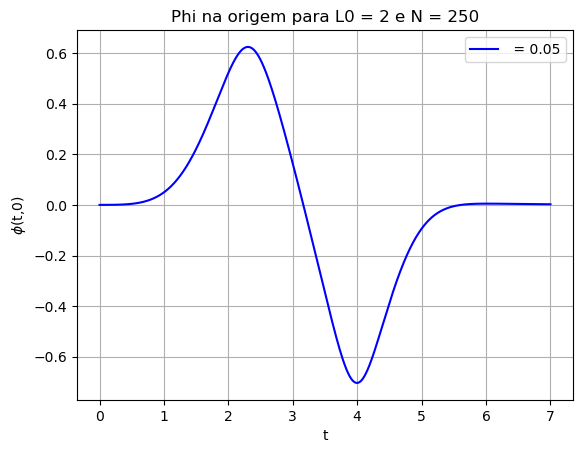

In [612]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.grid()
plt.legend() 

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

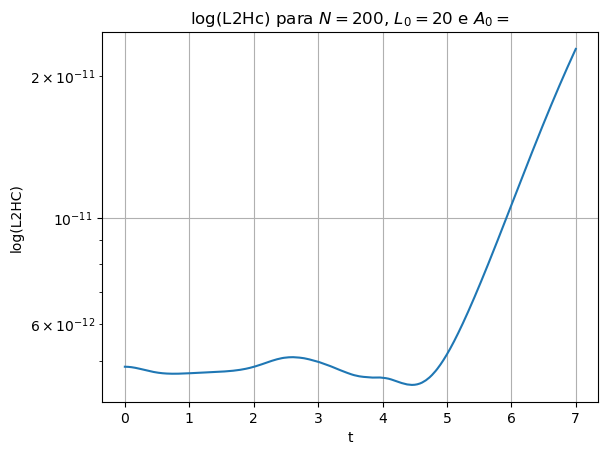

In [613]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

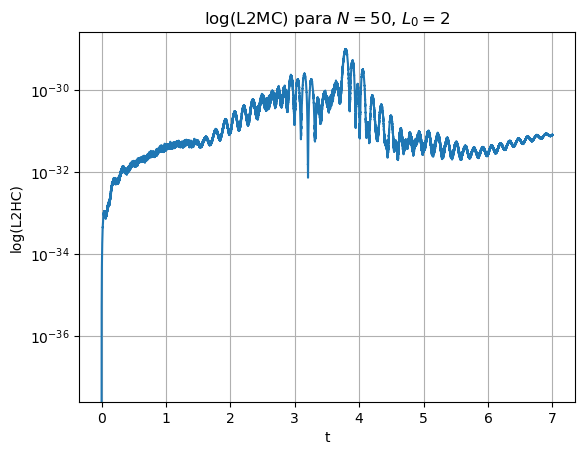

In [614]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [616]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
L2HC_250_L010 = max(L2HC)

#L2HC_300_L02 = max(L2MC)
#L2HC_300_L05 = max(L2MC)
#L2HC_300_L010 = max(L2MC)

In [617]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010,'L2HC_100_L02 =',L2HC_100_L02,'L2HC_100_L05 =', L2HC_100_L05, 'L2HC_100_L010 =',L2HC_100_L010,'L2HC_150_L02 =',L2HC_150_L02,'L2HC_150_L05 =', L2HC_150_L05, 'L2HC_150_L010 =',L2HC_150_L010,'L2HC_200_L02 =',L2HC_200_L02,'L2HC_200_L05 =', L2HC_200_L05, 'L2HC_200_L010 =',L2HC_200_L010, 'L2HC_250_L02 =',L2HC_250_L02,'L2HC_250_L05 =', L2HC_250_L05, 'L2HC_250_L010 =',L2HC_250_L010, sep = '\n')

L2HC_50_L02 =
0.01816391546619686
L2HC_50_L05 =
0.0002546176908516956
L2HC_50_L010 =
0.002733059112102552
L2HC_100_L02 =
0.0027662912019201643
L2HC_100_L05 =
1.3791713620705118e-06
L2HC_100_L010 =
1.4069193497023997e-05
L2HC_150_L02 =
0.0004488248226698636
L2HC_150_L05 =
9.503741887713358e-09
L2HC_150_L010 =
3.058868117659927e-08
L2HC_200_L02 =
1.8196716483457423e-05
L2HC_200_L05 =
4.542907764384823e-09
L2HC_200_L010 =
3.349944877536477e-11
L2HC_250_L02 =
8.89094083876591e-07
L2HC_250_L05 =
2.6213587923518953e-09
L2HC_250_L010 =
2.2760809719282817e-11


In [184]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
#L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

#L2MC_300_L02 = max(L2MC)
#L2MC_300_L05 = max(L2MC)
#L2MC_300_L010 = max(L2MC)

In [185]:
print('L2MC_50_L02 =',L2MC_50_L02,'L2MC_50_L05 =', L2MC_50_L05, 'L2MC_50_L010 =',L2MC_50_L010,'L2MC_100_L02 =',L2MC_100_L02,'L2MC_100_L05 =', L2MC_100_L05, 'L2MC_100_L010 =',L2MC_100_L010,'L2MC_150_L02 =',L2MC_150_L02,'L2MC_150_L05 =', L2MC_150_L05, 'L2MC_150_L010 =',L2MC_150_L010,'L2MC_200_L02 =',L2MC_200_L02,'L2MC_200_L05 =', L2MC_200_L05, 'L2MC_200_L010 =',L2MC_200_L010, 'L2MC_250_L02 =',L2MC_250_L02,'L2MC_250_L05 =', L2MC_250_L05, 'L2MC_250_L010 =',L2MC_250_L010, sep = '\n')

NameError: name 'L2MC_100_L05' is not defined

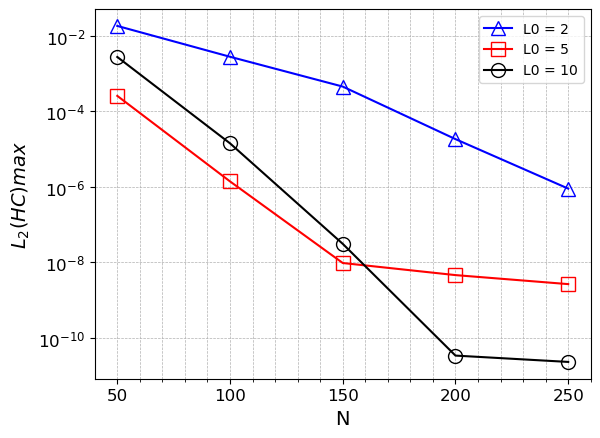

In [633]:


L2HC_50_L02 =0.01816391546619686
L2HC_50_L05 =0.0002546176908516956
L2HC_50_L010 =0.002733059112102552
L2HC_100_L02 =0.0027662912019201643
L2HC_100_L05 =1.3791713620705118e-06
L2HC_100_L010 =1.4069193497023997e-05
L2HC_150_L02 =0.0004488248226698636
L2HC_150_L05 =9.503741887713358e-09
L2HC_150_L010 =3.058868117659927e-08
L2HC_200_L02 =1.8196716483457423e-05
L2HC_200_L05 =4.542907764384823e-09
L2HC_200_L010 =3.349944877536477e-11
L2HC_250_L02 =8.89094083876591e-07
L2HC_250_L05 =2.6213587923518953e-09
L2HC_250_L010 =2.2760809719282817e-11

L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

Ns = [50,100,150,200,250]

plt.plot(Ns, L2HC_L02, '-b^', label = "L0 = 2", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L05, '-rs',label = "L0 = 5", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L010, '-ko',label = "L0 = 10", markersize = 10, markerfacecolor='none')
plt.xticks(Ns)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('N', fontsize = 14)
plt.ylabel('$L_2(HC)max$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.legend()
plt.show()

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

     
#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
if A0 > 0.0819:
    anim.save("animation_colapse.mp4")
else:
    anim.save("animation_dispersion.mp4")
    
        